<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Dwi !

Perkenalkan saya Code Reviewers, disini saya akan mereview tugas Dwi ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Dwi dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Work Plan

1. Project Overview: Provide a brief overview of the project, including the objective, dataset, and evaluation criteria.

2. Data Understanding and Data Preprocessing: Clean and preprocess the data to prepare it for analysis. This may involve handling missing values, dealing with categorical variables, encoding features, scaling numerical values, and performing any other necessary data transformations.

3. Exploratory Data Analysis (EDA): Perform EDA to gain insights into the data. Explore the relationships between variables, identify patterns, visualize distributions, and analyze correlations.

4. Feature Engineering: Based on EDA, engineer new features or transform existing ones that may improve the predictive performance of the model. This could involve creating binary indicators, combining variables, or extracting relevant information.

5. Model Selection: Choose appropriate machine learning algorithms for the churn prediction task. It could be logistic regression, random forests, gradient boosting, or neural networks. The choice should be based on the dataset characteristics and the problem at hand.

6. Model Training: Split the data into training and validation sets. Train the chosen models on the training data and fine-tune their hyperparameters through techniques like cross-validation or grid search.

7. Model Evaluation: Evaluate the performance of the models using the specified evaluation metrics: AUC-ROC and accuracy.

8. Model Interpretation: Interpret the trained model to gain insights into the important features and factors that contribute to customer churn. Understand the implications of these findings and how they can inform future business strategies.

9. Project Report: Summarize the findings, methodology, and results. Include visualizations, explanations, and any recommendations based on the analysis.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [61]:
# Load libraries
import pandas as pd, numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, precision_recall_curve, make_scorer, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings('ignore')


In [62]:
# Load the dataset
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

## Project Overview
The telecommunications operator named Interconnect wants to predict the churn rate of their clients. If it is known that a client plans to terminate their service, they will be offered promotional codes and special package options. The Interconnect marketing team has gathered some personal data of the clients, including information about the selected data packages and their contracts.

Interconnect Services:
1. Phone Network: Phones can be connected to multiple lines simultaneously.
2. Internet: Internet network can be established through telephone lines (DSL, digital subscriber line) or fiber optic cables.

Interconnect also provides other services such as:
- Internet Security: antivirus software (DeviceProtection) and website blocker for malicious sites (OnlineSecurity)
- Specialized technical support (TechSupport)
- Cloud storage for files and data backup (OnlineBackup)
- Streaming TV (StreamingTV) and movie directory (StreamingMovies)

Clients can choose to make monthly payments or sign contracts for 1 or 2 years of subscription. They can use various payment methods and receive electronic bills after transactions.

The available data consists of several files obtained from different sources:

- contract.csv: Contract information, with columns including customerID, BeginDate, EndDate (containing dates or "No" if there is no end date), Type, PaperlessBilling (boolean), PaymentMethod, MonthlyCharges, TotalCharges.

- personal.csv: Personal data of clients, with columns including customerID, gender, SeniorCitizen, Partner (boolean), Dependents (boolean).

- internet.csv: Information about Internet services, with columns including customerID, InternetService, OnlineSecurity (boolean), OnlineBackup (boolean), DeviceProtection (boolean), TechSupport (boolean), StreamingTV (boolean), StreamingMovies (boolean).

- phone.csv: Information about telephone services, with columns including customerID, MultipleLines (boolean).

In each file, a customerID column with a unique code assigned to each client is available. The contract information is valid as of February 1, 2020.


**Project's objective: Predict customer churn for Interconnect telecommunication operator**

**Evaluation Metric: AUC-ROC**

**Additional Metric: Accuracy**

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [63]:
# Display the number of records and columns in each dataset
print("Contract Data - Rows:", contract.shape[0], "Columns:", contract.shape[1])
print("Personal Data - Rows:", personal.shape[0], "Columns:", personal.shape[1])
print("Internet Data - Rows:", internet.shape[0], "Columns:", internet.shape[1])
print("Phone Data - Rows:", phone.shape[0], "Columns:", phone.shape[1])

Contract Data - Rows: 7043 Columns: 8
Personal Data - Rows: 7043 Columns: 5
Internet Data - Rows: 5517 Columns: 8
Phone Data - Rows: 6361 Columns: 2


## Data Understanding & Pre-processing

In [64]:
# Display the column names of each dataset
print("\nContract Data Columns:")
print(contract.columns,'\n')
print("Personal Data Columns:")
print(personal.columns,'\n')
print("Internet Data Columns:")
print(internet.columns,'\n')
print("Phone Data Columns:")
print(phone.columns,'\n')


Contract Data Columns:
Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object') 

Personal Data Columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object') 

Internet Data Columns:
Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object') 

Phone Data Columns:
Index(['customerID', 'MultipleLines'], dtype='object') 



In [65]:
# Explore a few sample records from each dataset
print("\nSample records from Contract Data:")
print(contract.head())

print("\nSample records from Personal Data:")
print(personal.head())

print("\nSample records from Internet Data:")
print(internet.head())

print("\nSample records from Phone Data:")
print(phone.head())


Sample records from Contract Data:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  

Sample records from Personal Data:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG

In [66]:
# Define a function to convert a string to snake case, excluding specific column names
def snake_case(s):
    exclusions = {"customerID": "customer_id", "StreamingTV": "streaming_tv"}
    if s in exclusions:
        return exclusions[s]
    else:
        s = re.sub(r'(?<!^)(?=[A-Z])', '_', s).lower()
        return re.sub(r'\s+', '_', s)

# Convert column names to snake case for each dataset
contract.columns = [snake_case(col) for col in contract.columns]
personal.columns = [snake_case(col) for col in personal.columns]
internet.columns = [snake_case(col) for col in internet.columns]
phone.columns = [snake_case(col) for col in phone.columns]

# Display the column names of each dataset
print("\nContract Data Columns:")
print(contract.columns,'\n')
print("Personal Data Columns:")
print(personal.columns,'\n')
print("Internet Data Columns:")
print(internet.columns,'\n')
print("Phone Data Columns:")
print(phone.columns,'\n')


Contract Data Columns:
Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object') 

Personal Data Columns:
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object') 

Internet Data Columns:
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object') 

Phone Data Columns:
Index(['customer_id', 'multiple_lines'], dtype='object') 



In [67]:
# check on data type
print("General Info of Contract Data:")
print(contract.info())
print("\nGeneral Info of Personal Data:")
print(personal.info())
print("\nGeneral Info of Internet Data:")
print(internet.info())
print("\nGeneral Info of Phone Data:")
print(phone.info())

General Info of Contract Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

General Info of Personal Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senio

In [68]:
# Convert columns to appropriate data types
contract['begin_date'] = pd.to_datetime(contract['begin_date'])
contract['type'] = contract['type'].astype('category')
contract['paperless_billing'] = contract['paperless_billing'].map({'Yes': True, 'No': False})
contract['paperless_billing'] = contract['paperless_billing'].astype('boolean')
contract['payment_method'] = contract['payment_method'].astype('category')
contract['monthly_charges'] = contract['monthly_charges'].astype('float32')
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors='coerce').astype('float32')
# Verify the updated data types
contract.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                     object
type                       category
paperless_billing           boolean
payment_method             category
monthly_charges             float32
total_charges               float32
dtype: object

In [69]:
# Convert columns to appropriate data types
personal['gender'] = personal['gender'].astype('category')
personal['senior_citizen'] = personal['senior_citizen'].astype('boolean')
personal['partner'] = personal['partner'].map({'Yes': True, 'No': False})
personal['partner'] = personal['partner'].astype('boolean')
personal['dependents'] = personal['dependents'].map({'Yes': True, 'No': False})
personal['dependents'] = personal['dependents'].astype('boolean')
# Verify the updated data types
personal.dtypes

customer_id         object
gender            category
senior_citizen     boolean
partner            boolean
dependents         boolean
dtype: object

In [70]:
# Convert columns to appropriate data types
internet['internet_service'] = internet['internet_service'].astype('category')
boolean_columns = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
internet[boolean_columns] = internet[boolean_columns].replace({'Yes': True, 'No': False})
internet[boolean_columns] = internet[boolean_columns].astype('boolean')

# Verify the updated data types
internet.dtypes

customer_id            object
internet_service     category
online_security       boolean
online_backup         boolean
device_protection     boolean
tech_support          boolean
streaming_tv          boolean
streaming_movies      boolean
dtype: object

In [71]:
# Convert the 'multiple_lines' column to boolean
phone['multiple_lines'] = phone['multiple_lines'].map({'Yes': True, 'No': False})
phone['multiple_lines'] = phone['multiple_lines'].astype('boolean')

# Verify the updated data type
phone.dtypes

customer_id        object
multiple_lines    boolean
dtype: object

In [72]:
# check on general statistic
print("General Statistic Description of Contract Data:")
print(contract.describe(include='all'))
print("\nGeneral Statistic Description of Personal Data:")
print(personal.describe())
print("\nGeneral Statistic Description of Internet Data:")
print(internet.describe())
print("\nGeneral Statistic Description of Phone Data:")
print(phone.describe())

General Statistic Description of Contract Data:
       customer_id           begin_date end_date            type  \
count         7043                 7043     7043            7043   
unique        7043                   77        5               3   
top     2223-GDSHL  2014-02-01 00:00:00       No  Month-to-month   
freq             1                  366     5174            3875   
first          NaN  2013-10-01 00:00:00      NaN             NaN   
last           NaN  2020-02-01 00:00:00      NaN             NaN   
mean           NaN                  NaN      NaN             NaN   
std            NaN                  NaN      NaN             NaN   
min            NaN                  NaN      NaN             NaN   
25%            NaN                  NaN      NaN             NaN   
50%            NaN                  NaN      NaN             NaN   
75%            NaN                  NaN      NaN             NaN   
max            NaN                  NaN      NaN             NaN   


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [73]:
# check for duplicates
print(contract['customer_id'].duplicated().sum())
print(personal['customer_id'].duplicated().sum())
print(internet['customer_id'].duplicated().sum())
print(phone['customer_id'].duplicated().sum())

0
0
0
0


In [74]:
contract.end_date.value_counts(normalize=True)

No                     0.734630
2019-11-01 00:00:00    0.068863
2019-12-01 00:00:00    0.066165
2020-01-01 00:00:00    0.065313
2019-10-01 00:00:00    0.065029
Name: end_date, dtype: float64

In [75]:
# Perform outer joins on the 'customer_id' column
data_all = pd.merge(contract, personal, on='customer_id', how='outer')
data_all = pd.merge(data_all, internet, on='customer_id', how='outer')
data_all = pd.merge(data_all, phone, on='customer_id', how='outer')

# Print the merged dataset
print(data_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   category      
 4   paperless_billing  7043 non-null   boolean       
 5   payment_method     7043 non-null   category      
 6   monthly_charges    7043 non-null   float32       
 7   total_charges      7032 non-null   float32       
 8   gender             7043 non-null   category      
 9   senior_citizen     7043 non-null   boolean       
 10  partner            7043 non-null   boolean       
 11  dependents         7043 non-null   boolean       
 12  internet_service   5517 non-null   category      
 13  online_security    5517 non-null   boolean       
 14  online_b

In [76]:
data_all[data_all.isnull().any(axis=1)]

customer_id begin_date end_date            type  paperless_billing  \
0     7590-VHVEG 2020-01-01       No  Month-to-month               True   
3     7795-CFOCW 2016-05-01       No        One year              False   
7     6713-OKOMC 2019-04-01       No  Month-to-month              False   
11    7469-LKBCI 2018-10-01       No        Two year              False   
16    8191-XWSZG 2015-10-01       No        One year              False   
...          ...        ...      ...             ...                ...   
7029  2235-DWLJU 2019-08-01       No  Month-to-month               True   
7030  0871-OPBXW 2019-12-01       No  Month-to-month               True   
7036  7750-EYXWZ 2019-02-01       No        One year              False   
7037  2569-WGERO 2014-02-01       No        Two year               True   
7040  4801-JZAZL 2019-03-01       No  Month-to-month               True   

                 payment_method  monthly_charges  total_charges  gender  \
0              Electronic check        29.850000      29.850000  Female   
3     Bank transfer (automatic)        42.299999    1840.750000    Male   
7                  Mailed check        29.750000     301.899994  Female   
11      Credit card (automatic)        18.950001     326.799988    Male   
16                 Mailed check        20.650000    1022.950012  Female   
...                         ...              ...            ...     ...   
7029           Electronic check        44.400002     263.049988  Female   
7030               Mailed check        20.049999      39.250000  Female   
7036           Electronic check        60.650002     743.299988  Female   
7037  Bank transfer (automatic)        21.150000    1419.400024  Female   
7040           Electronic check        29.600000     346.450012  Female   

      senior_citizen  partner  dependents internet_service  online_security  \
0              False     True       False              DSL            False   
3              False    False       False              DSL             True   
7              False    False       False              DSL             True   
11             False    False       False              NaN             <NA>   
16             False    False       False              NaN             <NA>   
...              ...      ...         ...              ...              ...   
7029            True    False       False              DSL            False   
7030           False    False       False              NaN             <NA>   
7036           False    False       False              DSL            False   
7037           False    False       False              NaN             <NA>   
7040           False     True        True              DSL             True   

      online_backup  device_protection  tech_support  streaming_tv  \
0              True              False         False         False   
3             False               True          True         False   
7             False              False         False         False   
11             <NA>               <NA>          <NA>          <NA>   
16             <NA>               <NA>          <NA>          <NA>   
...             ...                ...           ...           ...   
7029          False              False         False          True   
7030           <NA>               <NA>          <NA>          <NA>   
7036           True               True          True          True   
7037           <NA>               <NA>          <NA>          <NA>   
7040          False              False         False         False   

      streaming_movies  multiple_lines  
0                False            <NA>  
3                False            <NA>  
7                False            <NA>  
11                <NA>           False  
16                <NA>           False  
...                ...             ...  
7029              True            <NA>  
7030              <NA>           False  
7036              True            <NA>  
703

In [77]:
# Add a new column indicating if end_date is "No" or not
data_all['churn'] = data_all['end_date'] != 'No'

# Convert the new column to boolean type
data_all['churn'] = data_all['churn'].astype('boolean')

### Interim Conclusions

- Number of observations in Contract and Personal Data is 7,043, but Internet and Phone data have less than that. Hence data for some customers about their internet and phone are not available

- The data type have been changed to float, category and boolean for ease in using them in the model. The target data 'end_date' is kept as object.

- The data is imbalanced, as data with No in end_date comprises 73% of total data. That means we only have 27% data observations for churn events.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Exploratory Data Analysis

### Feature Analysis

In [78]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   category      
 4   paperless_billing  7043 non-null   boolean       
 5   payment_method     7043 non-null   category      
 6   monthly_charges    7043 non-null   float32       
 7   total_charges      7032 non-null   float32       
 8   gender             7043 non-null   category      
 9   senior_citizen     7043 non-null   boolean       
 10  partner            7043 non-null   boolean       
 11  dependents         7043 non-null   boolean       
 12  internet_service   5517 non-null   category      
 13  online_security    5517 non-null   boolean       
 14  online_b

In [79]:
# check duplicates
data_all.customer_id.duplicated().sum()

0

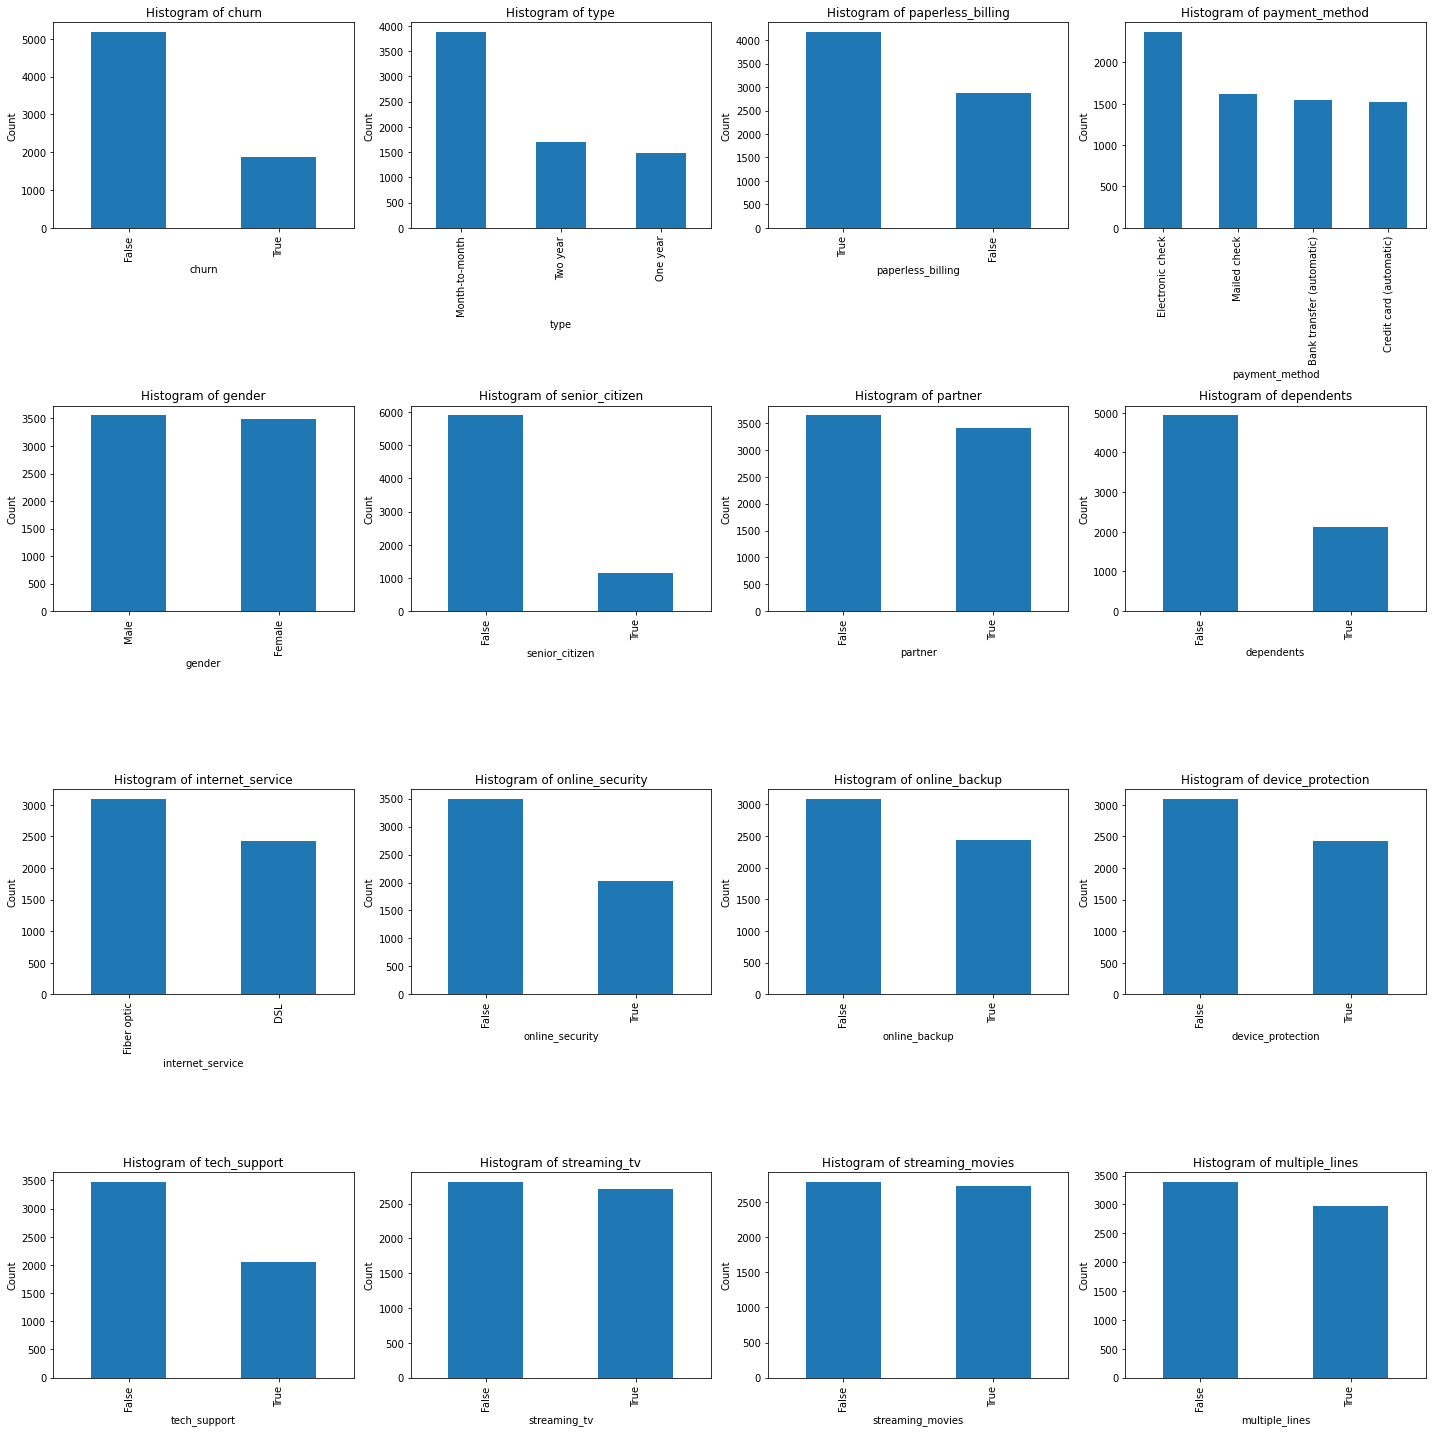

In [80]:
# Categorical and boolean variables
categorical_vars = ['churn', 'type', 'paperless_billing', 'payment_method',
                    'gender', 'senior_citizen', 'partner', 'dependents',
                    'internet_service', 'online_security', 'online_backup',
                    'device_protection', 'tech_support', 'streaming_tv',
                    'streaming_movies', 'multiple_lines']

# Create subplots for histograms
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over variables and create histograms
for i, var in enumerate(categorical_vars):
    ax = axes[i]
    data_all[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

# Hide any extra subplots if there are more variables than subplots
for j in range(len(categorical_vars), 4 * 4):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

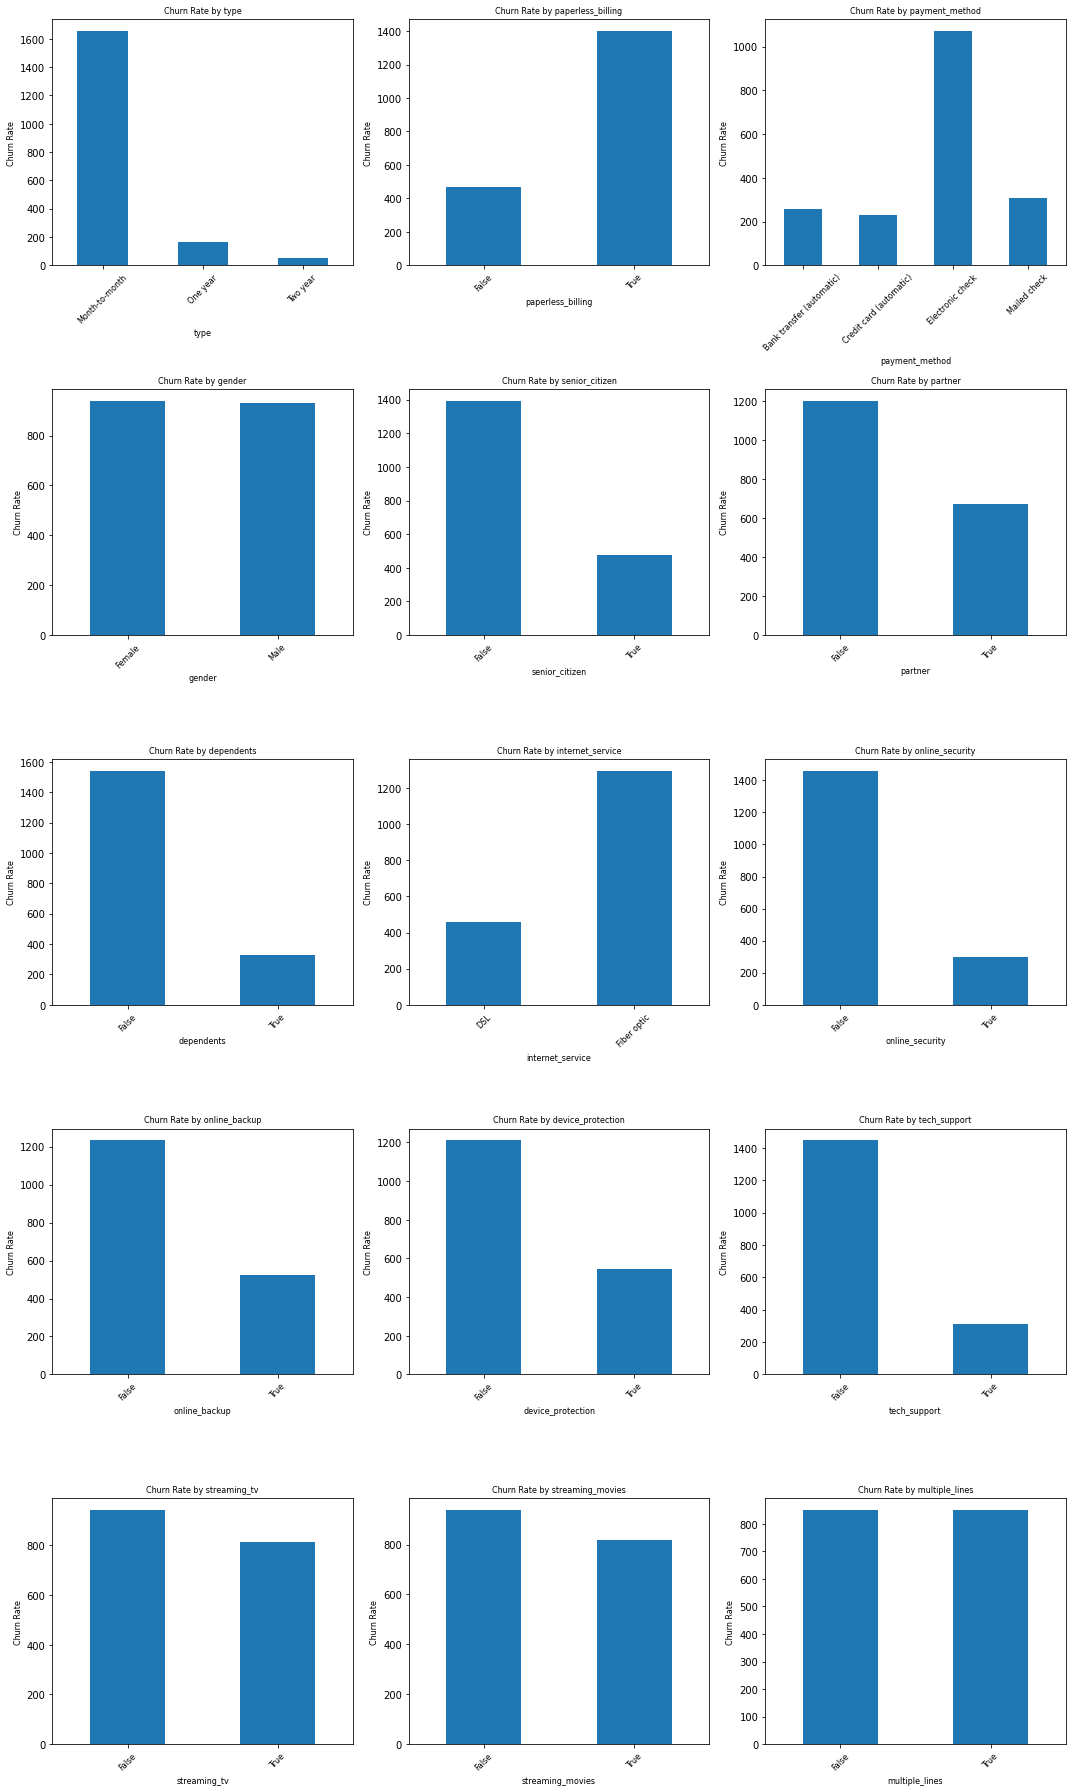

In [81]:
# visualization of churn rate on each class of categorical/boolean features
# Categorical and boolean variables
categorical_vars = ['type', 'paperless_billing', 'payment_method',
                    'gender', 'senior_citizen', 'partner', 'dependents',
                    'internet_service', 'online_security', 'online_backup',
                    'device_protection', 'tech_support', 'streaming_tv',
                    'streaming_movies', 'multiple_lines']

num_plots = len(categorical_vars)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    data_all.groupby(var)['churn'].sum().plot(kind='bar', ax=ax)
    ax.set_xlabel(var, fontsize=8)
    ax.set_ylabel('Churn Rate', fontsize=8)
    ax.set_title(f'Churn Rate by {var}', fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

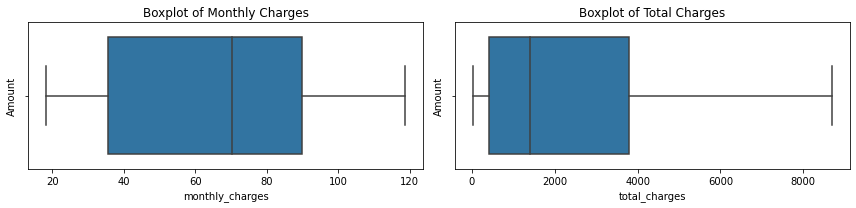

In [82]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Plot boxplot for monthly_charges
sns.boxplot(x=data_all['monthly_charges'], ax=axs[0])
axs[0].set_title('Boxplot of Monthly Charges')
axs[0].set_ylabel('Amount')

# Plot boxplot for total_charges
sns.boxplot(x=data_all['total_charges'], ax=axs[1])
axs[1].set_title('Boxplot of Total Charges')
axs[1].set_ylabel('Amount')

# Adjust spacing between subplots
plt.tight_layout()

# Display the boxplots
plt.show()

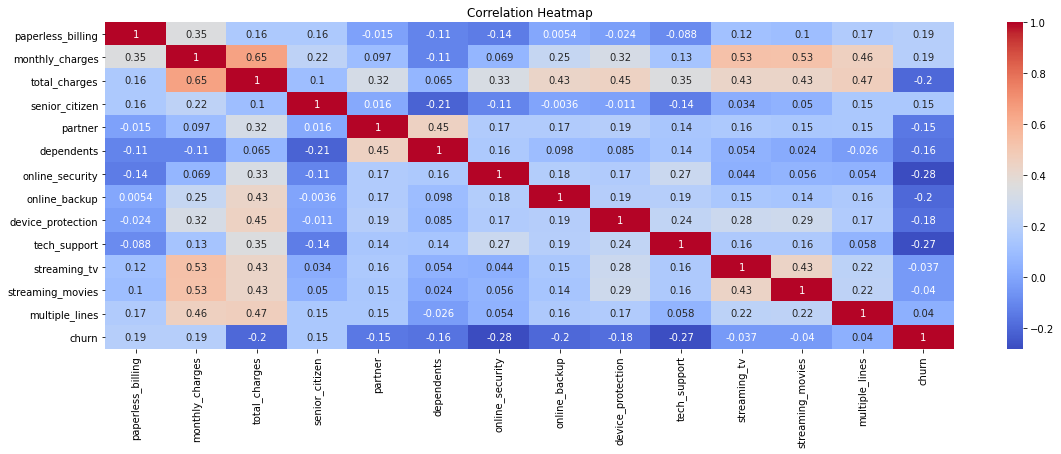

In [83]:
# Select boolean and numerical columns from the data
boolean_numerical_cols = data_all.select_dtypes(include=['boolean', 'float32'])

# Compute the correlation matrix
correlation_matrix = boolean_numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(19, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Missing Data Analysis

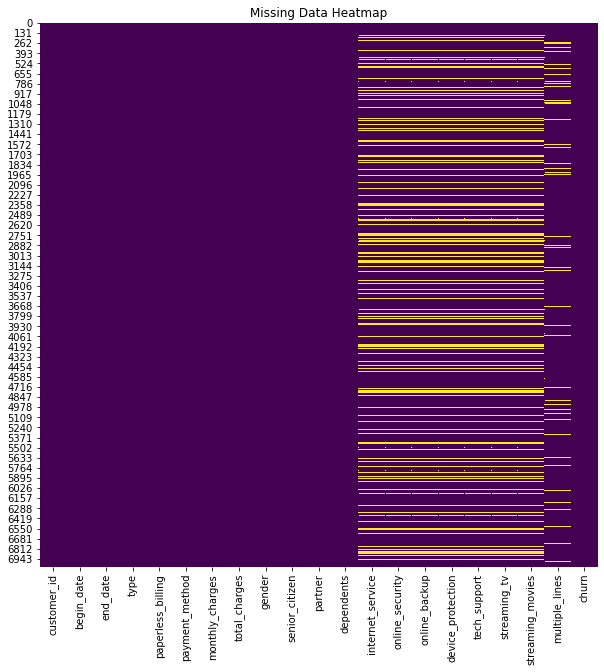

In [84]:
# Create a heatmap of missing data
plt.figure(figsize=(10, 10))
sns.heatmap(data_all.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [85]:
# Set categories for categorical columns
missing_columns = ['online_security', 'online_backup', 'device_protection', 
                   'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

# Fill missing values in missing columns
data_all[missing_columns] = data_all[missing_columns].fillna(False)

categories = ['DSL', 'Fiber optic', 'not_subscribed']
data_all['internet_service'] = data_all['internet_service'].astype('category').cat.set_categories(categories)

# Fill missing values in 'internet_service' column
data_all['internet_service'].fillna('not_subscribed', inplace=True)

In [86]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   category      
 4   paperless_billing  7043 non-null   boolean       
 5   payment_method     7043 non-null   category      
 6   monthly_charges    7043 non-null   float32       
 7   total_charges      7032 non-null   float32       
 8   gender             7043 non-null   category      
 9   senior_citizen     7043 non-null   boolean       
 10  partner            7043 non-null   boolean       
 11  dependents         7043 non-null   boolean       
 12  internet_service   7043 non-null   category      
 13  online_security    7043 non-null   boolean       
 14  online_b

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Feature Engineering

In [87]:
# Change data type for end_date
data_all['end_date'] = pd.to_datetime(data_all['end_date'], errors='coerce')

# Create new feature Tenure that is the length of period since begin_date to end_date, where churn happened
data_all['tenure'] = np.nan
mask = data_all['end_date'].notna()
data_all.loc[mask, 'tenure'] = (data_all.loc[mask, 'end_date'] - data_all.loc[mask, 'begin_date']).dt.days
data_all['tenure'] = data_all['tenure'].astype('Int16')

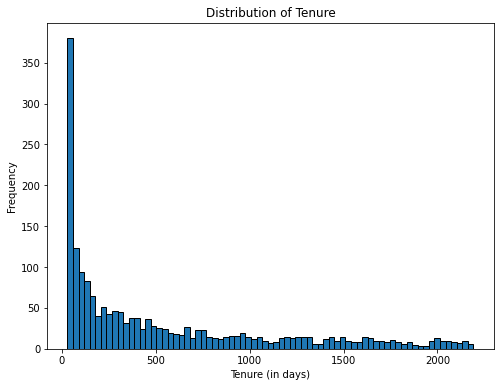

In [88]:
# Filter out NaN values from tenure column
tenure_values = data_all['tenure'].dropna()

bin_width = 30
num_bins = int(np.ceil((tenure_values.max() - tenure_values.min()) / bin_width))

plt.figure(figsize=(8, 6))
plt.hist(tenure_values, bins=num_bins, edgecolor='k')
plt.xlabel('Tenure (in days)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()


In [89]:
# Create a new column indicating churn timing
data_all['churn_timing'] = data_all['tenure'].copy().astype('object')
data_all.loc[data_all['tenure'].isnull(), 'churn_timing'] = np.nan
data_all.loc[data_all['tenure'] <= 30, 'churn_timing'] = 'Within 30 Days'
data_all.loc[data_all['tenure'] > 30, 'churn_timing'] = 'After 30 Days'
data_all['churn_timing'] = data_all['churn_timing'].astype('category')

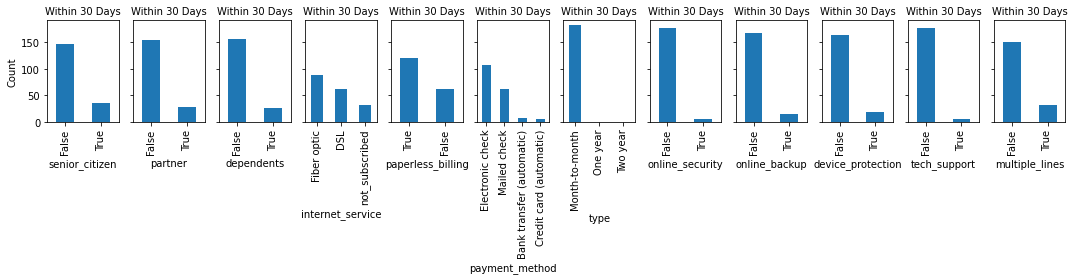

In [90]:
# Plot bar plots for categorical and boolean columns based on churn timing within 30 days
columns_to_visualize = ['senior_citizen', 'partner', 'dependents',
                        'internet_service',
                         'paperless_billing', 'payment_method',
                        'type', 'online_security', 'online_backup',
                        'device_protection', 'tech_support', 'multiple_lines']


fig, axes = plt.subplots(1, len(columns_to_visualize), figsize=(15, 4), sharey=True)

for i, column in enumerate(columns_to_visualize):
    ax = axes[i]
    data_within_30 = data_all[data_all['churn_timing'] == 'Within 30 Days']
    data_within_30[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title('Within 30 Days', fontsize=10)


plt.tight_layout()
plt.show()



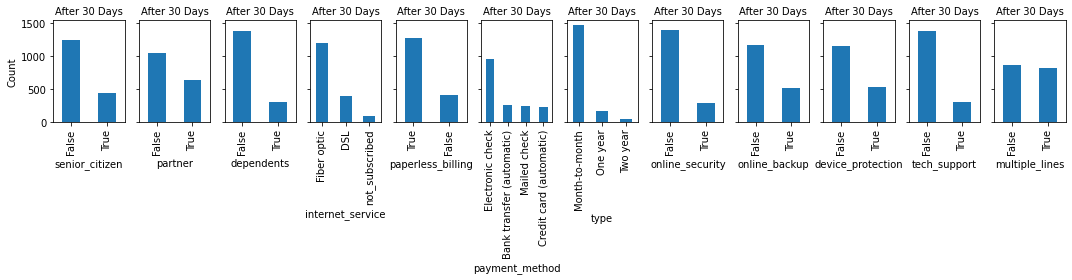

In [91]:
# Plot bar plots for categorical and boolean columns based on churn timing after 30 days
fig, axes = plt.subplots(1, len(columns_to_visualize), figsize=(15, 4), sharey=True)

for i, column in enumerate(columns_to_visualize):
    ax = axes[i]
    data_after_30 = data_all[data_all['churn_timing'] == 'After 30 Days']
    data_after_30[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title('After 30 Days', fontsize=10)


plt.tight_layout()
plt.show()



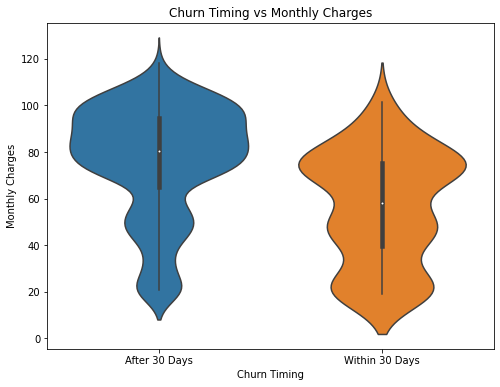

In [92]:
# Churns distribution per monthly charges in two groups: within 30 days and after 30 days
plt.figure(figsize=(8, 6))
sns.violinplot(x=data_all['churn_timing'], y=data_all['monthly_charges'])
plt.xlabel('Churn Timing')
plt.ylabel('Monthly Charges')
plt.title('Churn Timing vs Monthly Charges')
plt.show()

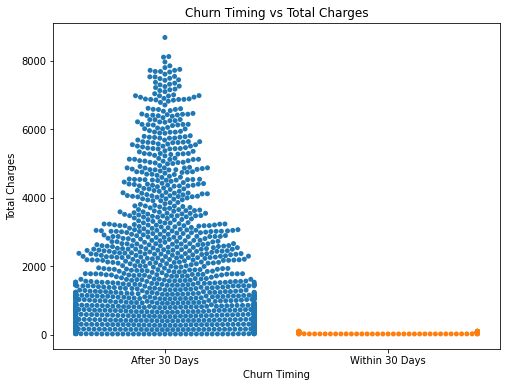

In [93]:
# Churns distribution per total charges in two groups: within 30 days and after 30 days
plt.figure(figsize=(8, 6))
sns.swarmplot(x=data_all['churn_timing'], y=data_all['total_charges'])
plt.xlabel('Churn Timing')
plt.ylabel('Total Charges')
plt.title('Churn Timing vs Total Charges')
plt.show()

In [94]:
# creating new feature that is the ratio of total charges to monthly charges
data_all['charge_ratio'] = data_all['total_charges'] / data_all['monthly_charges']

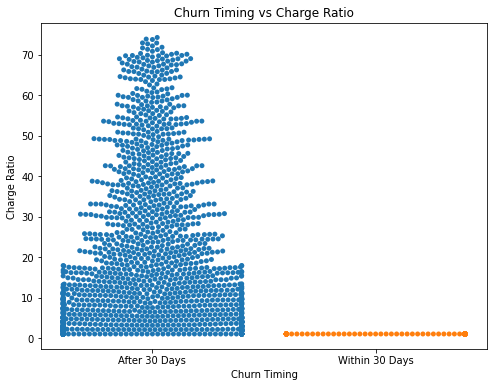

In [95]:
# Churns distribution per charges ratio in two groups: within 30 days and after 30 days
plt.figure(figsize=(8, 6))
sns.swarmplot(x=data_all['churn_timing'], y=data_all['charge_ratio'])
plt.xlabel('Churn Timing')
plt.ylabel('Charge Ratio')
plt.title('Churn Timing vs Charge Ratio')
plt.show()


In [96]:
# creating new features to categorize based on the monthly_charges and total_charges
# Define the bins and labels for binning
bins = [0, 71, np.inf]
bins_2 = [0, 1800, np.inf]
labels = [False, True]
# Perform binning
data_all['upper_monthly_charges'] = pd.cut(data_all['monthly_charges'] , bins=bins, labels=labels)
data_all['upper_total_charges'] = pd.cut(data_all['total_charges'] , bins=bins_2, labels=labels)

In [97]:
# create new feature of number of additional internet service customers benefit from
data_all['additional_service'] = data_all[['online_security', 'online_backup', 'device_protection',
                                           'tech_support', 'streaming_movies', 'streaming_tv']].sum(axis=1).astype('int8')


In [98]:
# Create new feature of average of monthly charges per type category
data_all['avg_charges'] = data_all.groupby('type')['monthly_charges'].transform('mean').astype('float32')


In [99]:
# create new feature of family status where customers have either partners or dependents
data_all['family_status'] = 'single'  # Initialize all values as 'Single'

# Set family status based on 'Partner' and 'Dependents'
data_all.loc[(data_all['partner'] == True) & (data_all['dependents'] == True), 'family_status'] = 'partner_with_dependents'
data_all.loc[(data_all['partner'] == True) & (data_all['dependents'] == False), 'family_status'] = 'partner_without_dependents'
data_all.loc[(data_all['partner'] == False) & (data_all['dependents'] == True ), 'family_status'] = 'single_with_dependents'
data_all['family_status'] = data_all['family_status'].astype('category')

In [100]:
# create feature that is an interaction between demographic and additional service 
add_services = ['online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies']
demographics = ['senior_citizen', 'partner', 'dependents']
for add_service in add_services:
    for demographic in demographics:
        feature_name = add_service + '_' + demographic
        data_all[feature_name] = (data_all[add_service] == True) & (data_all[demographic] == True)
        data_all[feature_name] = data_all[feature_name].astype('int8')

In [101]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       7043 non-null   object        
 1   begin_date                        7043 non-null   datetime64[ns]
 2   end_date                          1869 non-null   datetime64[ns]
 3   type                              7043 non-null   category      
 4   paperless_billing                 7043 non-null   boolean       
 5   payment_method                    7043 non-null   category      
 6   monthly_charges                   7043 non-null   float32       
 7   total_charges                     7032 non-null   float32       
 8   gender                            7043 non-null   category      
 9   senior_citizen                    7043 non-null   boolean       
 10  partner                           7043 non-null 

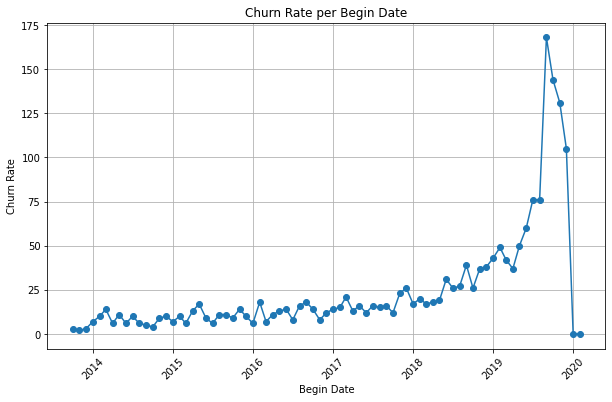

In [102]:
# Group the data by begin_date and calculate the churn rate
churn_rate = data_all.groupby('begin_date')['churn'].sum()

# Sort the churn_rate series based on begin_date index
churn_rate = churn_rate.sort_index()

# Convert churn_rate to a NumPy array
churn_rate_values = churn_rate.to_numpy()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(churn_rate.index, churn_rate_values, marker='o')
plt.title('Churn Rate per Begin Date')
plt.xlabel('Begin Date')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


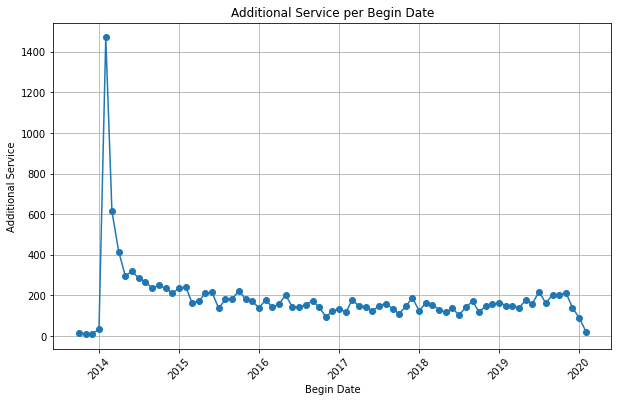

In [103]:
# Group the data by begin_date and calculate the churn rate
additional_service = data_all.groupby('begin_date')['additional_service'].sum()

# Sort the churn_rate series based on begin_date index
additional_service = additional_service.sort_index()

# Convert churn_rate to a NumPy array
additional_service_values = additional_service.to_numpy()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(additional_service.index, additional_service_values, marker='o')
plt.title('Additional Service per Begin Date')
plt.xlabel('Begin Date')
plt.ylabel('Additional Service')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


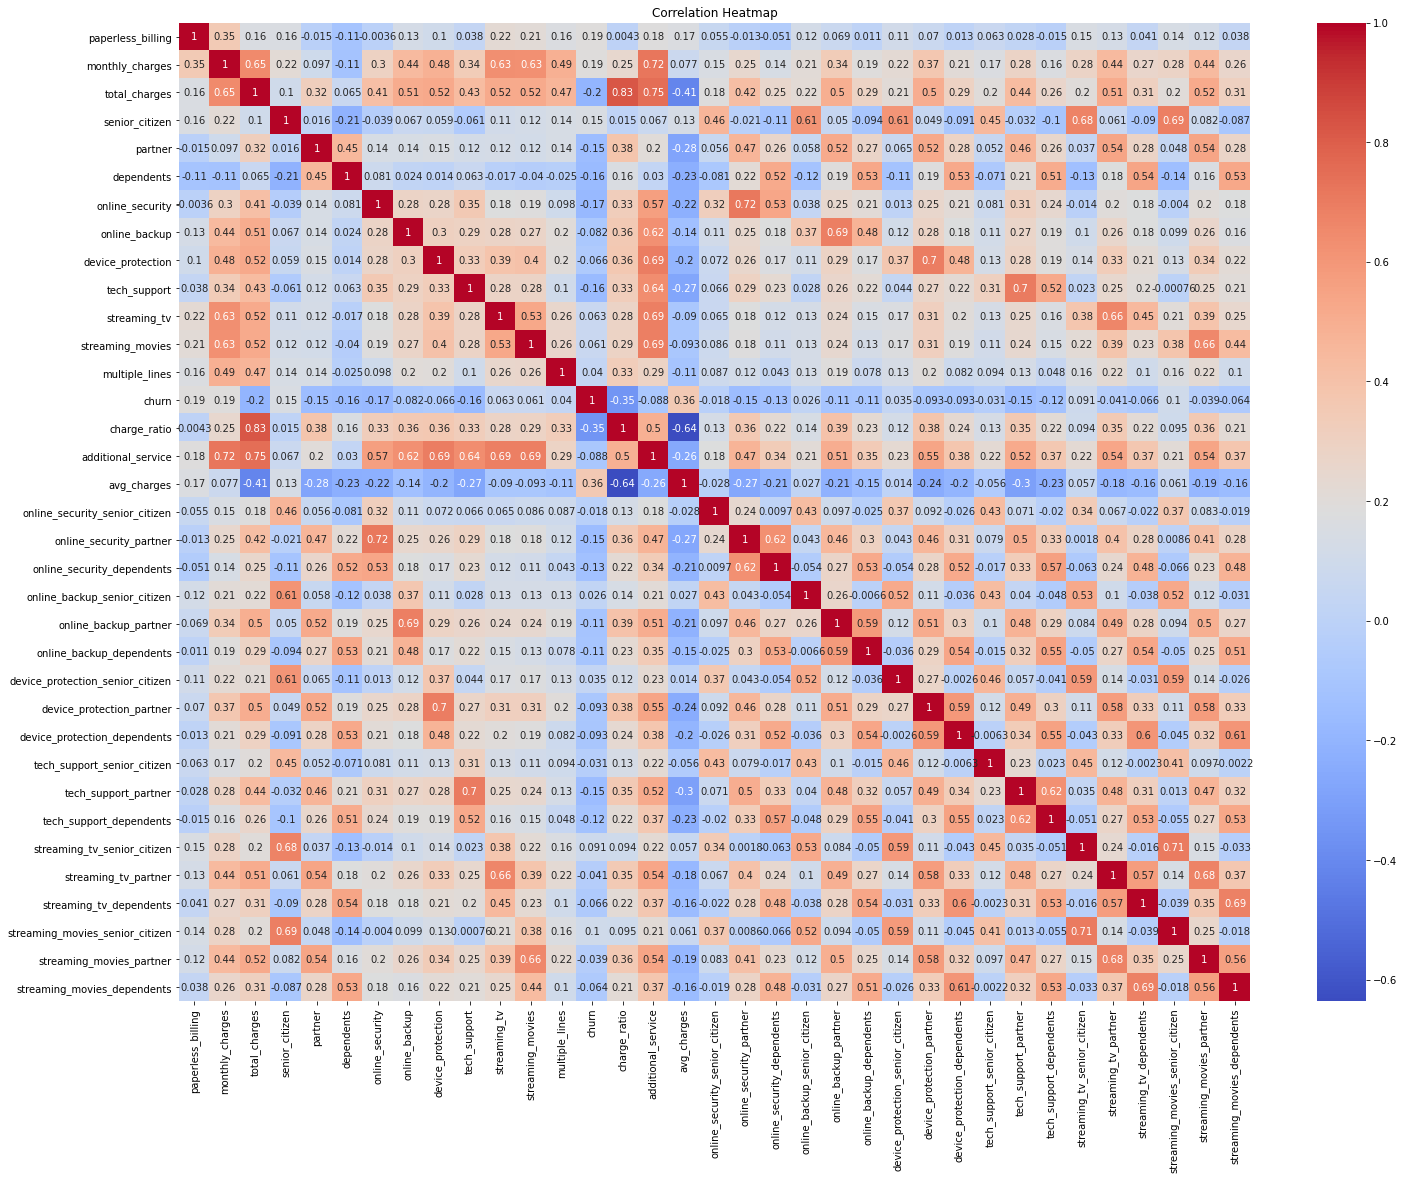

In [104]:
# Select boolean and numerical columns from the data
boolean_numerical_cols = data_all.select_dtypes(include=['boolean', 'float32', 'int8'])

# Compute the correlation matrix
correlation_matrix = boolean_numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [105]:
# fill in missing values in end date with last valid date 2020 Feb 10
data_all['end_date'] = data_all['end_date'].fillna(pd.to_datetime('2020-02-01'))

# Create new feature 'duration' that is the length of period since begin_date to end_date, where churn happened,
# or the length of period use, where churn does not happen
data_all['duration'] = (data_all['end_date'] - data_all['begin_date']).dt.days
data_all['duration'] = data_all['duration'].astype('int16')

In [106]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       7043 non-null   object        
 1   begin_date                        7043 non-null   datetime64[ns]
 2   end_date                          7043 non-null   datetime64[ns]
 3   type                              7043 non-null   category      
 4   paperless_billing                 7043 non-null   boolean       
 5   payment_method                    7043 non-null   category      
 6   monthly_charges                   7043 non-null   float32       
 7   total_charges                     7032 non-null   float32       
 8   gender                            7043 non-null   category      
 9   senior_citizen                    7043 non-null   boolean       
 10  partner                           7043 non-null 

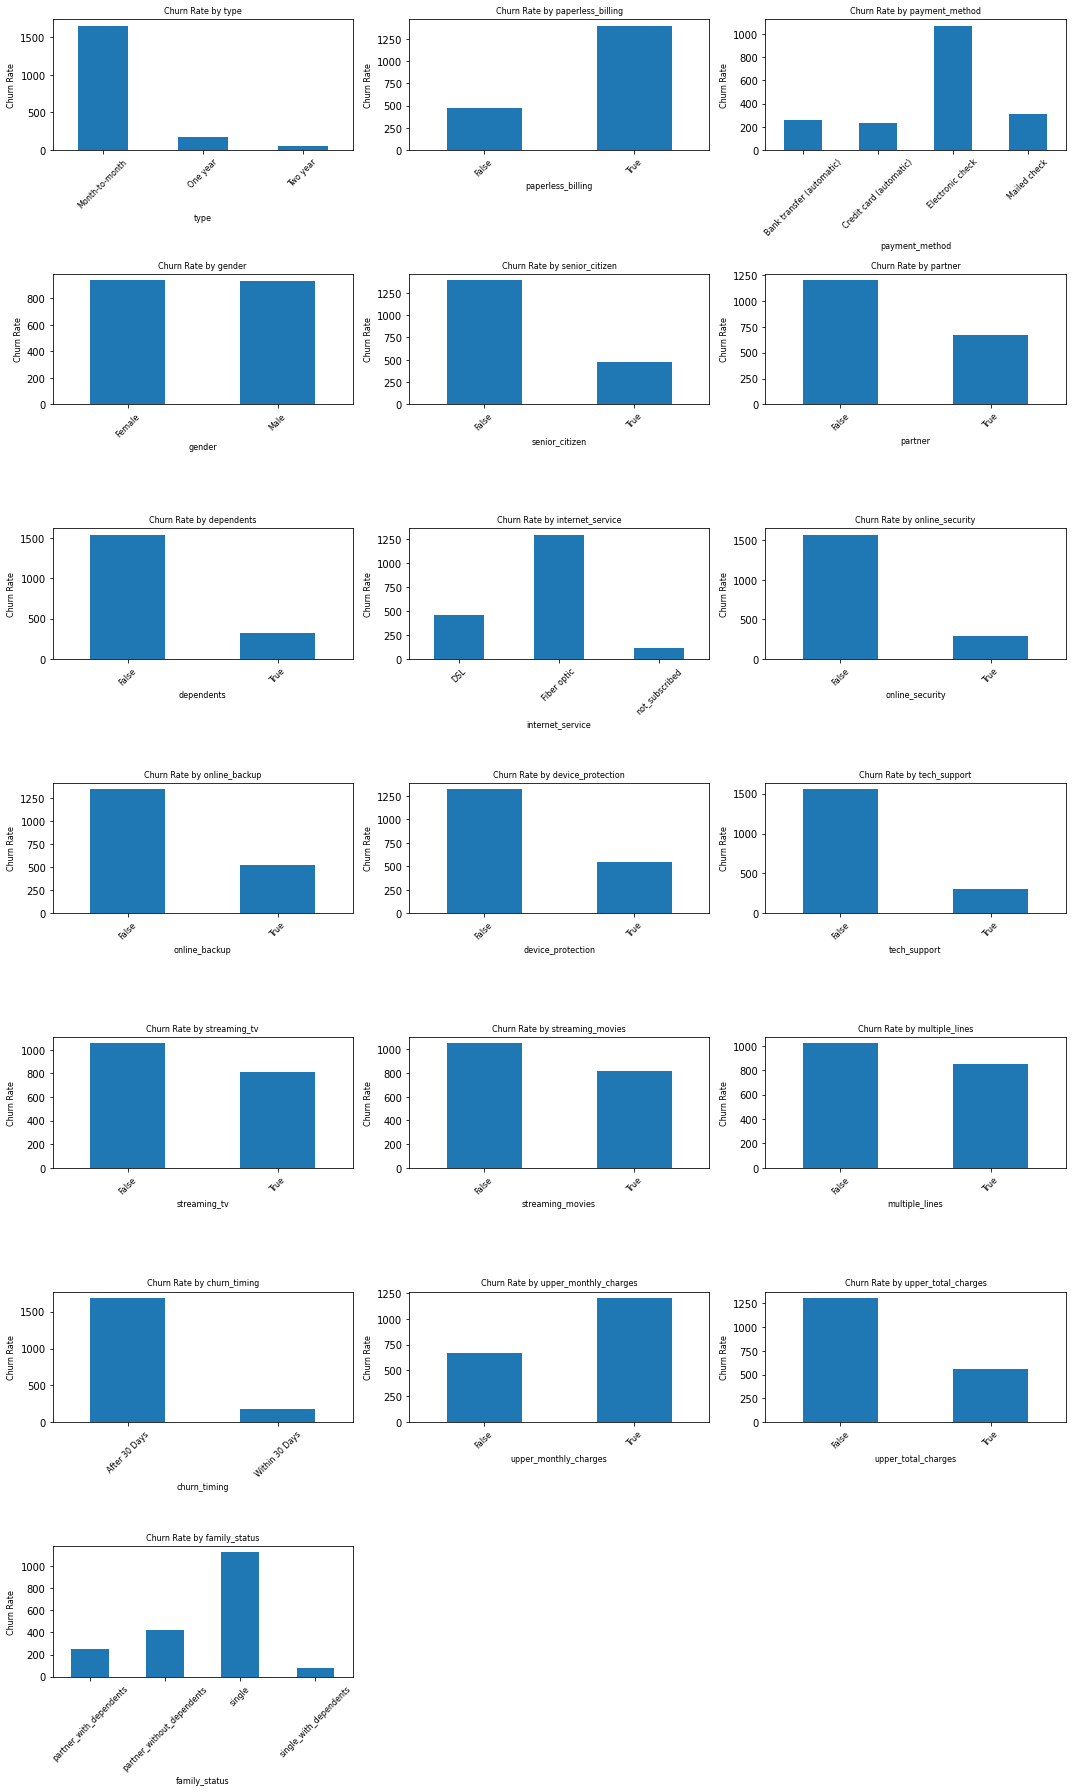

In [257]:
# visualization of churn rate on each class of categorical/boolean features
# Categorical and boolean variables
categorical_vars = ['type', 'paperless_billing', 'payment_method',
                    'gender', 'senior_citizen', 'partner', 'dependents',
                    'internet_service', 'online_security', 'online_backup',
                    'device_protection', 'tech_support', 'streaming_tv',
                    'streaming_movies', 'multiple_lines', 'churn_timing', 'upper_monthly_charges',
                    'upper_total_charges', 'family_status']

num_plots = len(categorical_vars)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    data_all.groupby(var)['churn'].sum().plot(kind='bar', ax=ax)
    ax.set_xlabel(var, fontsize=8)
    ax.set_ylabel('Churn Rate', fontsize=8)
    ax.set_title(f'Churn Rate by {var}', fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

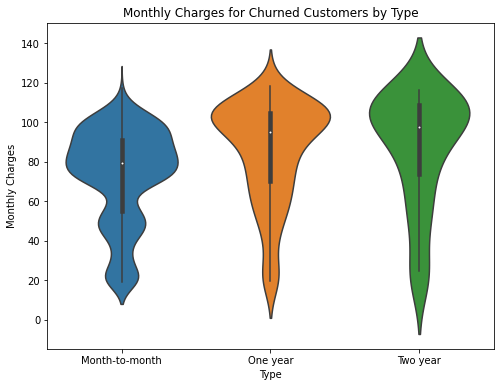

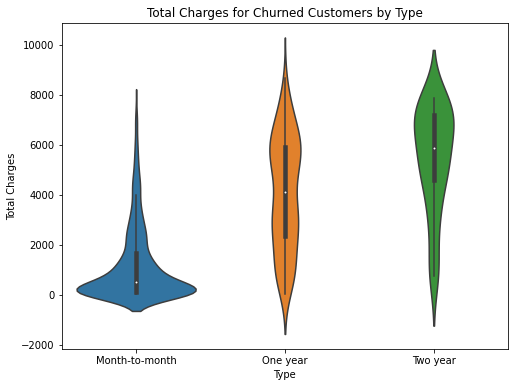

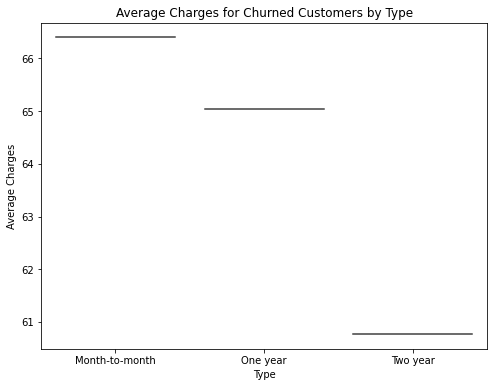

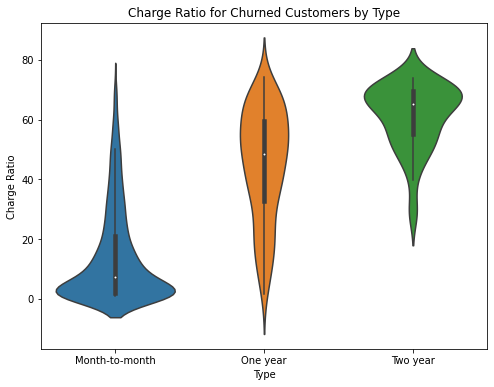

In [262]:
# Filter the data for churned customers
churned_data = data_all[data_all['churn'] == True]

# Swarm plot for Monthly Charges by Type and Churn (Churned customers only)
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='monthly_charges', data=churned_data)
plt.xlabel('Type')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges for Churned Customers by Type')
plt.show()

# Swarm plot for Total Charges by Type and Churn (Churned customers only)
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='total_charges', data=churned_data)
plt.xlabel('Type')
plt.ylabel('Total Charges')
plt.title('Total Charges for Churned Customers by Type')
plt.show()

# Swarm plot for Average Charges by Type and Churn (Churned customers only)
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='avg_charges', data=churned_data)
plt.xlabel('Type')
plt.ylabel('Average Charges')
plt.title('Average Charges for Churned Customers by Type')
plt.show()

# Swarm plot for Charge Ratio by Type and Churn (Churned customers only)
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='charge_ratio', data=churned_data)
plt.xlabel('Type')
plt.ylabel('Charge Ratio')
plt.title('Charge Ratio for Churned Customers by Type')
plt.show()

### Interim Conclusions

Based on the data visualization, these are facts that seem to increase the likelihood of churn:

- being not a senior citizen,

- having no partner,

- having no dependent,

- being billed paperlessly,

- choosing fiber optics internet channel,

- paying using electronic check,

- paying monthly instead of yearly,

- not subscribing for online security, device protection, online backup, nor special tech support.

From missing data analysis, we know that some customers' data is missing in the internet dataset, while some in phone dataset. However not in both datasets simultaneously.
It suggests that the missing data mechanism may not be completely random. Hence let us conclude that the missing values is caused by customers not subscribing to the related services.

From the boxplot of monthly charges and total charges, there seem to be no outliers.

We also analysed for the timing of churn. From the histogram it seems that churn in the first 30 days after subscription starting is the most event of churn compared to other timing groups.

Furthermore, as we tried to understand how clients who churn within 30 days and those who do after 30 days, it seems that these facts are more noticeable in the first group:

Based on the data visualization on within-30-days group, these are facts that seem to increase the likelihood of churn:

- being not a senior citizen,

- having no partner,

- having no dependent,

- paying monthly instead of yearly,

- not subscribing for online security, device protection, online backup, nor special tech support.

Then when it comes to amount of monthly charge, the within-30-days group mostly are charged for around 75, which is above the average monthly charge for overall customers.
A feature is added to label the data with monthly charges above 70.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Statistical Analysis

In this part several statistical test will be done to help validate our inference about the relationship between churn and other variables.

Mann-Whitney U test will be done to assess significant difference  monthly charges between the churn group and the non-churn.

Chi-squared test of independence assess the independence between categorical variables, e.g., churn and senior citizen, churn and partner, churn and dependents, and so on.

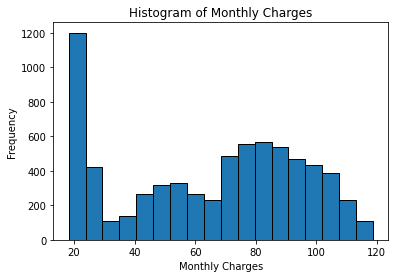

In [107]:
# Check distribution of monthly charges
# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(data_all['monthly_charges'], bins='auto', edgecolor='k')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')
plt.show()

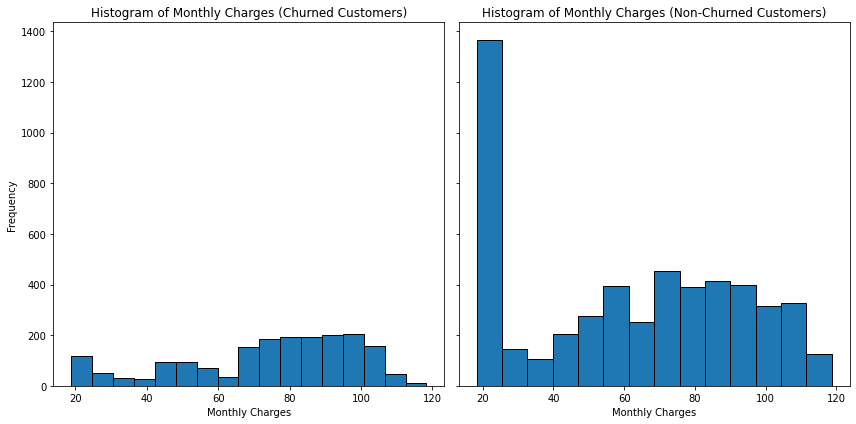

In [108]:
# Compare distribution of monthly charges for churn and non-churn
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot histogram for churned customers
ax1.hist(data_all[data_all['churn']]['monthly_charges'], bins='auto', edgecolor='k')
ax1.set_xlabel('Monthly Charges')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Monthly Charges (Churned Customers)')

# Plot histogram for non-churned customers
ax2.hist(data_all[~data_all['churn']]['monthly_charges'], bins='auto', edgecolor='k')
ax2.set_xlabel('Monthly Charges')
ax2.set_title('Histogram of Monthly Charges (Non-Churned Customers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [109]:
# test for distribution of monthly charges in churn group and non churn
churned = data_all[data_all['churn'] == 1]['monthly_charges']
not_churned = data_all[data_all['churn'] == 0]['monthly_charges']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned, not_churned)

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)


Mann-Whitney U statistic: 6003125.5
p-value: 3.311627651988585e-54


In [110]:
# Perform chi-square test of independence
factors = ['senior_citizen', 'type', 'dependents', 'partner', 'online_security', 'online_backup', 'device_protection', 'tech_support']

for factor in factors:
    # Create a contingency table of the factor and churn
    contingency_table = pd.crosstab(data_all[factor], data_all['churn'])

    # Perform chi-square test of independence
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    print(f"Factor: {factor}")
    print("Chi-square statistic:", chi2)
    print("p-value:", p_value)
    print()


Factor: senior_citizen
Chi-square statistic: 159.42630036838742
p-value: 1.510066805092378e-36

Factor: type
Chi-square statistic: 1184.5965720837926
p-value: 5.863038300673391e-258

Factor: dependents
Chi-square statistic: 189.12924940423474
p-value: 4.9249216612154196e-43

Factor: partner
Chi-square statistic: 158.7333820309922
p-value: 2.1399113440759935e-36

Factor: online_security
Chi-square statistic: 205.63310416062058
p-value: 1.2320984831180024e-46

Factor: online_backup
Chi-square statistic: 47.260854003612764
p-value: 6.214092807254819e-12

Factor: device_protection
Chi-square statistic: 30.513394539261306
p-value: 3.315693222362861e-08

Factor: tech_support
Chi-square statistic: 190.16684201526067
p-value: 2.9235674453140758e-43



### Interim Conclusions

We did Mann-Whitney test to see for statistical difference of monthly charges between the churn group and non-churn.
It resulted in p-value that is below the common significance level of 0.05. This suggests that there is a significant difference in amount of monthly charges between the two groups.

We also did chi-square test for the categorical variables:
'senior_citizen', 'type', 'dependents', 'partner', 'online_security', 'online_backup', 'device_protection', 'tech_support',

The results suggested that there is a significant difference in number of those variables between the churn group and the non-churn.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Pertanyaan:

Dari hasil analisa missing values tampak random events buat saya, apakah bisa disimpulkan demikian? Kalau tidak, apa yang bisa dilakukan untuk menganalisanya lagi? Lalu apakah missing values aman untuk kita drop?

Apakah EDA dan statistical test sudah memadai atau ada yang lain yang bisa dilakukan lagi?

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- Jawaban Pertanyaan:
    1. yap missing values seems random ya, untuk saat ini jangan di drop dulu missing valuesnya.
        - kalau data kategorikal tidak masalah diisi dengan modus
        - kalau data numeric continous bisa diisi dengan median
    2. EDA sudah cukup

</div>

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Dwi! Sebagian besar kamu telah menyelesaikan project ini dengan baik dan sudah sesuai ya! Silahkan mengerjakan final project 2 di bawah ini ya di notebook yang sama!
    
Keep going Dwi, you are doing very well!
    

</div>

<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Dwi !

Perkenalkan saya Code Reviewers, disini saya akan mereview tugas Dwi ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Dwi dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

## Model

### Train-test Split

In [111]:
data_full = data_all.copy()

In [112]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       7043 non-null   object        
 1   begin_date                        7043 non-null   datetime64[ns]
 2   end_date                          7043 non-null   datetime64[ns]
 3   type                              7043 non-null   category      
 4   paperless_billing                 7043 non-null   boolean       
 5   payment_method                    7043 non-null   category      
 6   monthly_charges                   7043 non-null   float32       
 7   total_charges                     7032 non-null   float32       
 8   gender                            7043 non-null   category      
 9   senior_citizen                    7043 non-null   boolean       
 10  partner                           7043 non-null 

In [113]:
# drop row with missing values in total charges, the number is insignificant
data_full.dropna(subset=['total_charges'], inplace=True)

In [114]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   customer_id                       7032 non-null   object        
 1   begin_date                        7032 non-null   datetime64[ns]
 2   end_date                          7032 non-null   datetime64[ns]
 3   type                              7032 non-null   category      
 4   paperless_billing                 7032 non-null   boolean       
 5   payment_method                    7032 non-null   category      
 6   monthly_charges                   7032 non-null   float32       
 7   total_charges                     7032 non-null   float32       
 8   gender                            7032 non-null   category      
 9   senior_citizen                    7032 non-null   boolean       
 10  partner                           7032 non-null 

In [115]:
# Separate the features and target
features = data_full.drop(['customer_id', 'begin_date', 'end_date', 
                          'churn', 'tenure', 'churn_timing'], axis=1)
target = data_full['churn'].astype('int8')

In [116]:
features.isna().sum()

type                                0
paperless_billing                   0
payment_method                      0
monthly_charges                     0
total_charges                       0
gender                              0
senior_citizen                      0
partner                             0
dependents                          0
internet_service                    0
online_security                     0
online_backup                       0
device_protection                   0
tech_support                        0
streaming_tv                        0
streaming_movies                    0
multiple_lines                      0
charge_ratio                        0
upper_monthly_charges               0
upper_total_charges                 0
additional_service                  0
avg_charges                         0
family_status                       0
online_security_senior_citizen      0
online_security_partner             0
online_security_dependents          0
online_backu

In [117]:
target.isna().sum()

0

In [118]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=12345)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 42)
(5625,)
(1407, 42)
(1407,)


In [119]:
X_train.isna().sum()

type                                0
paperless_billing                   0
payment_method                      0
monthly_charges                     0
total_charges                       0
gender                              0
senior_citizen                      0
partner                             0
dependents                          0
internet_service                    0
online_security                     0
online_backup                       0
device_protection                   0
tech_support                        0
streaming_tv                        0
streaming_movies                    0
multiple_lines                      0
charge_ratio                        0
upper_monthly_charges               0
upper_total_charges                 0
additional_service                  0
avg_charges                         0
family_status                       0
online_security_senior_citizen      0
online_security_partner             0
online_security_dependents          0
online_backu

In [120]:
X_test.isna().sum()

type                                0
paperless_billing                   0
payment_method                      0
monthly_charges                     0
total_charges                       0
gender                              0
senior_citizen                      0
partner                             0
dependents                          0
internet_service                    0
online_security                     0
online_backup                       0
device_protection                   0
tech_support                        0
streaming_tv                        0
streaming_movies                    0
multiple_lines                      0
charge_ratio                        0
upper_monthly_charges               0
upper_total_charges                 0
additional_service                  0
avg_charges                         0
family_status                       0
online_security_senior_citizen      0
online_security_partner             0
online_security_dependents          0
online_backu

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Standard Scaler

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5327 to 6160
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   type                              5625 non-null   category
 1   paperless_billing                 5625 non-null   boolean 
 2   payment_method                    5625 non-null   category
 3   monthly_charges                   5625 non-null   float32 
 4   total_charges                     5625 non-null   float32 
 5   gender                            5625 non-null   category
 6   senior_citizen                    5625 non-null   boolean 
 7   partner                           5625 non-null   boolean 
 8   dependents                        5625 non-null   boolean 
 9   internet_service                  5625 non-null   category
 10  online_security                   5625 non-null   boolean 
 11  online_backup                     5625 non-null   boo

In [122]:
# standard scale 'monthly_charges' and 'total_charges'
scaler = StandardScaler()
X_train[['monthly_charges', 'total_charges', 'avg_charges', 'charge_ratio']] = scaler.fit_transform(X_train[['monthly_charges', 'total_charges', 'avg_charges', 'charge_ratio']])
X_test[['monthly_charges', 'total_charges', 'avg_charges', 'charge_ratio']] = scaler.transform(X_test[['monthly_charges', 'total_charges', 'avg_charges', 'charge_ratio']])


In [123]:
X_train.head(3)

type  paperless_billing    payment_method  monthly_charges  \
5327        Two year              False      Mailed check        -1.497891   
1194  Month-to-month              False  Electronic check        -0.476983   
4589        Two year              False      Mailed check        -1.482951   

      total_charges  gender  senior_citizen  partner  dependents  \
5327      -0.743536  Female           False     True        True   
1194      -0.669876  Female           False    False       False   
4589      -0.911265  Female           False     True        True   

     internet_service  ...  tech_support_senior_citizen  tech_support_partner  \
5327   not_subscribed  ...                            0                     0   
1194              DSL  ...                            0                     0   
4589   not_subscribed  ...                            0                     0   

      tech_support_dependents  streaming_tv_senior_citizen  \
5327                        0                            0   
1194                        0                            0   
4589                        0                            0   

      streaming_tv_partner  streaming_tv_dependents  \
5327                     0                        0   
1194                     0                        0   
4589                     0                        0   

      streaming_movies_senior_citizen  streaming_movies_partner  \
5327                                0                         0   
1194                                0                         0   
4589                                0                         0   

     streaming_movies_dependents duration  
5327                           0      914  
1194                           0      427  
4589                           0      306  

[3 rows x 42 columns]

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Encoding

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5327 to 6160
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   type                              5625 non-null   category
 1   paperless_billing                 5625 non-null   boolean 
 2   payment_method                    5625 non-null   category
 3   monthly_charges                   5625 non-null   float64 
 4   total_charges                     5625 non-null   float64 
 5   gender                            5625 non-null   category
 6   senior_citizen                    5625 non-null   boolean 
 7   partner                           5625 non-null   boolean 
 8   dependents                        5625 non-null   boolean 
 9   internet_service                  5625 non-null   category
 10  online_security                   5625 non-null   boolean 
 11  online_backup                     5625 non-null   boo

In [125]:
# Identify the categorical columns (excluding 'monthly_charges' and 'total_charges')
categorical_columns = ['payment_method', 'gender', 'internet_service', 'upper_monthly_charges',
                       'upper_total_charges', 'family_status']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns in the training set
X_train_encoded = encoder.fit_transform(X_train[categorical_columns]).astype('int8')

# Transform the categorical columns in the testing set using the fitted encoder
X_test_encoded = encoder.transform(X_test[categorical_columns]).astype('int8')

# Get the encoded feature names
encoded_feature_names = encoder.get_feature_names(categorical_columns)

# Convert the encoded arrays to DataFrames with appropriate column names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Concatenate the encoded categorical columns with the original numerical columns
X_train_encoded = pd.concat([X_train_encoded, X_train.drop(categorical_columns, axis=1)], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test.drop(categorical_columns, axis=1)], axis=1)

# Create a dictionary to map the encoded values to the desired labels
type_mapping = {'Month-to-month':0, 'One year': 1, 'Two year':2}

# Map the encoded values to the desired labels
X_train_encoded['type'] = X_train_encoded['type'].map(type_mapping).astype('int8')
X_test_encoded['type'] = X_test_encoded['type'].map(type_mapping).astype('int8')


In [126]:
boolean_columns = ['paperless_billing', 'senior_citizen', 'partner', 'dependents',
       'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines']

X_train_encoded[boolean_columns] = X_train_encoded[boolean_columns].astype('int8')
X_test_encoded[boolean_columns] = X_test_encoded[boolean_columns].astype('int8')

In [127]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5327 to 6160
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   payment_method_Credit card (automatic)    5625 non-null   int8   
 1   payment_method_Electronic check           5625 non-null   int8   
 2   payment_method_Mailed check               5625 non-null   int8   
 3   gender_Male                               5625 non-null   int8   
 4   internet_service_Fiber optic              5625 non-null   int8   
 5   internet_service_not_subscribed           5625 non-null   int8   
 6   upper_monthly_charges_True                5625 non-null   int8   
 7   upper_total_charges_True                  5625 non-null   int8   
 8   family_status_partner_without_dependents  5625 non-null   int8   
 9   family_status_single                      5625 non-null   int8   
 10  family_status_single_with_depende

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Upsampling

In [128]:
# check on class balance
y_train.value_counts()

0    4130
1    1495
Name: churn, dtype: int64

In [129]:
# Upsample the minority class
def upsample(X, y, repeat):
    X_majority = X[y == 0]
    X_minority = X[y == 1]
    y_majority = y[y == 0]
    y_minority = y[y == 1]
    
    # Determine the number of samples to upsample
    n_samples = int(len(X_majority) * repeat)
    
    # Calculate the integer and fractional parts
    n_samples_int = int(n_samples)
    n_samples_frac = n_samples - n_samples_int
    
    # Upsample the minority class
    X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority, n_samples=n_samples_int, random_state=12345)
    
    # Determine the number of additional samples needed
    n_additional_samples = int(np.round(len(X_minority_upsampled) * n_samples_frac))

    # Upsample the minority class by the additional samples
    X_additional_upsampled, y_additional_upsampled = resample(X_minority, y_minority, 
                                                              n_samples=n_additional_samples, random_state=12345)
    
    # Combine the upsampled minority class with the majority class
    X_upsampled = pd.concat([X_majority, X_minority_upsampled, X_additional_upsampled])
    y_upsampled = pd.concat([y_majority, y_minority_upsampled, y_additional_upsampled])
    
    # Shuffle the upsampled data
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=123)
    
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X_train_encoded, y_train, 0.9)

print(X_upsampled[y_upsampled == 0].shape)
print(X_upsampled[y_upsampled == 1].shape)

(4130, 47)
(3717, 47)


### Down Sampling

In [130]:
# Downsample the majority class
def downsample(X, y, fraction):
    X_majority = X[y == 0]
    X_minority = X[y == 1]
    y_majority = y[y == 0]
    y_minority = y[y == 1]

    # Determine the number of samples to downsample from the majority class
    n_samples_majority = int(len(X_minority) / fraction)

    # Downsample the majority class
    X_majority_downsampled, y_majority_downsampled = resample(
        X_majority,
        y_majority,
        n_samples=n_samples_majority,
        random_state=123,
        replace=False
    )

    # Combine the downsampled majority class with the minority class
    X_downsampled = pd.concat([X_majority_downsampled, X_minority])
    y_downsampled = pd.concat([y_majority_downsampled, y_minority])

    # Shuffle the downsampled data
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=12345)

    return X_downsampled, y_downsampled

X_majority = X_train_encoded[y_train == 0]
X_minority = X_train_encoded[y_train == 1]
y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]

X_downsampled, y_downsampled = downsample(X_train_encoded, y_train, 0.9)  # Adjust the fraction as per your needs

print(X_downsampled[y_downsampled == 0].shape)
print(X_downsampled[y_downsampled == 1].shape)


(1661, 47)
(1495, 47)


### Hybrid

In [131]:
# Hybrid sampling (downsampling + upsampling)
def hybrid_sampling(X, y, downsample_ratio, upsample_ratio):
    X_majority = X[y == 0]
    X_minority = X[y == 1]
    y_majority = y[y == 0]
    y_minority = y[y == 1]
    
    # Downsample the majority class
    n_samples_majority = int(len(X_minority) * downsample_ratio)
    X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority,
                                                             n_samples=n_samples_majority,
                                                             random_state=12345)
    
    # Upsample the minority class
    n_samples_minority = int(len(X_majority) * upsample_ratio)
    X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority,
                                                         n_samples=n_samples_minority,
                                                         random_state=12345)
    
    # Combine the downsampled majority class with the upsampled minority class
    X_hybrid = pd.concat([X_majority_downsampled, X_minority_upsampled])
    y_hybrid = pd.concat([y_majority_downsampled, y_minority_upsampled])
    
    # Shuffle the hybrid data
    X_hybrid, y_hybrid = shuffle(X_hybrid, y_hybrid, random_state=123)
    
    return X_hybrid, y_hybrid

# Specify the downsample and upsample ratios
downsample_ratio = 2.3  # Downsample the majority class to 50% of its original size
upsample_ratio =  0.8 # Upsample the minority class to double its size

# Apply hybrid sampling
X_hybrid, y_hybrid = hybrid_sampling(X_train_encoded, y_train, downsample_ratio, upsample_ratio)

print(X_hybrid[y_hybrid == 0].shape)
print(X_hybrid[y_hybrid == 1].shape)


(3438, 47)
(3304, 47)


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Evaluation Model

In [132]:
# Define function that will evaluate our model: ROC curve, ROC AUC score, accuracy score, and precision-recall trade-off
def evaluate_model(model, X, y):
    # Predict probabilities
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    
    # Compute ROC AUC score
    roc_auc = roc_auc_score(y, y_pred_prob)
    
    # Predict classes
    y_pred = model.predict(X)
    
    # Compute accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(y, y_pred_prob)
    pr_auc = auc(recall, precision)
    
    # Plot ROC curve and Precision-Recall trade-off side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # ROC curve
    ax1.plot(fpr, tpr)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    
    # Precision-Recall trade-off
    ax2.plot(recall, precision)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4)
    
    # Show the plots
    plt.show()
    print('ROC AUC:', roc_auc)
    print('PR:', pr_auc)
    print('Accuracy:', accuracy)
    print(classification_report(y, y_pred))


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Logistic Regression

In [133]:
# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Train the logistic regression model on the training data
logreg.fit(X_train_encoded, y_train)

LogisticRegression()

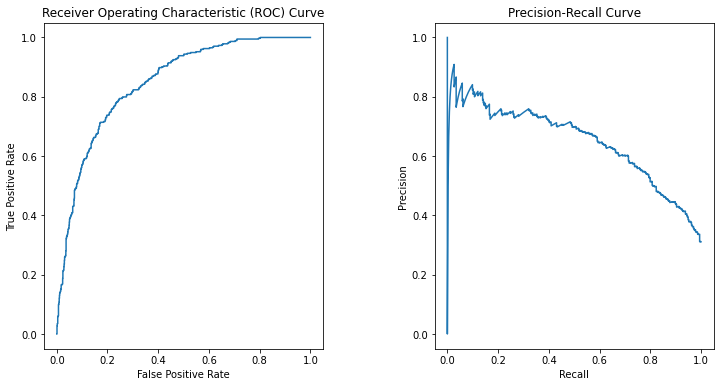

ROC AUC: 0.8475482862334408
PR: 0.64803301943247
Accuracy: 0.8123667377398721
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.68      0.56      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



In [134]:
evaluate_model(logreg, X_test_encoded, y_test)

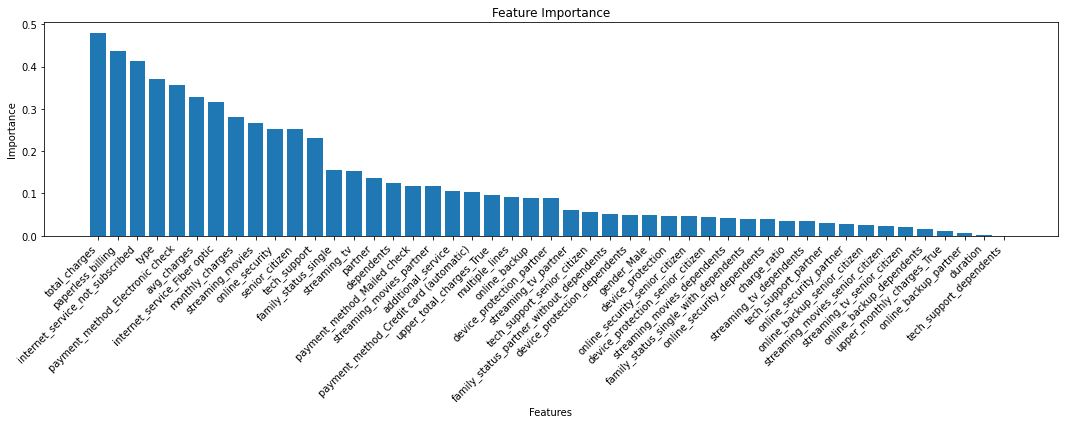

In [135]:
# Get feature importance
feature_importance = abs(logreg.coef_[0])

# Get corresponding feature names
feature_names = X_train_encoded.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Upsampling

In [136]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_2 = LogisticRegression(random_state=123)
clf = GridSearchCV(logreg_2, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_2 = clf.fit(X_upsampled, y_upsampled)
print('Best Penalty:', logreg_2.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_2.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_2.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 0.5994842503189409
Best Solver: liblinear


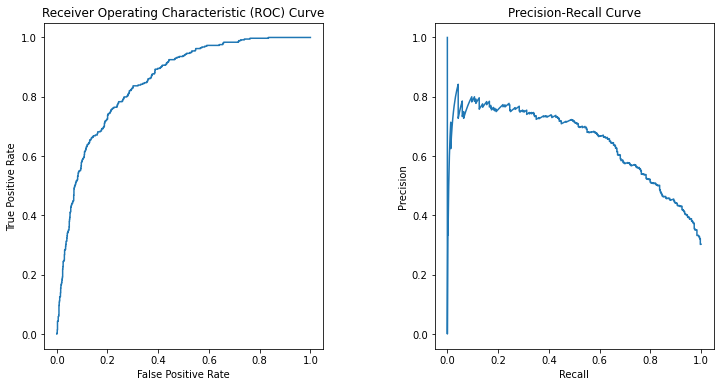

ROC AUC: 0.8504912745701996
PR: 0.6472143957975395
Accuracy: 0.7611940298507462
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.53      0.78      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [137]:
evaluate_model(logreg_2, X_test_encoded, y_test)

### Downsampling

In [138]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_11 = LogisticRegression(random_state=123)
clf = GridSearchCV(logreg_11, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_11 = clf.fit(X_downsampled, y_downsampled)
print('Best Penalty:', logreg_11.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_11.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_11.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 0.5994842503189409
Best Solver: liblinear


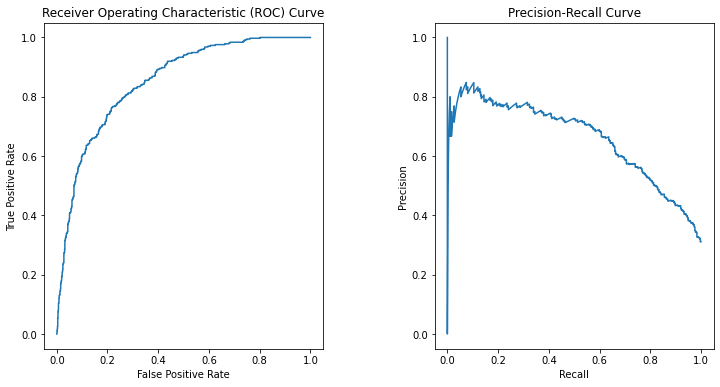

ROC AUC: 0.8509545946337701
PR: 0.6578426571258142
Accuracy: 0.7611940298507462
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.78      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [139]:
evaluate_model(logreg_11, X_test_encoded, y_test)

### Hybrid Sampling

In [140]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_12 = LogisticRegression(random_state=123)
clf = GridSearchCV(logreg_12, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_12 = clf.fit(X_hybrid, y_hybrid)
print('Best Penalty:', logreg_12.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_12.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_12.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 0.5994842503189409
Best Solver: liblinear


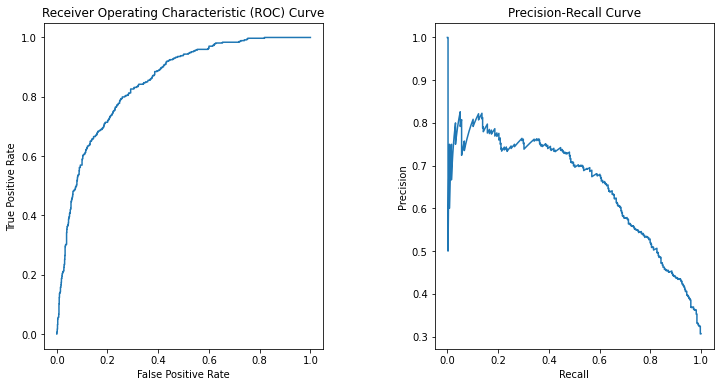

ROC AUC: 0.8499179483462839
PR: 0.6519831853208709
Accuracy: 0.759772565742715
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [141]:
evaluate_model(logreg_12, X_test_encoded, y_test)

### Grid search - hyperparamater tuning

In [142]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_3 = LogisticRegression(random_state=123, class_weight='balanced')
clf = GridSearchCV(logreg_3, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_3 = clf.fit(X_train_encoded, y_train)
print('Best Penalty:', logreg_3.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_3.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_3.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 0.21544346900318834
Best Solver: liblinear


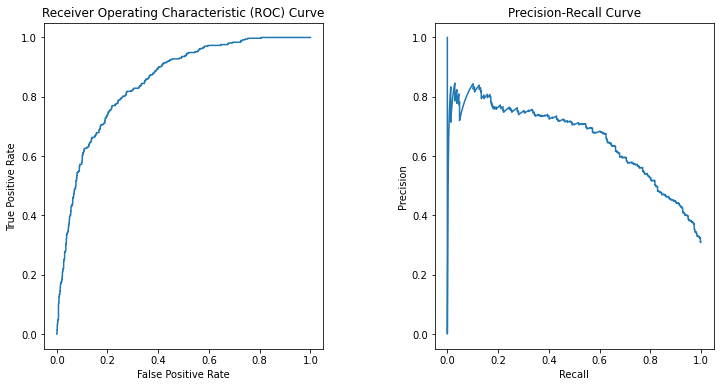

ROC AUC: 0.8515939245538927
PR: 0.6553850673293914
Accuracy: 0.7512437810945274
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [143]:
evaluate_model(logreg_3, X_test_encoded, y_test)

### Feature Selection BEST

In [144]:
drop_columns = ['total_charges', 'duration']
X_train_select = X_train_encoded.drop(drop_columns, axis=1)

X_test_select = X_test_encoded.drop(drop_columns, axis=1)


In [145]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_4 = LogisticRegression(random_state=123, class_weight='balanced')
clf = GridSearchCV(logreg_4, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_4 = clf.fit(X_train_select, y_train)
print('Best Penalty:', logreg_4.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_4.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_4.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 0.21544346900318834
Best Solver: liblinear


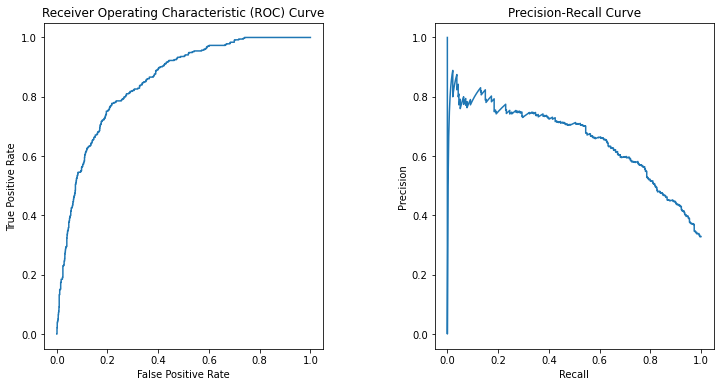

ROC AUC: 0.8504162115431405
PR: 0.6526235393527777
Accuracy: 0.751954513148543
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [146]:
evaluate_model(logreg_4, X_test_select, y_test)

In [147]:
logreg_4 = LogisticRegression(random_state=123, class_weight='balanced',
                             penalty= 'l1', C= 0.5994842503189409, solver= 'liblinear')
logreg_4.fit(X_train_select, y_train)

LogisticRegression(C=0.5994842503189409, class_weight='balanced', penalty='l1',
                   random_state=123, solver='liblinear')

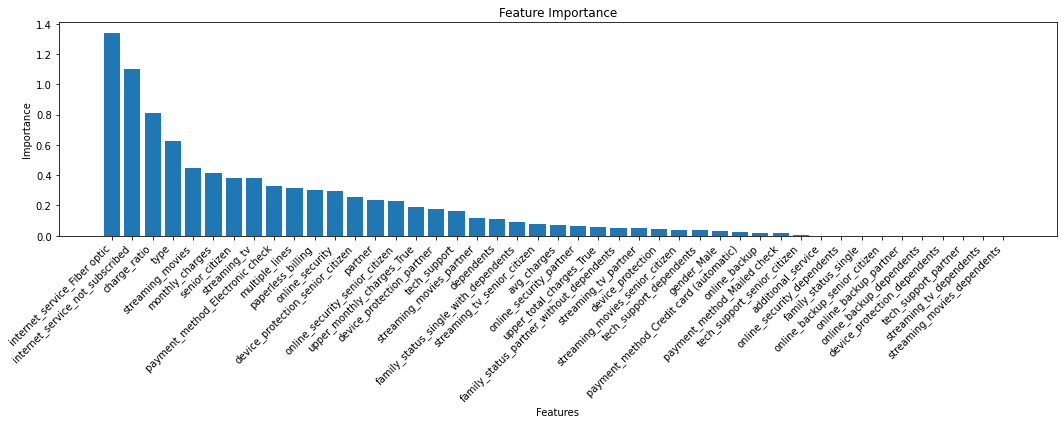

In [148]:
# Get feature importance
feature_importance = abs(logreg_4.coef_[0])

# Get corresponding feature names
feature_names = X_train_select.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Feature Selection V2

In [149]:
X_train_encoded.columns

Index(['payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'internet_service_Fiber optic',
       'internet_service_not_subscribed', 'upper_monthly_charges_True',
       'upper_total_charges_True', 'family_status_partner_without_dependents',
       'family_status_single', 'family_status_single_with_dependents', 'type',
       'paperless_billing', 'monthly_charges', 'total_charges',
       'senior_citizen', 'partner', 'dependents', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'multiple_lines', 'charge_ratio',
       'additional_service', 'avg_charges', 'online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_pr

In [150]:
drop_columns = ['online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_protection_dependents',
       'tech_support_senior_citizen', 'tech_support_partner',
       'tech_support_dependents', 'streaming_tv_senior_citizen',
       'streaming_tv_partner', 'streaming_tv_dependents',
       'streaming_movies_senior_citizen', 'streaming_movies_partner',
       'streaming_movies_dependents', 'duration']
X_train_select_2 = X_train_encoded.drop(drop_columns, axis=1)

X_test_select_2 = X_test_encoded.drop(drop_columns, axis=1)

In [151]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_5 = LogisticRegression(random_state=123, class_weight='balanced')
clf = GridSearchCV(logreg_5, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_5 = clf.fit(X_train_select_2, y_train)
print('Best Penalty:', logreg_5.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_5.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_5.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 12.915496650148826
Best Solver: liblinear


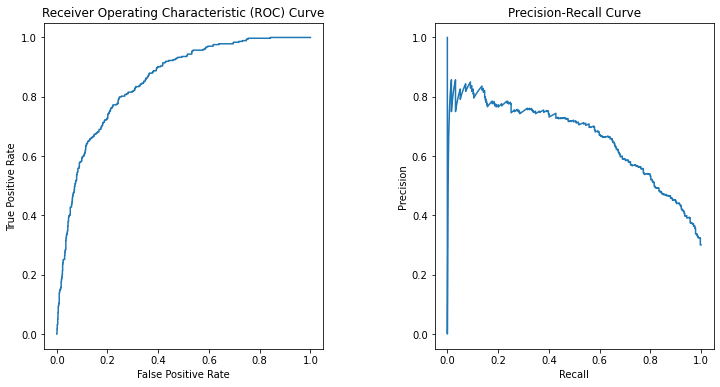

ROC AUC: 0.8526292766512572
PR: 0.6604798970785899
Accuracy: 0.7484008528784648
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [152]:
evaluate_model(logreg_5, X_test_select_2, y_test)

In [153]:
logreg_5 = LogisticRegression(random_state=123, class_weight='balanced',
                             penalty= 'l1', C= 12.915496650148826, solver= 'liblinear')
logreg_5.fit(X_train_select_2, y_train)

LogisticRegression(C=12.915496650148826, class_weight='balanced', penalty='l1',
                   random_state=123, solver='liblinear')

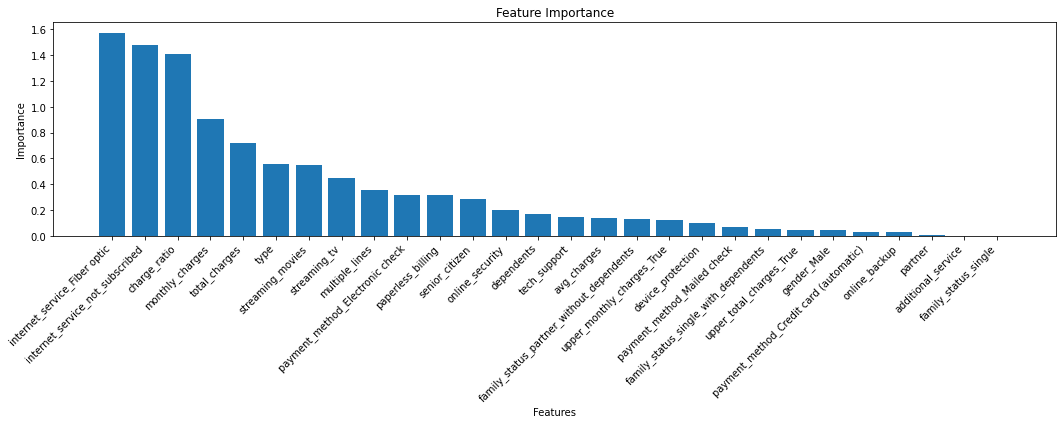

In [154]:
# Get feature importance
feature_importance = abs(logreg_5.coef_[0])

# Get corresponding feature names
feature_names = X_train_select_2.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Feature Selection V3

In [155]:
drop_columns = ['total_charges', 'gender_Male', 'partner', 'online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_protection_dependents',
       'tech_support_senior_citizen', 'tech_support_partner',
       'tech_support_dependents', 'streaming_tv_senior_citizen',
       'streaming_tv_partner', 'streaming_tv_dependents',
       'streaming_movies_senior_citizen', 'streaming_movies_partner',
       'streaming_movies_dependents', 'duration']
X_train_select_3 = X_train_encoded.drop(drop_columns, axis=1)

X_test_select_3 = X_test_encoded.drop(drop_columns, axis=1)

In [156]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_6 = LogisticRegression(random_state=123, class_weight='balanced')
clf = GridSearchCV(logreg_6, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_6 = clf.fit(X_train_select_3, y_train)
print('Best Penalty:', logreg_6.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_6.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_6.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 12.915496650148826
Best Solver: liblinear


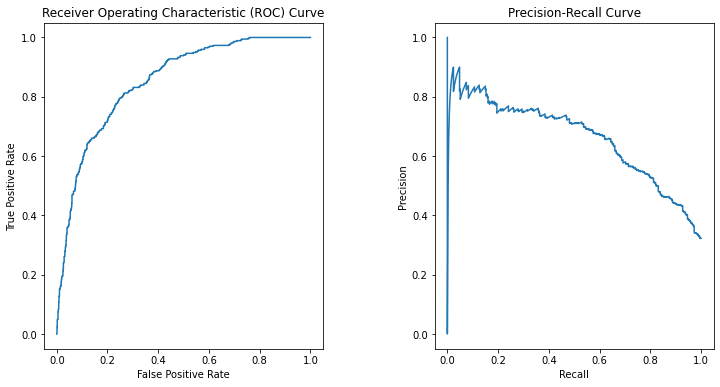

ROC AUC: 0.8507902324883134
PR: 0.6593168418812722
Accuracy: 0.7562189054726368
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [157]:
evaluate_model(logreg_6, X_test_select_3, y_test)

In [158]:
logreg_6 = LogisticRegression(random_state=123, class_weight='balanced',
                             penalty= 'l1', C= 12.915496650148826, solver= 'liblinear')
logreg_6.fit(X_train_select_3, y_train)

LogisticRegression(C=12.915496650148826, class_weight='balanced', penalty='l1',
                   random_state=123, solver='liblinear')

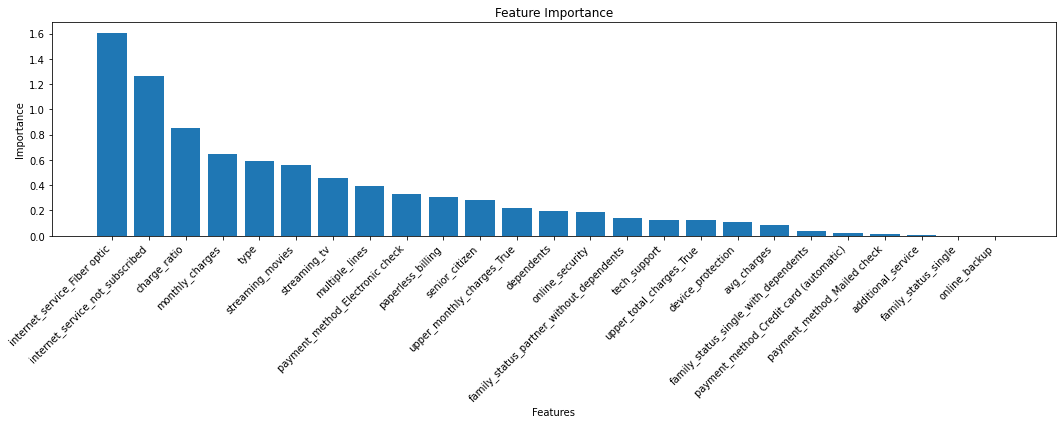

In [159]:
# Get feature importance
feature_importance = abs(logreg_6.coef_[0])

# Get corresponding feature names
feature_names = X_train_select_3.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Feature Selection V4

In [160]:
drop_columns = ['payment_method_Mailed check', 'additional_service', 
                'gender_Male', 'partner', 'online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_protection_dependents',
       'tech_support_senior_citizen', 'tech_support_partner',
       'tech_support_dependents', 'streaming_tv_senior_citizen',
       'streaming_tv_partner', 'streaming_tv_dependents',
       'streaming_movies_senior_citizen', 'streaming_movies_partner',
       'streaming_movies_dependents', 'duration']
X_train_select_4 = X_train_encoded.drop(drop_columns, axis=1)

X_test_select_4 = X_test_encoded.drop(drop_columns, axis=1)

In [161]:
# Using GridSearch to find combination of hyperparameter 'penalty', 'C', and 'solver' with best ROC_AUC score
#List Hyperparameters to test
penalty = ['l1', 'l2', None]
C = np.logspace(-2,2,10)
solver= ['liblinear', 'newton-cholesky']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

#create model with grid search
logreg_7 = LogisticRegression(random_state=123, class_weight='balanced')
clf = GridSearchCV(logreg_7, hyperparameters, cv=10, scoring='roc_auc')

# train model
logreg_7 = clf.fit(X_train_select_4, y_train)
print('Best Penalty:', logreg_7.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_7.best_estimator_.get_params()['C'])
print('Best Solver:', logreg_7.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 4.6415888336127775
Best Solver: liblinear


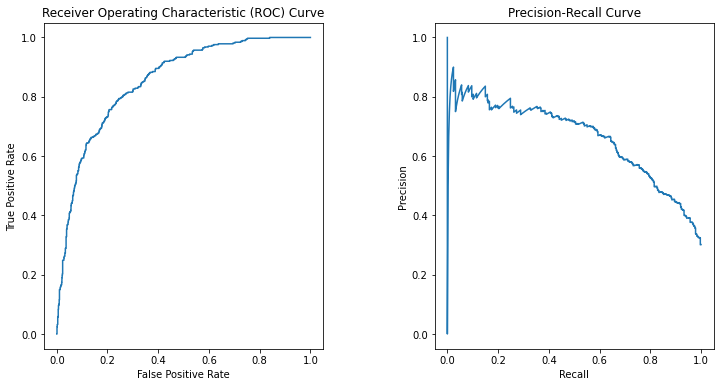

ROC AUC: 0.852823405169513
PR: 0.6608435195092626
Accuracy: 0.7512437810945274
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [162]:
evaluate_model(logreg_7, X_test_select_4, y_test)

In [163]:
logreg_7 = LogisticRegression(random_state=123, class_weight='balanced',
                             penalty= 'l1', C= 1.6681005372000592, solver= 'liblinear')
logreg_7.fit(X_train_select_4, y_train)

LogisticRegression(C=1.6681005372000592, class_weight='balanced', penalty='l1',
                   random_state=123, solver='liblinear')

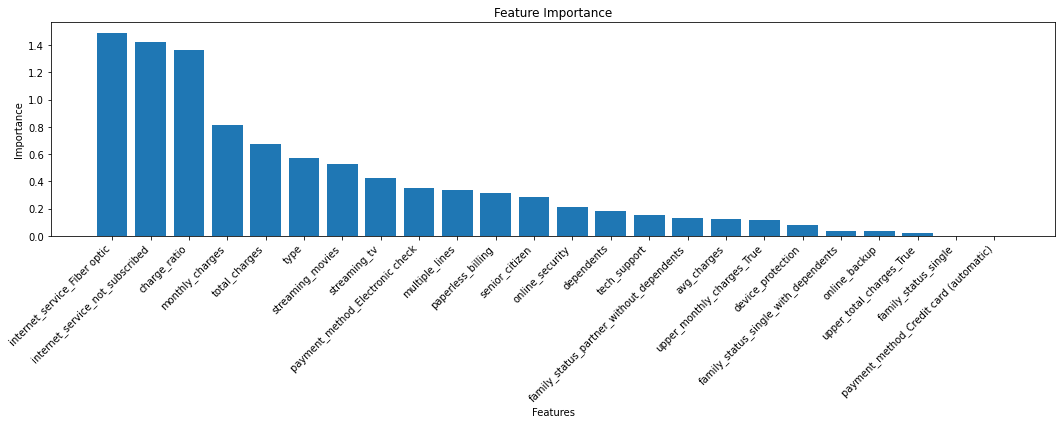

In [164]:
# Get feature importance
feature_importance = abs(logreg_7.coef_[0])

# Get corresponding feature names
feature_names = X_train_select_4.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Interim Conclusions

The best model of logistic regression performs well with ROC_AUC 83.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Random Forest

In [165]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=12345)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Define the custom scoring function based on ROC AUC
scorer = make_scorer(roc_auc_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_select, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
y_pred_prob = best_model.predict_proba(X_test_select)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best model and its parameters
print('Best Model:', best_model)
print('Best Parameters:', best_params)
print('ROC AUC:', roc_auc)

Best Model: RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=12345)
Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}
ROC AUC: 0.846391280264636


### Upsampling

In [166]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=12345)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Define the custom scoring function based on ROC AUC
scorer = make_scorer(roc_auc_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_upsampled, y_upsampled)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
y_pred_prob = best_model.predict_proba(X_test_encoded)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best model and its parameters
print('Best Model:', best_model)
print('Best Parameters:', best_params)
print('ROC AUC:', roc_auc)

Best Model: RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=12345)
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}
ROC AUC: 0.848764824947844


### Downsampling

In [167]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=12345)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Define the custom scoring function based on ROC AUC
scorer = make_scorer(roc_auc_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_downsampled, y_downsampled)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
y_pred_prob = best_model.predict_proba(X_test_encoded)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best model and its parameters
print('Best Model:', best_model)
print('Best Parameters:', best_params)
print('ROC AUC:', roc_auc)

Best Model: RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=200, random_state=12345)
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 5, 'n_estimators': 200}
ROC AUC: 0.8523031407405873


### Hybrid

In [168]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=12345)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Define the custom scoring function based on ROC AUC
scorer = make_scorer(roc_auc_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_hybrid, y_hybrid)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
y_pred_prob = best_model.predict_proba(X_test_encoded)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best model and its parameters
print('Best Model:', best_model)
print('Best Parameters:', best_params)
print('ROC AUC:', roc_auc)

Best Model: RandomForestClassifier(class_weight='balanced', random_state=12345)
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}
ROC AUC: 0.8435000595327456


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## LightGBM

In [169]:
# Calculate the number of positive and negative class samples in the training data
positive_samples = sum(y_train)
negative_samples = len(y_train) - positive_samples

# Calculate the imbalance ratio
imbalance_ratio = negative_samples / positive_samples
imbalance_ratio

2.762541806020067

In [170]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01],
    'reg_alpha': [0.1, 1.0],
    'reg_lambda': [0.1, 1.0]    
}

lgbm = LGBMClassifier(boosting_type='gbdt', n_estimators=200, max_depth=4, scale_pos_weight=imbalance_ratio,
                      random_state=123)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_encoded, y_train)

# Get the best parameter values and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameter values and the corresponding score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.1, 'reg_alpha': 1.0, 'reg_lambda': 0.1}
Best Score: 0.8949998785297237


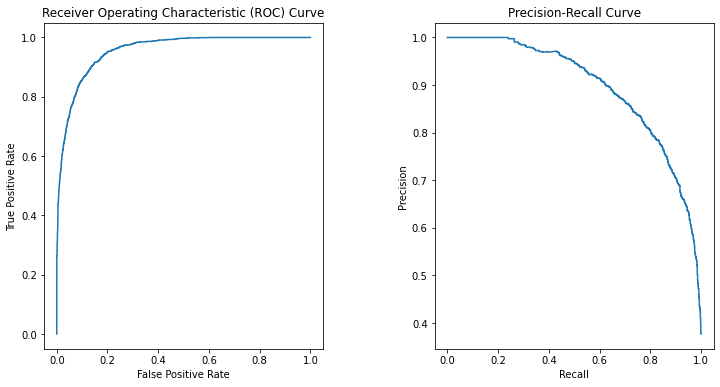

ROC AUC: 0.9554255103776106
PR: 0.8952170897724225
Accuracy: 0.8705777777777778
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4130
           1       0.70      0.91      0.79      1495

    accuracy                           0.87      5625
   macro avg       0.83      0.88      0.85      5625
weighted avg       0.89      0.87      0.88      5625



In [171]:
lgbm = LGBMClassifier(boosting_type='gbdt', n_estimators=200, scale_pos_weight=imbalance_ratio,
                      random_state=123, learning_rate= 0.1,
                      max_depth= 4, reg_alpha= 1, reg_lambda= 0.1)

lgbm.fit(X_train_encoded, y_train)
evaluate_model(lgbm, X_train_encoded, y_train)

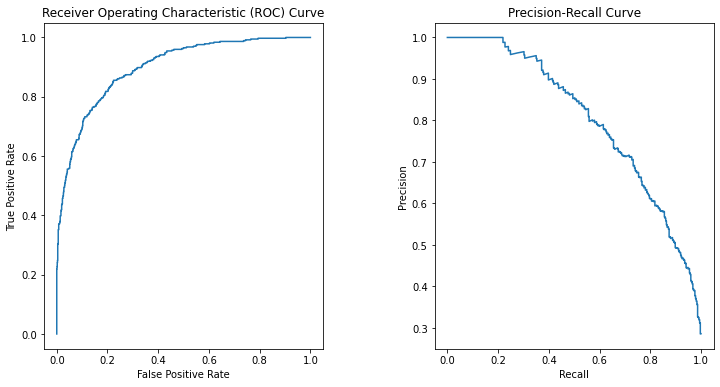

ROC AUC: 0.89810452914775
PR: 0.802628641685098
Accuracy: 0.820184790334044
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1033
           1       0.63      0.79      0.70       374

    accuracy                           0.82      1407
   macro avg       0.77      0.81      0.79      1407
weighted avg       0.84      0.82      0.83      1407



In [172]:
evaluate_model(lgbm, X_test_encoded, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

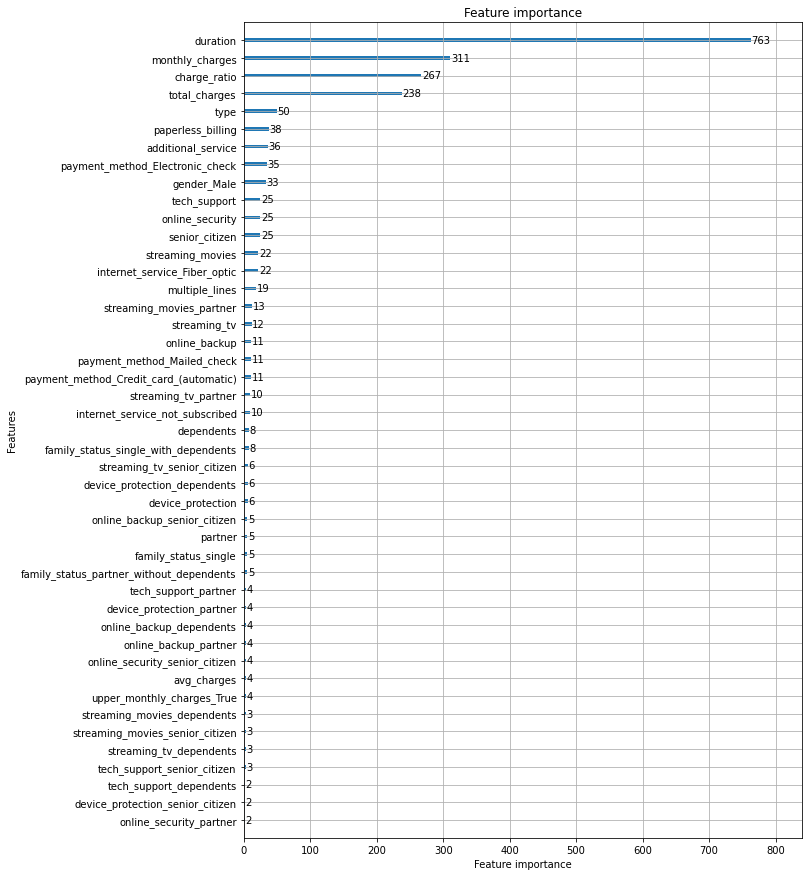

In [173]:
# load feature importance figures plot
plot_importance(lgbm, figsize=(10, 15))

### Feature Selection

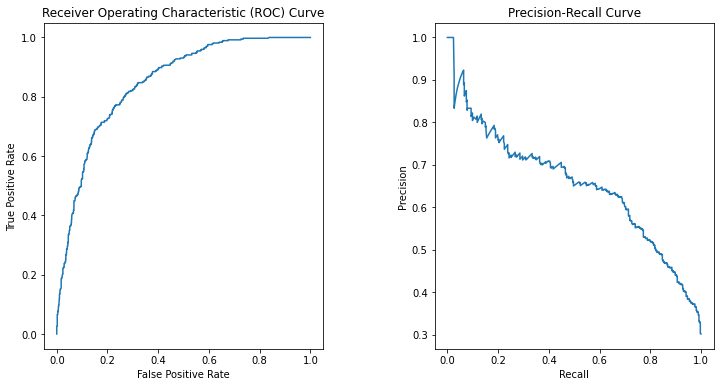

ROC AUC: 0.8472467399350834
PR: 0.653531347480631
Accuracy: 0.7683013503909026
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.55      0.77      0.64       374

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407



In [174]:
lgbm_2 = LGBMClassifier(boosting_type='gbdt', n_estimators=200, scale_pos_weight=imbalance_ratio,
                      random_state=123, learning_rate= 0.01,
                      max_depth=5, reg_alpha= 1, reg_lambda= 1)

lgbm_2.fit(X_train_select, y_train)
evaluate_model(lgbm_2, X_test_select, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

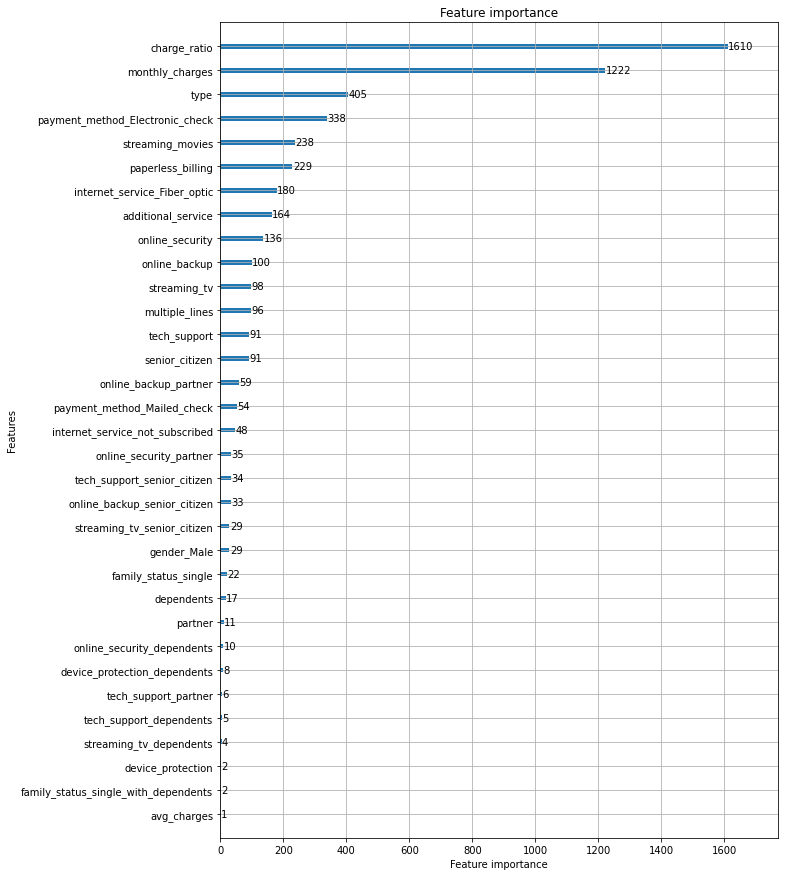

In [175]:
# load feature importance figures plot
plot_importance(lgbm_2, figsize=(10, 15))

### Feature Selection V2

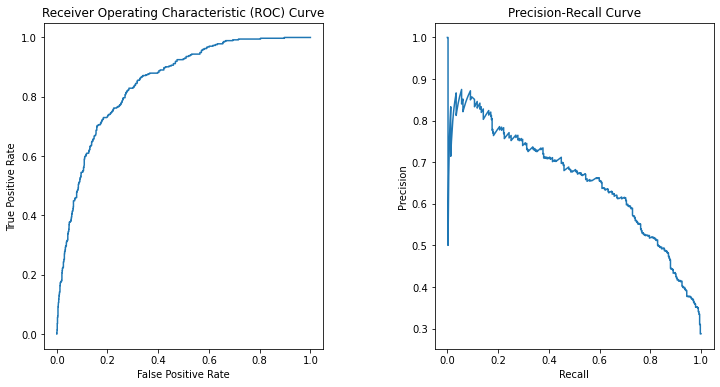

ROC AUC: 0.8479261897489789
PR: 0.6549041309361958
Accuracy: 0.7533759772565742
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407



In [176]:
lgbm_3 = LGBMClassifier(boosting_type='gbdt', n_estimators=400, scale_pos_weight=imbalance_ratio,
                      random_state=123, learning_rate= 0.01,
                      max_depth=5, reg_alpha= 1, reg_lambda= 1)
lgbm_3.fit(X_train_select_2, y_train)
evaluate_model(lgbm_3, X_test_select_2, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

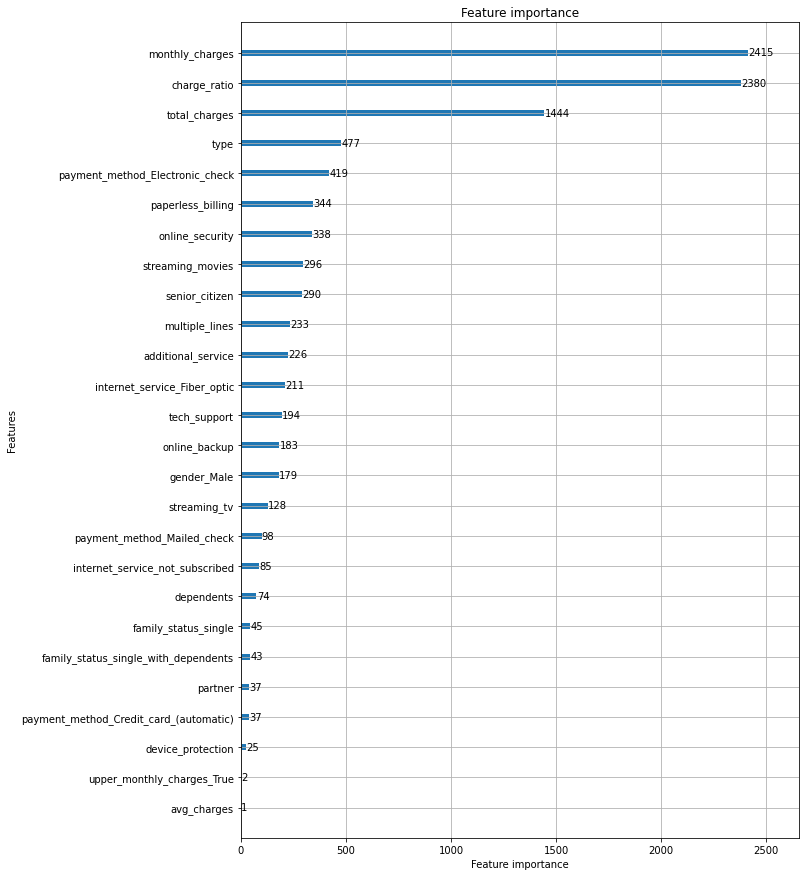

In [177]:
# load feature importance figures plot
plot_importance(lgbm_3, figsize=(10, 15))

### Feature Selection V3

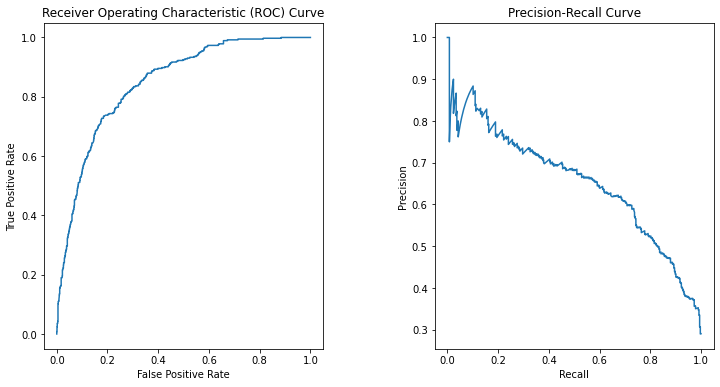

ROC AUC: 0.8469697832490385
PR: 0.6531645690662004
Accuracy: 0.7533759772565742
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407



In [178]:
lgbm_4 = LGBMClassifier(boosting_type='gbdt', n_estimators=400, scale_pos_weight=imbalance_ratio,
                      random_state=123, learning_rate= 0.01,
                      max_depth=5, reg_alpha= 1, reg_lambda= 1)

lgbm_4.fit(X_train_select_3, y_train)
evaluate_model(lgbm_4, X_test_select_3, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

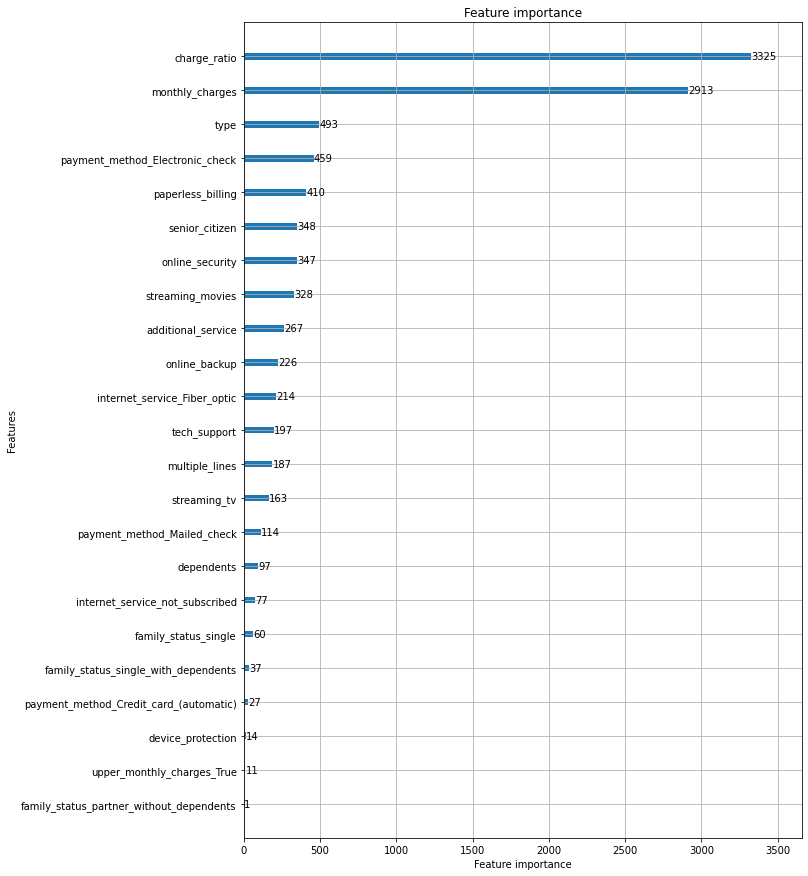

In [179]:
# load feature importance figures plot
plot_importance(lgbm_4, figsize=(10, 15))

### Feature Selection V4

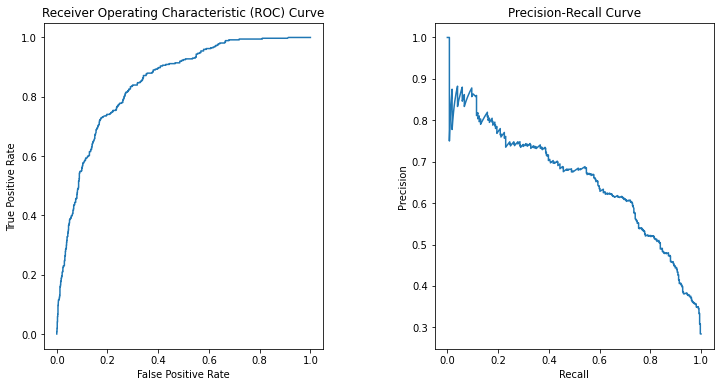

ROC AUC: 0.847477105776747
PR: 0.6562636747347541
Accuracy: 0.751954513148543
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [180]:
lgbm_5 = LGBMClassifier(boosting_type='gbdt', n_estimators=400, scale_pos_weight=imbalance_ratio,
                      random_state=123, learning_rate= 0.01,
                      max_depth=5, reg_alpha= 1, reg_lambda= 1)

lgbm_5.fit(X_train_select_4, y_train)
evaluate_model(lgbm_5, X_test_select_4, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

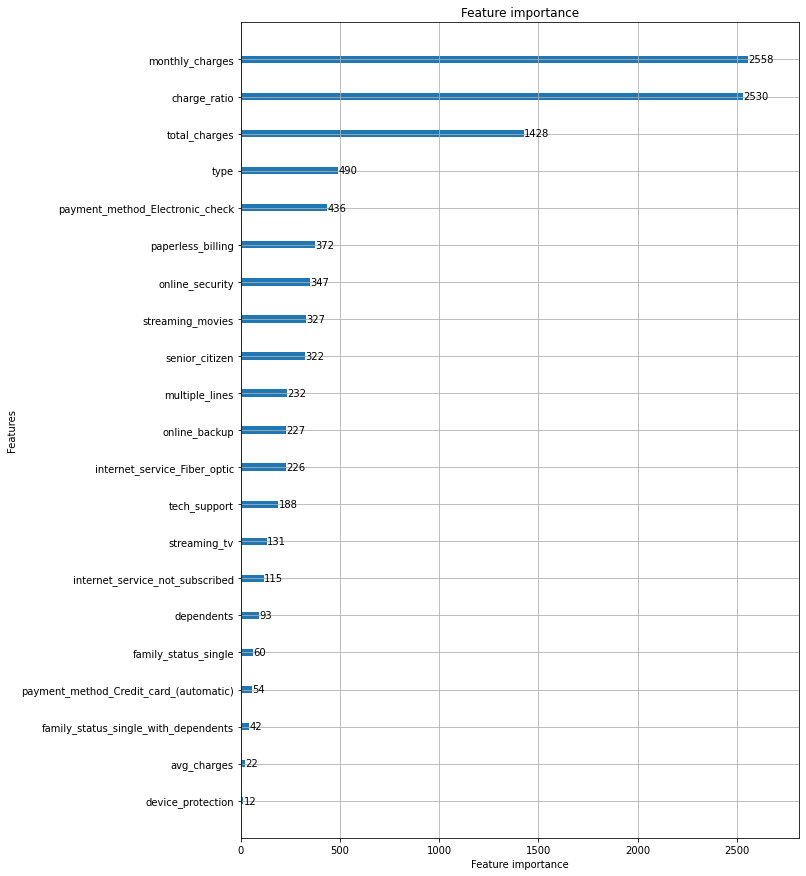

In [181]:
# load feature importance figures plot
plot_importance(lgbm_5, figsize=(10, 15))

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Feature Select and Upsampled

In [182]:
drop_columns = ['online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_protection_dependents',
       'tech_support_senior_citizen', 'tech_support_partner',
       'tech_support_dependents', 'streaming_tv_senior_citizen',
       'streaming_tv_partner', 'streaming_tv_dependents',
       'streaming_movies_senior_citizen', 'streaming_movies_partner',
       'streaming_movies_dependents', 'duration']
X_train_select_upsampled = X_upsampled.drop(drop_columns, 
                                        axis=1)

X_test_select_upsampled = X_test_encoded.drop(drop_columns, 
                                        axis=1)

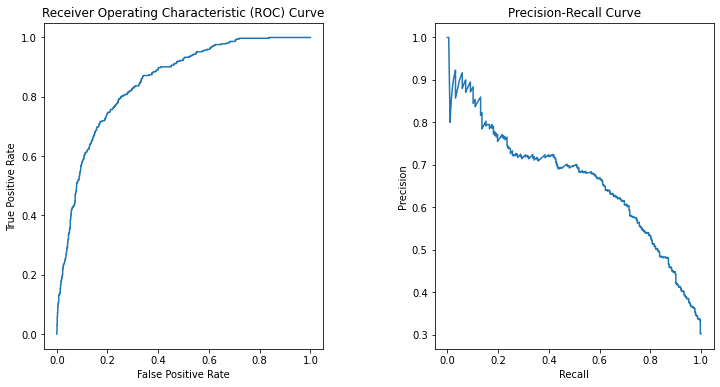

ROC AUC: 0.8490042501203596
PR: 0.6605078942977951
Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.54      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [183]:
lgbm_6 = LGBMClassifier(boosting_type='gbdt', n_estimators=150,
                      random_state=12345, learning_rate= 0.052,
                      max_depth=3, reg_alpha= 1, reg_lambda= 1)

lgbm_6.fit(X_train_select_upsampled, y_upsampled)
evaluate_model(lgbm_6, X_test_select_upsampled, y_test)

### Feature Select and Downsampled

In [184]:
drop_columns = ['online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_protection_dependents',
       'tech_support_senior_citizen', 'tech_support_partner',
       'tech_support_dependents', 'streaming_tv_senior_citizen',
       'streaming_tv_partner', 'streaming_tv_dependents',
       'streaming_movies_senior_citizen', 'streaming_movies_partner',
       'streaming_movies_dependents', 'duration']
X_train_select_downsampled = X_downsampled.drop(drop_columns, 
                                        axis=1)

X_test_select_downsampled = X_test_encoded.drop(drop_columns, 
                                        axis=1)

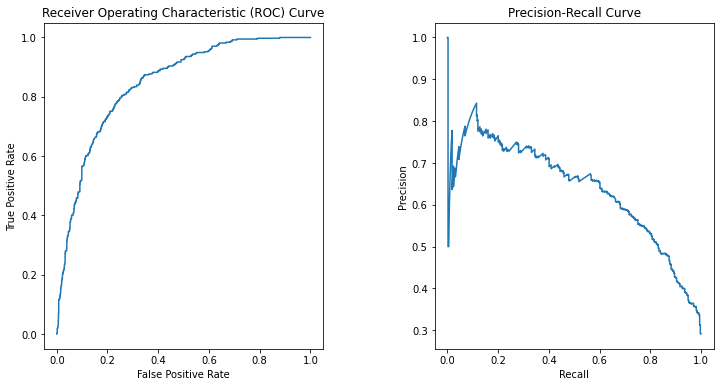

ROC AUC: 0.8448887255333357
PR: 0.6360113436680652
Accuracy: 0.7633262260127932
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.54      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [185]:
lgbm_7 = LGBMClassifier(boosting_type='gbdt', n_estimators=200,
                      random_state=12345, learning_rate= 0.051,
                      max_depth=3, reg_alpha= 1, reg_lambda= 1)

lgbm_7.fit(X_train_select_downsampled, y_downsampled)
evaluate_model(lgbm_7, X_test_select_downsampled, y_test)

### Feature Select and Hybrid

In [186]:
drop_columns = ['online_security_senior_citizen',
       'online_security_partner', 'online_security_dependents',
       'online_backup_senior_citizen', 'online_backup_partner',
       'online_backup_dependents', 'device_protection_senior_citizen',
       'device_protection_partner', 'device_protection_dependents',
       'tech_support_senior_citizen', 'tech_support_partner',
       'tech_support_dependents', 'streaming_tv_senior_citizen',
       'streaming_tv_partner', 'streaming_tv_dependents',
       'streaming_movies_senior_citizen', 'streaming_movies_partner',
       'streaming_movies_dependents', 'duration']
X_train_select_hybrid = X_hybrid.drop(drop_columns, 
                                        axis=1)

X_test_select_hybrid = X_test_encoded.drop(drop_columns, 
                                        axis=1)

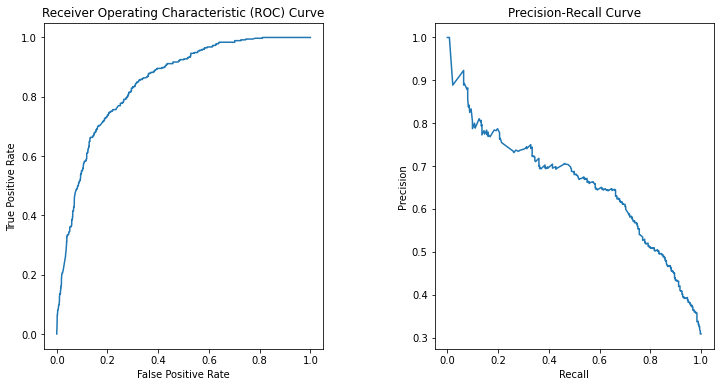

ROC AUC: 0.8477527682726704
PR: 0.6569141261700583
Accuracy: 0.7412935323383084
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



In [187]:
lgbm_8 = LGBMClassifier(boosting_type='gbdt', n_estimators=200,
                      random_state=12345, learning_rate= 0.01,
                      max_depth=4, reg_alpha= 1, reg_lambda= 1)

lgbm_8.fit(X_train_select_hybrid, y_hybrid)
evaluate_model(lgbm_8, X_test_select_hybrid, y_test)

## XGBoost

In [188]:
# # With GridSearchCV, find best hyperparamters for XGBoost classifier

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.001],
#     'gamma': [7, 10],
#     'reg_alpha': [0.1, 1.0],
#     'reg_lambda': [0.1, 1.0]
# }

# # Create an instance of the XGBoost classifier
# xgb_model = xgb.XGBClassifier(random_state=123, n_estimators=2000, scale_pos_weight=imbalance_ratio)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train_encoded, y_train_encoded)

# # Get the best parameter values and the corresponding score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Print the best parameter values and the corresponding score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

[04:39:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


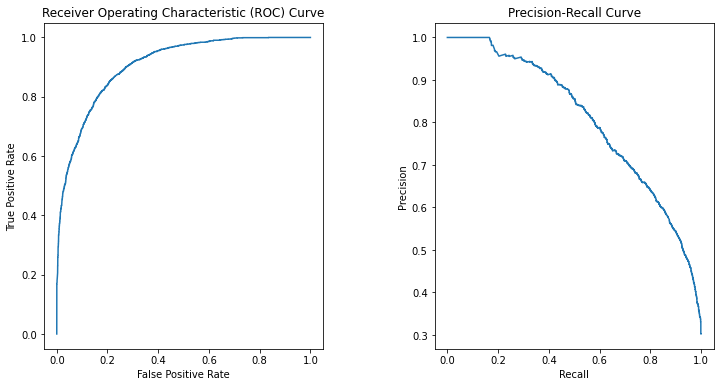

ROC AUC: 0.9072386567007054
PR: 0.8059389131313297
Accuracy: 0.8113777777777778
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4130
           1       0.60      0.84      0.70      1495

    accuracy                           0.81      5625
   macro avg       0.77      0.82      0.78      5625
weighted avg       0.84      0.81      0.82      5625



In [189]:
# Create an instance of the XGBoost classifier
xgb_model = XGBClassifier(random_state=123, n_estimators=2000, scale_pos_weight=2.7, gamma=10,
                             learning_rate=0.01, reg_alpha=1, reg_lambda=1)

xgb_model.fit(X_train_encoded, y_train)
evaluate_model(xgb_model, X_train_encoded, y_train)

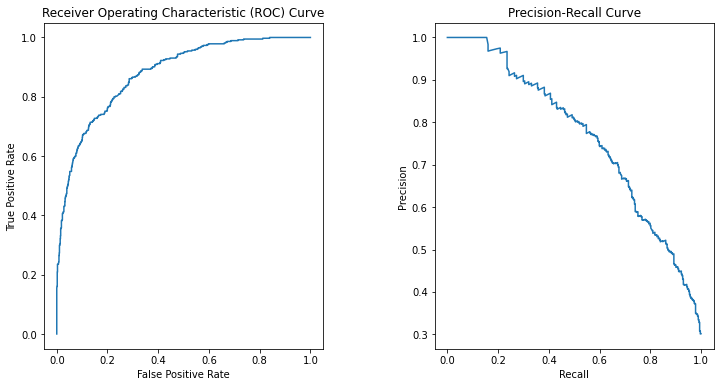

ROC AUC: 0.8783422459893048
PR: 0.7643282827198342
Accuracy: 0.7846481876332623
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1033
           1       0.57      0.77      0.66       374

    accuracy                           0.78      1407
   macro avg       0.74      0.78      0.75      1407
weighted avg       0.82      0.78      0.79      1407



In [190]:
evaluate_model(xgb_model, X_test_encoded, y_test)

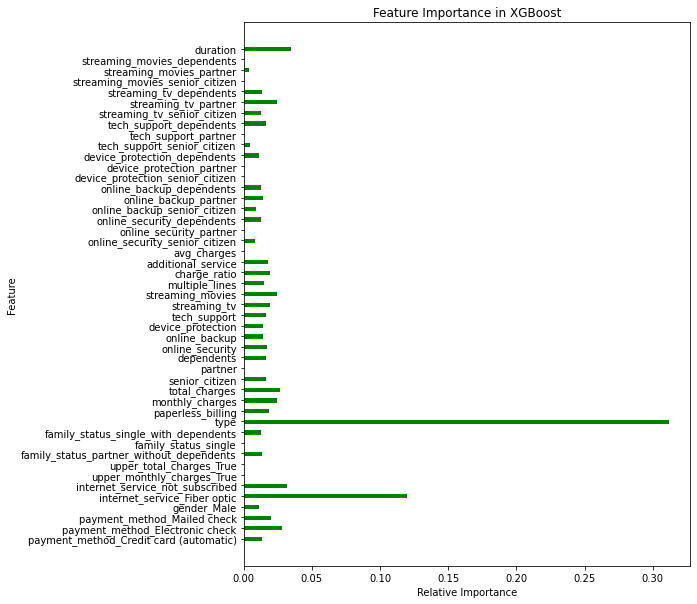

<Figure size 720x1080 with 0 Axes>

In [191]:
# check each feature's importance on xgb model dataset 1
y = xgb_model.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_encoded.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(8, 10, forward=True)

### Feature Selection

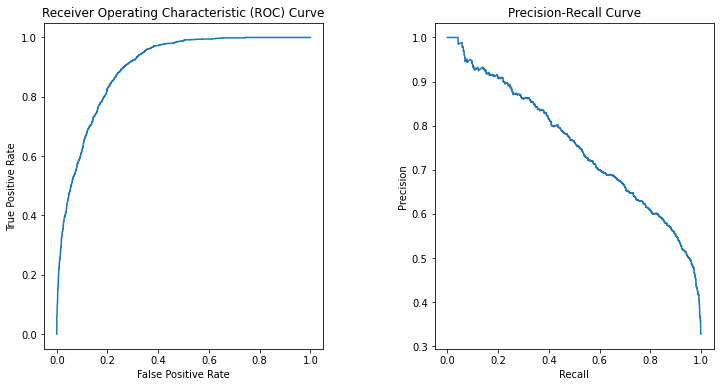

ROC AUC: 0.8983192562779887
PR: 0.7539417010374876
Accuracy: 0.7934222222222223
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      4130
           1       0.57      0.87      0.69      1495

    accuracy                           0.79      5625
   macro avg       0.76      0.82      0.77      5625
weighted avg       0.84      0.79      0.80      5625



In [192]:
# Create an instance of the XGBoost classifier
xgb_model_2 = XGBClassifier(random_state=12345, n_estimators=600, scale_pos_weight=2.7, gamma=1,
                             max_depth=5, learning_rate=0.01, reg_alpha=1, reg_lambda=1, eval_metric='aucpr',
                            objective='binary:logistic', tree_method='hist')

xgb_model_2.fit(X_train_select, y_train)
evaluate_model(xgb_model_2, X_train_select, y_train)

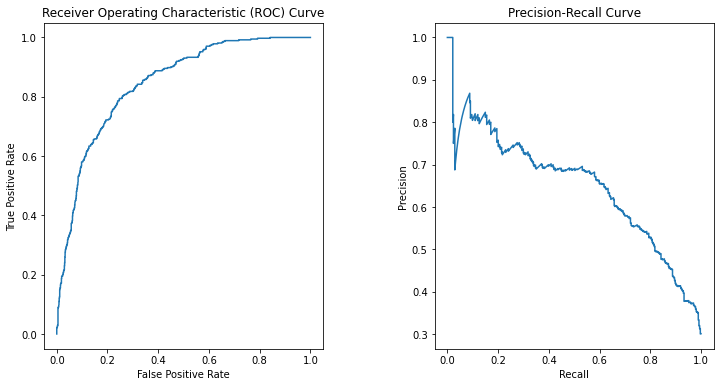

ROC AUC: 0.8451152088046343
PR: 0.6490651499069501
Accuracy: 0.757640369580668
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [193]:
evaluate_model(xgb_model_2, X_test_select, y_test)

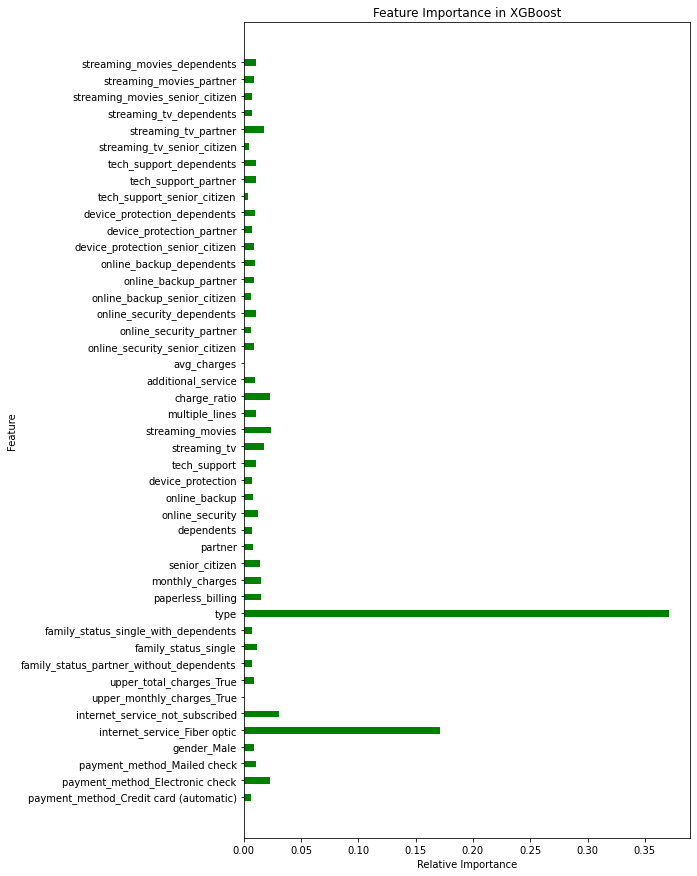

<Figure size 720x720 with 0 Axes>

In [194]:
# check each feature's importance on xgb model dataset 1
y = xgb_model_2.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,10))
fig.set_size_inches(8, 15, forward=True)

### Feature Selection V2

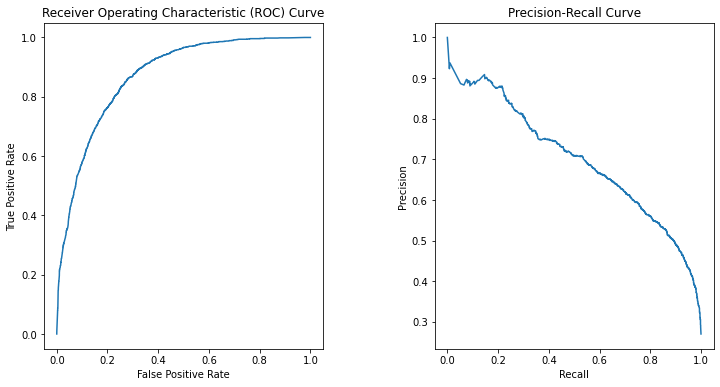

ROC AUC: 0.8701729736733421
PR: 0.7010460856950225
Accuracy: 0.7696
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      4130
           1       0.54      0.83      0.66      1495

    accuracy                           0.77      5625
   macro avg       0.73      0.79      0.74      5625
weighted avg       0.82      0.77      0.78      5625



In [195]:
# Create an instance of the XGBoost classifier
xgb_model_3 = XGBClassifier(random_state=123, n_estimators=200, scale_pos_weight=2.7, gamma=10,
                             learning_rate=0.01, reg_alpha=1, reg_lambda=1, eval_metric='aucpr',
                            objective='binary:logistic', tree_method='exact')

xgb_model_3.fit(X_train_select_2, y_train)
evaluate_model(xgb_model_3, X_train_select_2, y_train)

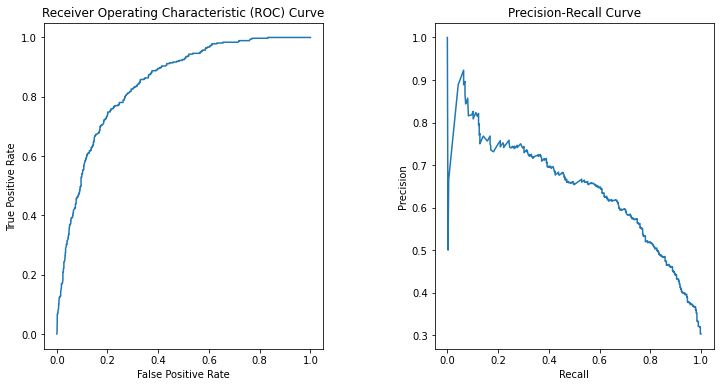

ROC AUC: 0.845261452288387
PR: 0.6427784198284722
Accuracy: 0.749822316986496
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [196]:
evaluate_model(xgb_model_3, X_test_select_2, y_test)

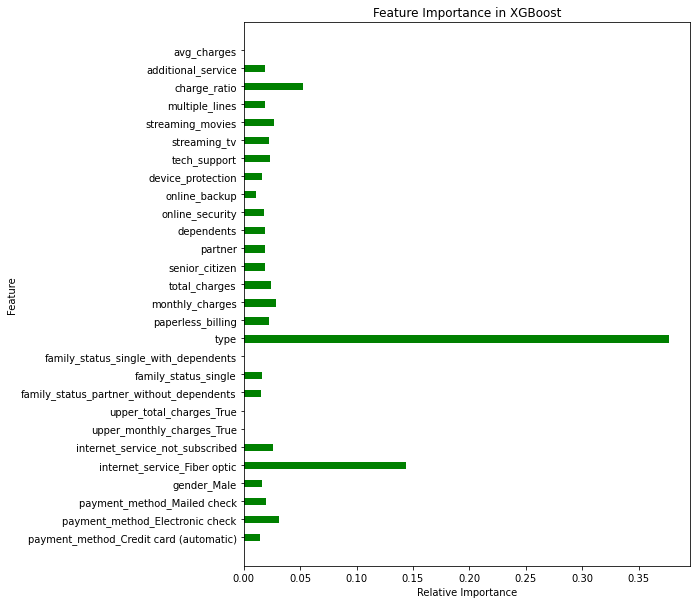

<Figure size 720x1080 with 0 Axes>

In [197]:
# check each feature's importance on xgb model dataset 1
y = xgb_model_3.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select_2.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(8, 10, forward=True)

### Feature Selection V3

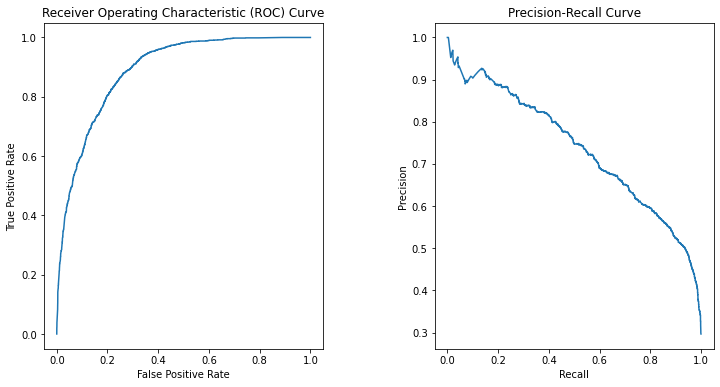

ROC AUC: 0.8897670200102035
PR: 0.7367399153994939
Accuracy: 0.7843555555555556
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4130
           1       0.56      0.85      0.68      1495

    accuracy                           0.78      5625
   macro avg       0.75      0.81      0.76      5625
weighted avg       0.84      0.78      0.80      5625



In [198]:
# Create an instance of the XGBoost classifier
xgb_model_4 = XGBClassifier(random_state=123, n_estimators=200, scale_pos_weight=2.7, gamma=1,
                             learning_rate=0.01, reg_alpha=1, reg_lambda=1, eval_metric='aucpr',
                            objective='binary:logistic', tree_method='exact')

xgb_model_4.fit(X_train_select_3, y_train)
evaluate_model(xgb_model_4, X_train_select_3, y_train)

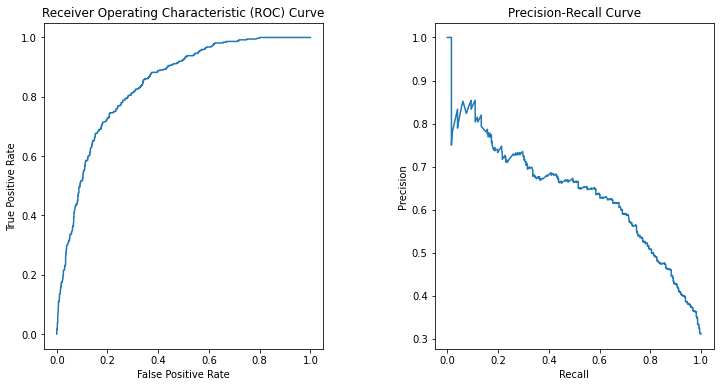

ROC AUC: 0.8413581748813228
PR: 0.6389704672631273
Accuracy: 0.7512437810945274
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [199]:
evaluate_model(xgb_model_4, X_test_select_3, y_test)

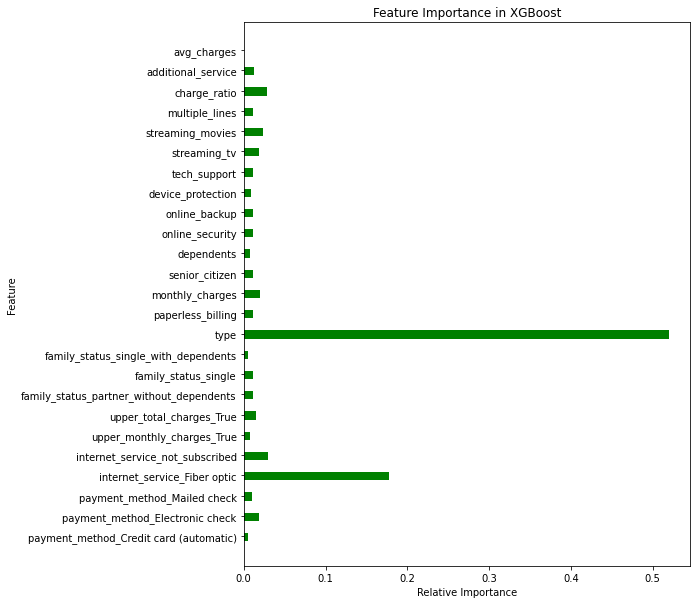

<Figure size 720x1080 with 0 Axes>

In [200]:
# check each feature's importance on xgb model dataset 1
y = xgb_model_4.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select_3.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(8, 10, forward=True)

### Feature Selection V4

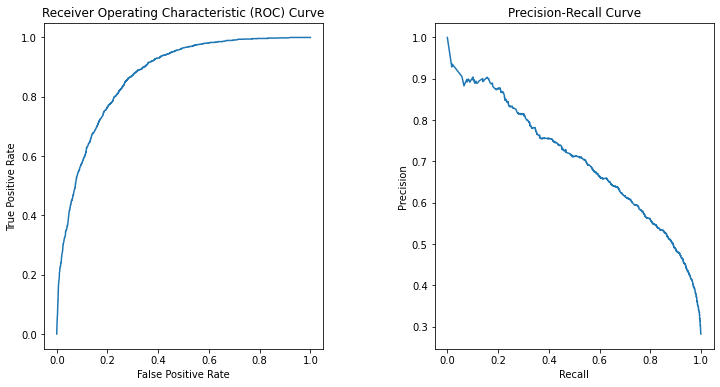

ROC AUC: 0.8701508660830695
PR: 0.7031907383817046
Accuracy: 0.7667555555555555
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      4130
           1       0.54      0.83      0.65      1495

    accuracy                           0.77      5625
   macro avg       0.73      0.79      0.74      5625
weighted avg       0.82      0.77      0.78      5625



In [201]:
# Create an instance of the XGBoost classifier
xgb_model_5 = XGBClassifier(random_state=123, n_estimators=200, scale_pos_weight=2.7, gamma=10,
                             learning_rate=0.01, reg_alpha=1, reg_lambda=1, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='exact')

xgb_model_5.fit(X_train_select_4, y_train)
evaluate_model(xgb_model_5, X_train_select_4, y_train)

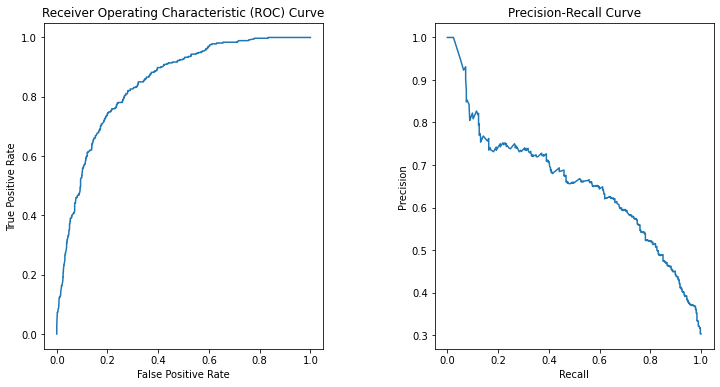

ROC AUC: 0.8456458267545336
PR: 0.6544963608456574
Accuracy: 0.7512437810945274
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [202]:
evaluate_model(xgb_model_5, X_test_select_4, y_test)

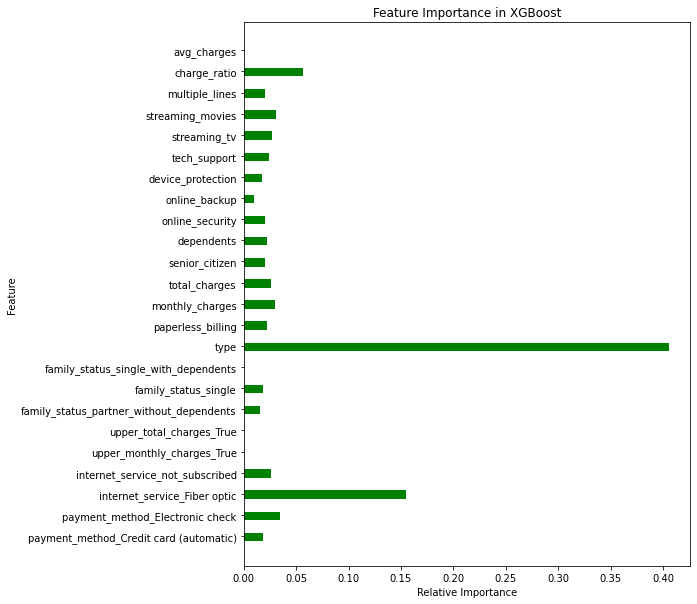

<Figure size 720x1080 with 0 Axes>

In [203]:
# check each feature's importance on xgb model dataset 1
y = xgb_model_5.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select_4.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(8, 10, forward=True)

### Upsampling

In [204]:
# # With GridSearchCV, find best hyperparamters for XGBoost classifier

# # Define the parameter grid
# param_grid = {'n_estimators':[50, 100],
#     'learning_rate': [0.1, 0.09],
#     'max_depth':[3, 4],
#     'reg_alpha': [0.1, 1],
#     'reg_lambda': [0.1, 1]
# }

# # Create an instance of the XGBoost classifier
# xgb_model_9 = XGBClassifier(random_state=123, use_label_encoder=False,
#                           eval_metric='aucpr', objective='binary:logistic',
#                           tree_method='exact'
#                          )

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_model_9, param_grid=param_grid, cv=5, scoring='roc_auc')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_upsampled, y_upsampled)

# # Get the best parameter values and the corresponding score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Print the best parameter values and the corresponding score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

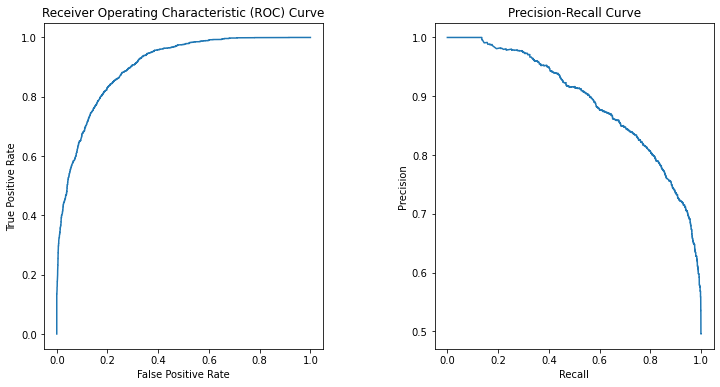

ROC AUC: 0.9020698042695006
PR: 0.8907446213991075
Accuracy: 0.8143239454568625
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4130
           1       0.79      0.84      0.81      3717

    accuracy                           0.81      7847
   macro avg       0.81      0.82      0.81      7847
weighted avg       0.82      0.81      0.81      7847



In [205]:
xgb_model_9 = XGBClassifier(random_state=123, n_estimators=100, use_label_encoder=False,
                            learning_rate=0.05, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='exact', max_depth=4, reg_alpha = 1, reg_lambda =1
                           )

xgb_model_9.fit(X_upsampled, y_upsampled)
evaluate_model(xgb_model_9, X_upsampled, y_upsampled)

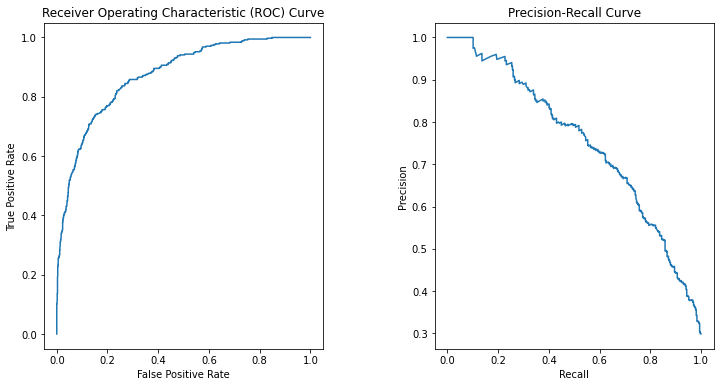

ROC AUC: 0.8728264076905954
PR: 0.7510448626235786
Accuracy: 0.7860696517412935
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1033
           1       0.57      0.77      0.66       374

    accuracy                           0.79      1407
   macro avg       0.74      0.78      0.75      1407
weighted avg       0.82      0.79      0.79      1407



In [206]:
evaluate_model(xgb_model_9, X_test_encoded, y_test)

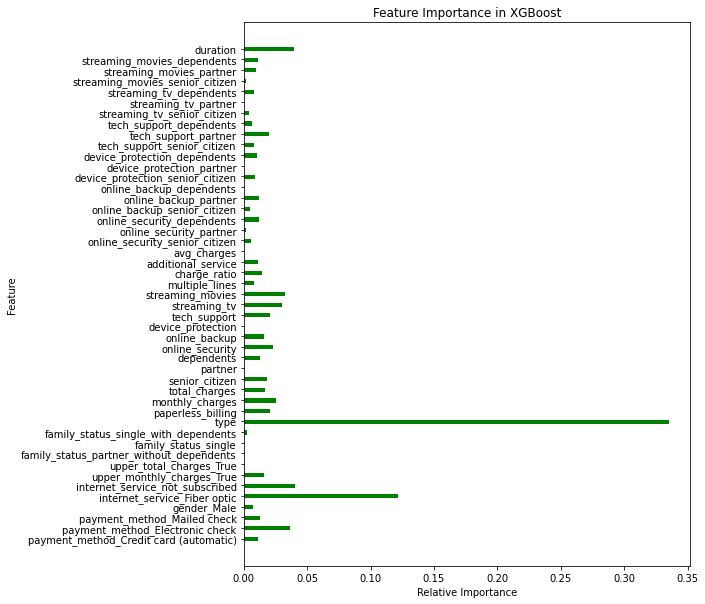

<Figure size 720x1080 with 0 Axes>

In [207]:
# check each feature's importance on xgb model
y = xgb_model_9.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_encoded.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(8, 10, forward=True)

In [208]:
# # With GridSearchCV, find best hyperparamters for XGBoost classifier

# # Define the parameter grid
# param_grid = {'n_estimators':[50, 100],
#     'learning_rate': [0.1, 0.09],
#     'max_depth':[3, 4],
#     'reg_alpha': [0.1, 1],
#     'reg_lambda': [0.1, 1]
# }

# # Create an instance of the XGBoost classifier
# xgb_model_9 = XGBClassifier(random_state=123, use_label_encoder=False,
#                           eval_metric='aucpr', objective='binary:logistic',
#                           tree_method='exact'
#                          )

# # Define the custom scoring function based on precision-recall trade-off
# def precision_recall_auc(y_true, y_pred):
#     precision, recall, _ = precision_recall_curve(y_true, y_pred)
#     return auc(recall, precision)

# # Create the scorer using the custom scoring function
# scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# # Perform grid search with precision-recall trade-off evaluation
# grid_search = GridSearchCV(estimator=xgb_model_9, param_grid=param_grid, cv=5, scoring=scorer)

# # Fit the grid search to the data
# grid_search.fit(X_train_encoded, y_train)

# # Get the best model and its parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test_encoded)
# precision, recall, _ = precision_recall_curve(y_test, y_pred)
# roc_auc = auc(recall, precision)

# print('Best Model:', best_model)
# print('Best Parameters:', best_params)
# print('ROC AUC:', roc_auc)


### Feature Select and Upsampled

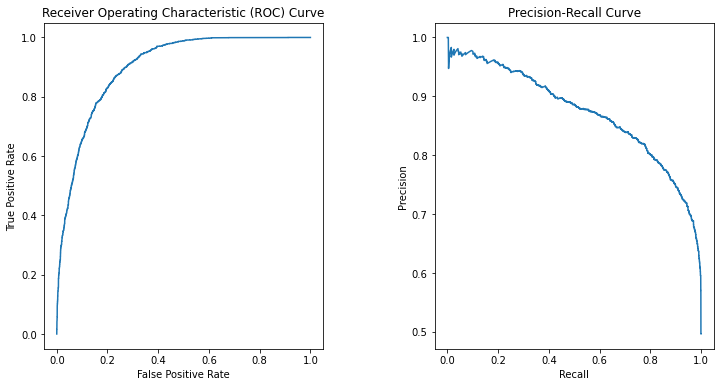

ROC AUC: 0.8995813033630574
PR: 0.8735294130579132
Accuracy: 0.8144513826940232
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      4130
           1       0.78      0.85      0.81      3717

    accuracy                           0.81      7847
   macro avg       0.82      0.82      0.81      7847
weighted avg       0.82      0.81      0.81      7847



In [209]:
# Create an instance of the XGBoost classifier
xgb_model_14 = XGBClassifier(random_state=123, n_estimators=200,
                            learning_rate=0.1, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='hist', max_depth=3, reg_alpha =1, reg_lambda =1
                           )

xgb_model_14.fit(X_train_select_upsampled, y_upsampled)
evaluate_model(xgb_model_14, X_train_select_upsampled, y_upsampled)

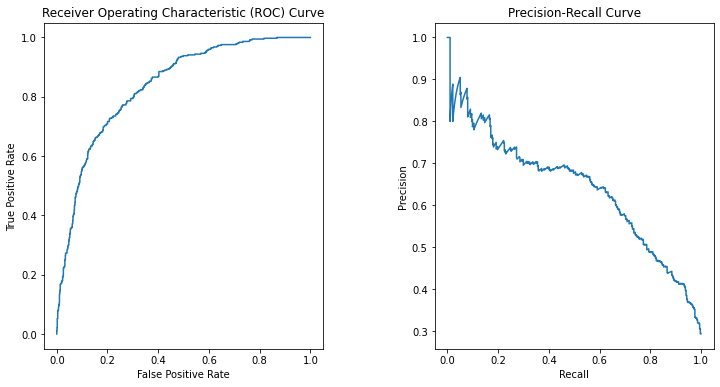

ROC AUC: 0.8368440397368134
PR: 0.6402318430771754
Accuracy: 0.7533759772565742
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [210]:
evaluate_model(xgb_model_14, X_test_select_upsampled, y_test)

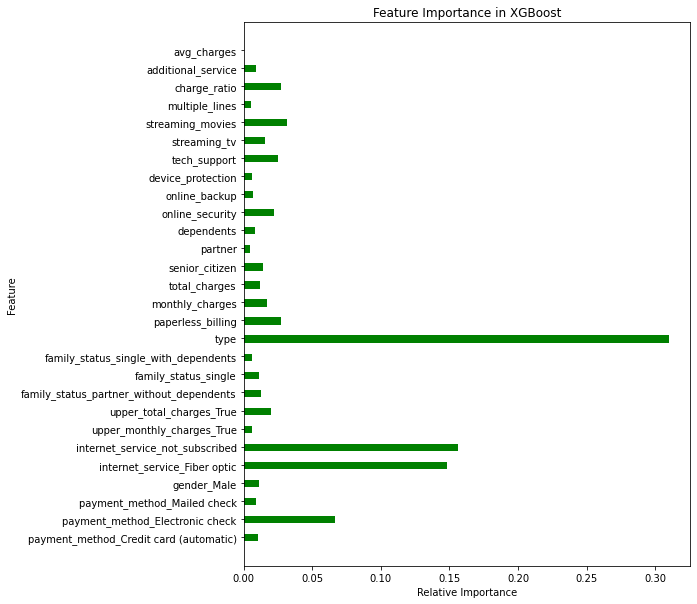

<Figure size 720x1080 with 0 Axes>

In [211]:
# check each feature's importance on xgb model
y = xgb_model_14.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select_upsampled.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(8, 10, forward=True)

### Downsampling

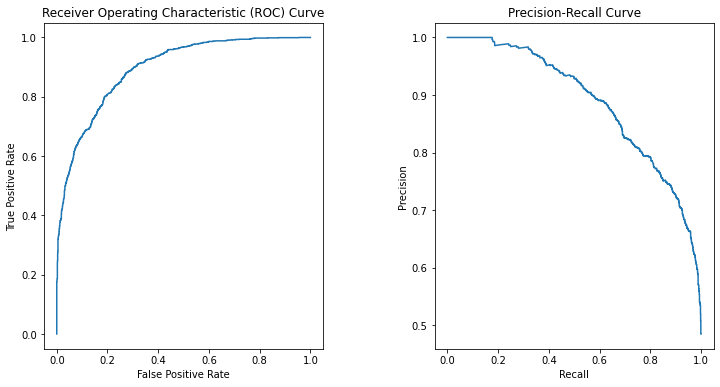

ROC AUC: 0.8946198345276952
PR: 0.8888045691950508
Accuracy: 0.8022813688212928
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1661
           1       0.78      0.81      0.80      1495

    accuracy                           0.80      3156
   macro avg       0.80      0.80      0.80      3156
weighted avg       0.80      0.80      0.80      3156



In [212]:
# Create an instance of the XGBoost classifier
xgb_model_10 = XGBClassifier(random_state=123, n_estimators=150, use_label_encoder=False,
                            learning_rate=0.05, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='exact', max_depth=3, reg_alpha = 1, reg_lambda =1
                           )

xgb_model_10.fit(X_downsampled, y_downsampled)
evaluate_model(xgb_model_10, X_downsampled, y_downsampled)

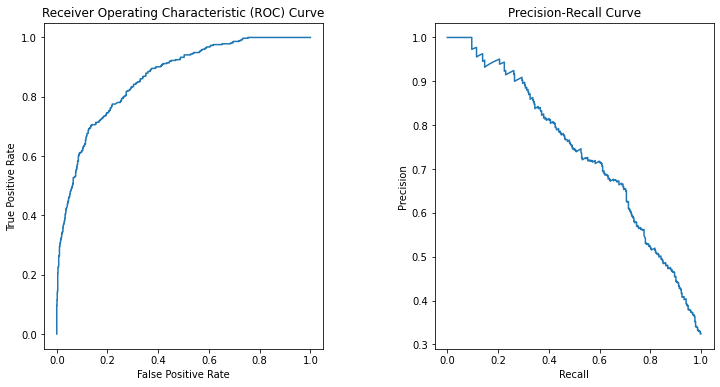

ROC AUC: 0.8650535018196313
PR: 0.7357055874985169
Accuracy: 0.7775408670931059
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1033
           1       0.56      0.78      0.65       374

    accuracy                           0.78      1407
   macro avg       0.73      0.78      0.74      1407
weighted avg       0.81      0.78      0.79      1407



In [213]:
evaluate_model(xgb_model_10, X_test_encoded, y_test)

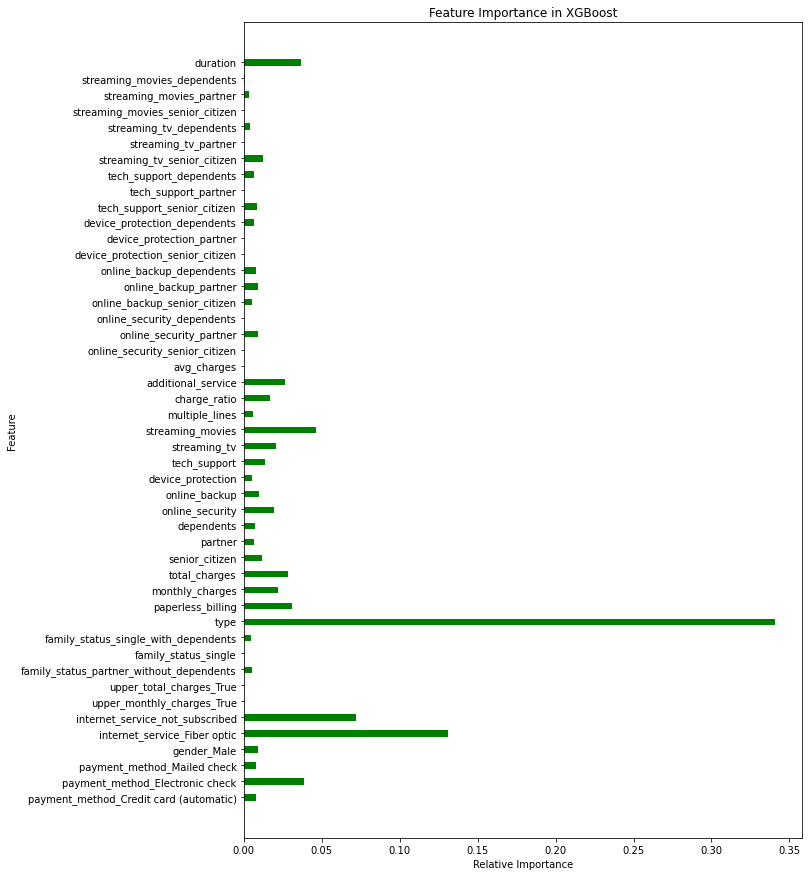

<Figure size 720x1080 with 0 Axes>

In [214]:
# check each feature's importance on xgb model
y = xgb_model_10.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_downsampled.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(10, 15, forward=True)

### Feature Select and Downsample

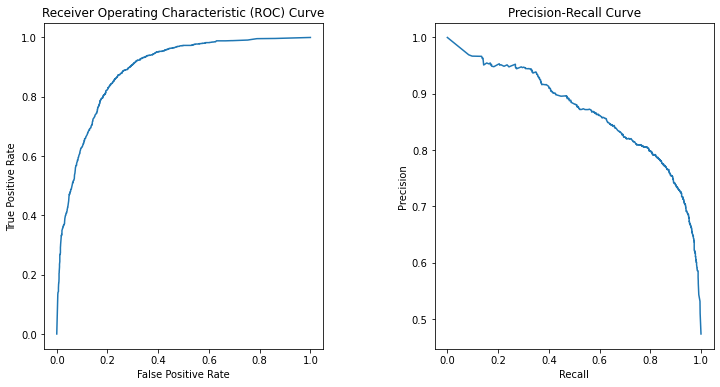

ROC AUC: 0.889516530115436
PR: 0.8681592393590912
Accuracy: 0.8108365019011406
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1661
           1       0.79      0.81      0.80      1495

    accuracy                           0.81      3156
   macro avg       0.81      0.81      0.81      3156
weighted avg       0.81      0.81      0.81      3156



In [215]:
# Create an instance of the XGBoost classifier
xgb_model_15 = XGBClassifier(random_state=12345, n_estimators=100, use_label_encoder=False,
                            learning_rate=0.01, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='hist', max_depth=6, reg_alpha = 1, reg_lambda = 1
                           )

xgb_model_15.fit(X_train_select_downsampled, y_downsampled)
evaluate_model(xgb_model_15, X_train_select_downsampled, y_downsampled)

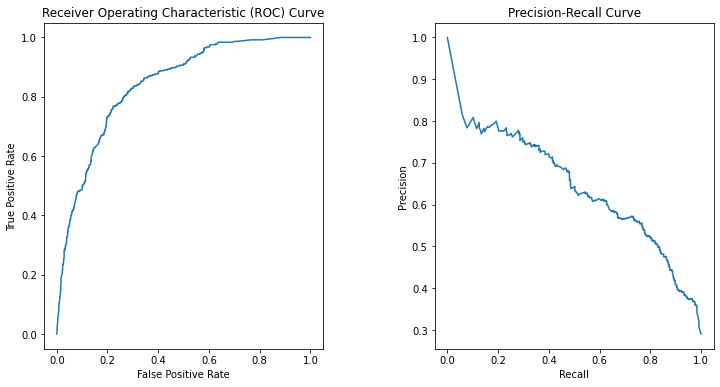

ROC AUC: 0.8392486449829426
PR: 0.6451381581656355
Accuracy: 0.7668798862828714
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.77      0.64       374

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407



In [216]:
evaluate_model(xgb_model_15, X_test_select_downsampled, y_test)

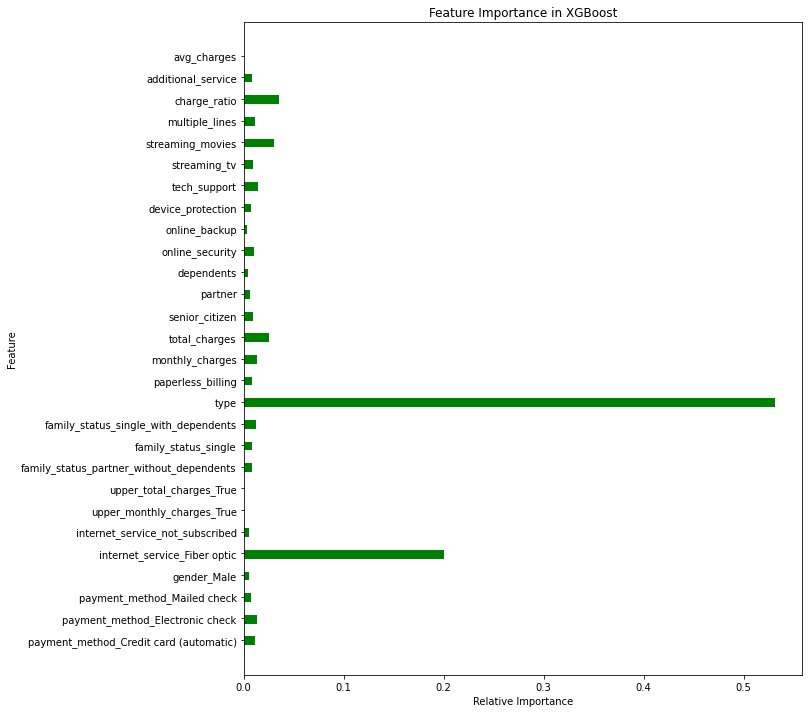

<Figure size 720x1080 with 0 Axes>

In [217]:
# check each feature's importance on xgb model
y = xgb_model_15.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select_downsampled.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(10, 12, forward=True)

### Hybrid Sampling

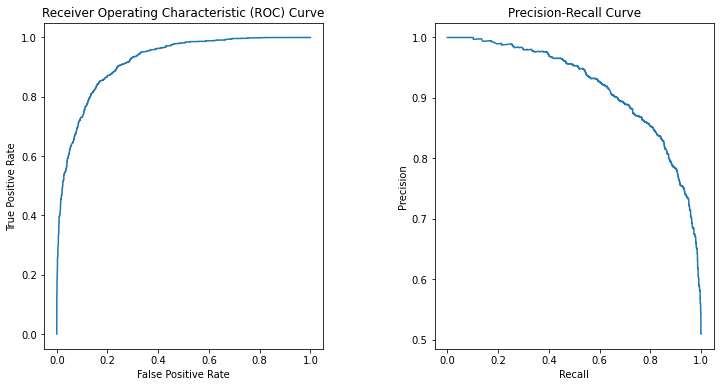

ROC AUC: 0.9196414045696368
PR: 0.9170336571166925
Accuracy: 0.8362503708098488
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3438
           1       0.82      0.86      0.84      3304

    accuracy                           0.84      6742
   macro avg       0.84      0.84      0.84      6742
weighted avg       0.84      0.84      0.84      6742



In [218]:
# Create an instance of the XGBoost classifier
xgb_model_14 = XGBClassifier(random_state=123, n_estimators=100, use_label_encoder=False,
                            learning_rate=0.5, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='exact', max_depth=5, reg_alpha = 20, reg_lambda =20
                           )

xgb_model_14.fit(X_hybrid, y_hybrid)
evaluate_model(xgb_model_14, X_hybrid, y_hybrid)

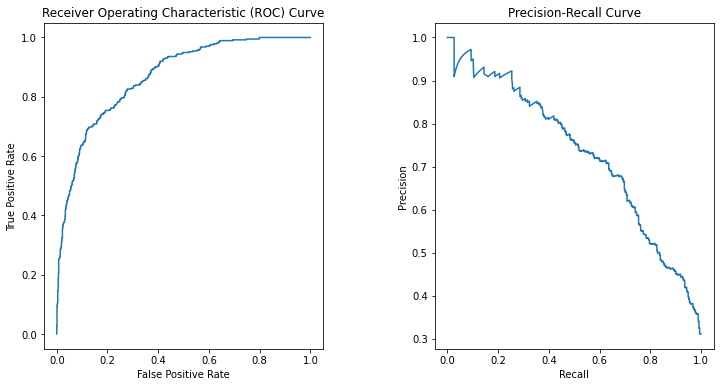

ROC AUC: 0.8679473109317651
PR: 0.7299823813690333
Accuracy: 0.7697228144989339
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.55      0.77      0.64       374

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.77      0.78      1407



In [219]:
evaluate_model(xgb_model_14, X_test_encoded, y_test)

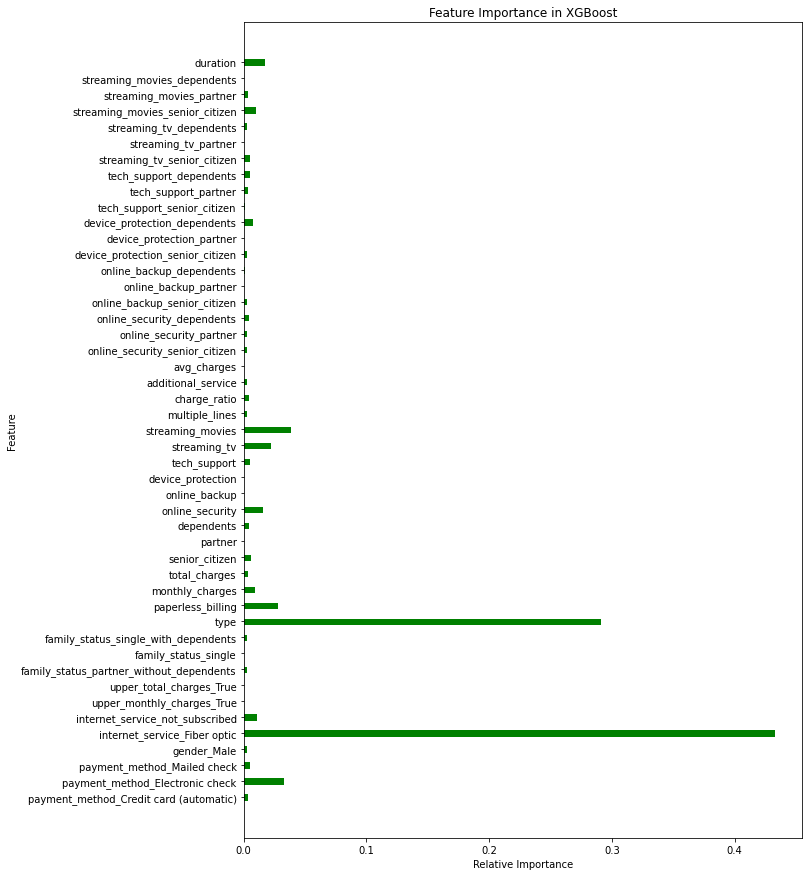

<Figure size 720x1080 with 0 Axes>

In [220]:
# check each feature's importance on xgb model
y = xgb_model_14.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_hybrid.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(10, 15, forward=True)

### Feature Select and Hybrid

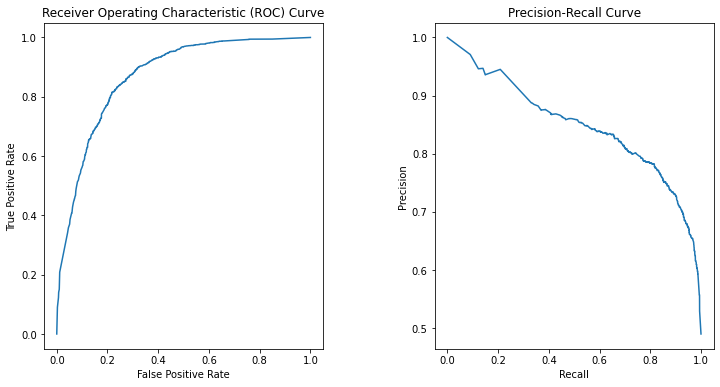

ROC AUC: 0.8693968968810348
PR: 0.8490398902757417
Accuracy: 0.7939780480569564
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      3438
           1       0.76      0.84      0.80      3304

    accuracy                           0.79      6742
   macro avg       0.80      0.79      0.79      6742
weighted avg       0.80      0.79      0.79      6742



In [221]:
# Create an instance of the XGBoost classifier
xgb_model_16 = XGBClassifier(random_state=123, n_estimators=100, use_label_encoder=False,
                            learning_rate=0.01, eval_metric='aucpr', objective='binary:logistic',
                            tree_method='exact', max_depth=5, reg_alpha = 5, reg_lambda = 5
                           )

xgb_model_16.fit(X_train_select_hybrid, y_hybrid)
evaluate_model(xgb_model_16, X_train_select_hybrid, y_hybrid)

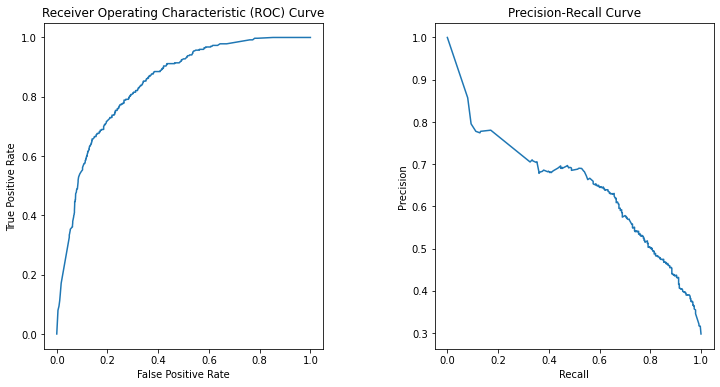

ROC AUC: 0.8423999979292958
PR: 0.6496584041337318
Accuracy: 0.7469793887704336
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [222]:
evaluate_model(xgb_model_16, X_test_select_hybrid, y_test)

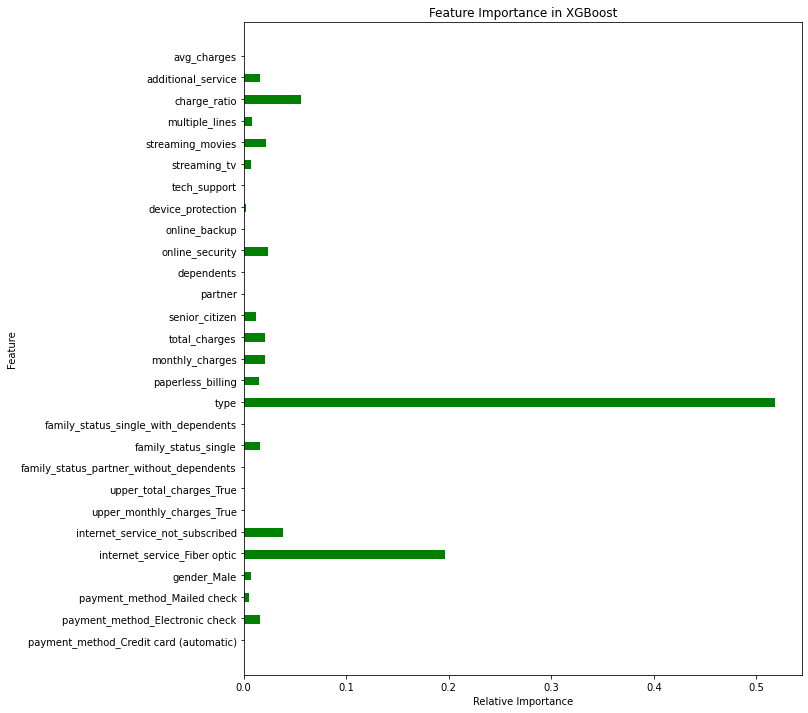

<Figure size 720x1080 with 0 Axes>

In [223]:
# check each feature's importance on xgb model
y = xgb_model_16.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(X_train_select_hybrid.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(10,15))
fig.set_size_inches(10, 12, forward=True)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Catboost

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5327 to 6160
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   type                              5625 non-null   category
 1   paperless_billing                 5625 non-null   boolean 
 2   payment_method                    5625 non-null   category
 3   monthly_charges                   5625 non-null   float64 
 4   total_charges                     5625 non-null   float64 
 5   gender                            5625 non-null   category
 6   senior_citizen                    5625 non-null   boolean 
 7   partner                           5625 non-null   boolean 
 8   dependents                        5625 non-null   boolean 
 9   internet_service                  5625 non-null   category
 10  online_security                   5625 non-null   boolean 
 11  online_backup                     5625 non-null   boo

Best Model: <catboost.core.CatBoostClassifier object at 0x7f7073e3d910>
Best Parameters: {'depth': 5, 'l2_leaf_reg': 2}


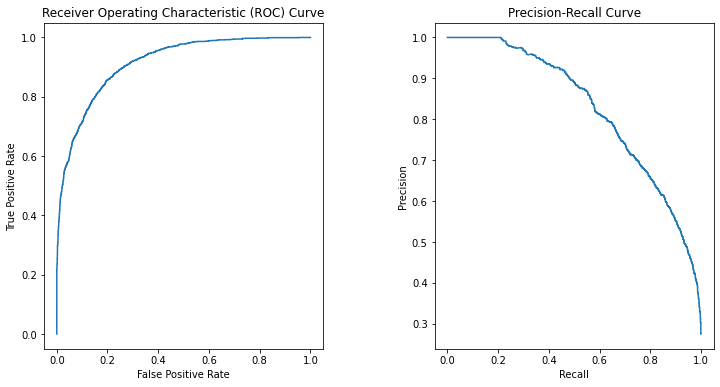

ROC AUC: 0.9139928089596476
PR: 0.8259619274547579
Accuracy: 0.8561777777777778
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4130
           1       0.81      0.59      0.69      1495

    accuracy                           0.86      5625
   macro avg       0.84      0.77      0.80      5625
weighted avg       0.85      0.86      0.85      5625



In [225]:
# Define the CatBoost classifier
catboost_model = CatBoostClassifier(random_state=12345, iterations=100,
                                       learning_rate=0.1, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {
    'depth': [2, 3, 4, 5],
    'l2_leaf_reg': [0.5, 1, 2, 3]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring=scorer)

# Fit the grid search to the data
catboost_model = clf.fit(X_train_encoded, y_train)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model, X_train_encoded, y_train)

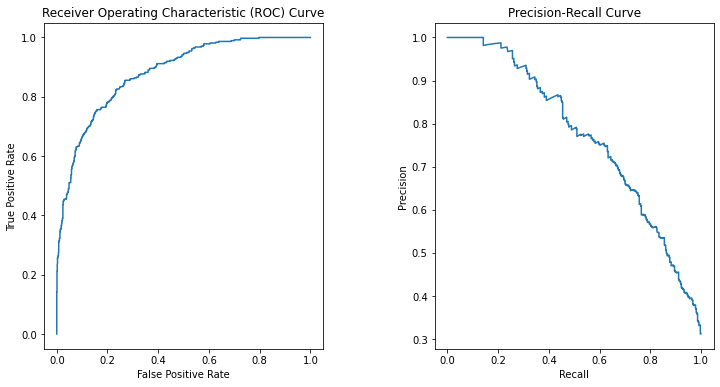

ROC AUC: 0.8806109612726548
PR: 0.7702135375132713
Accuracy: 0.8386638237384506
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1033
           1       0.77      0.57      0.65       374

    accuracy                           0.84      1407
   macro avg       0.81      0.75      0.77      1407
weighted avg       0.83      0.84      0.83      1407



In [226]:
evaluate_model(catboost_model, X_test_encoded, y_test)

In [227]:
catboost_model = CatBoostClassifier(random_state=123, iterations=100,
                                       learning_rate=0.01, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False, depth=3, l2_leaf_reg=0.5)
# Fit the CatBoost model
catboost_model.fit(X_train_encoded, y_train)

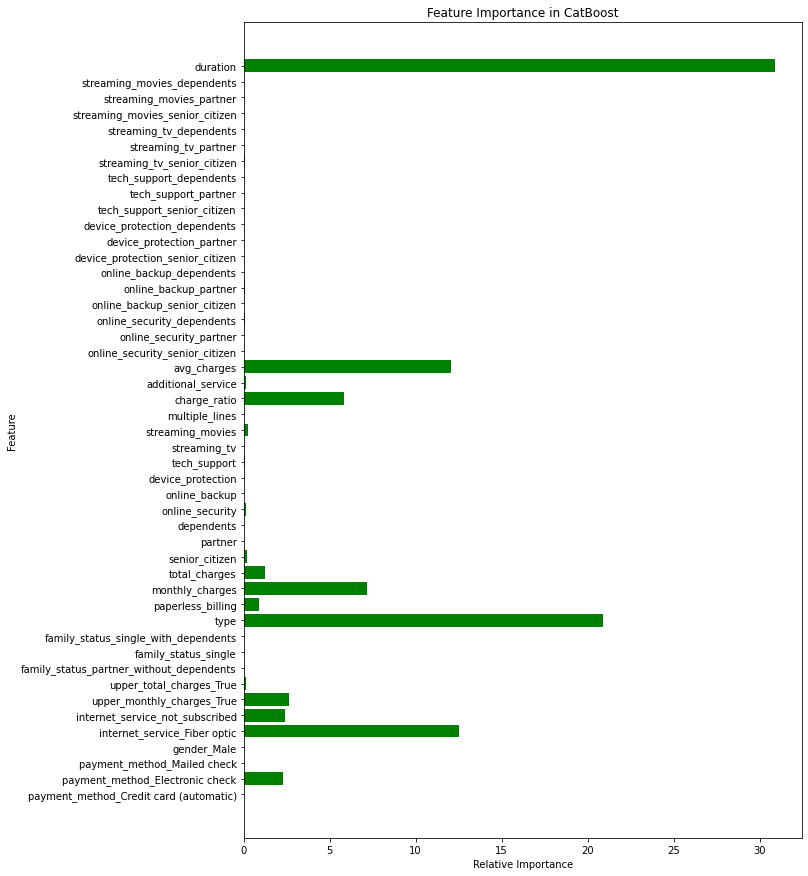

In [228]:
# Obtain the feature importance values
importance = catboost_model.get_feature_importance()

# Get the feature names
features = X_train_encoded.columns

# Create a horizontal bar plot
plt.figure(figsize=(10, 15))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

### Upsampling

Best Model: <catboost.core.CatBoostClassifier object at 0x7f707ea10070>
Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 2}


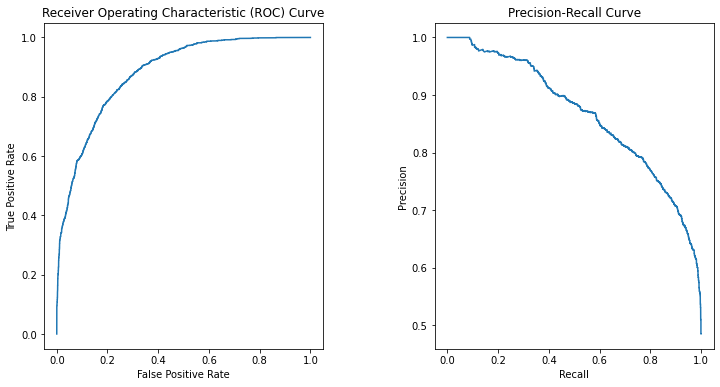

ROC AUC: 0.8805682744226676
PR: 0.8663212893830575
Accuracy: 0.7902383076334905
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4130
           1       0.76      0.82      0.79      3717

    accuracy                           0.79      7847
   macro avg       0.79      0.79      0.79      7847
weighted avg       0.79      0.79      0.79      7847



In [229]:
# Define the CatBoost classifier
catboost_model_2 = CatBoostClassifier(random_state=123,
                                       learning_rate=0.01, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {'iterations' : [100, 200],
    'depth': [3, 4, 5, 6],
    'l2_leaf_reg': [0.5, 1, 2, 3]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model_2, param_grid=param_grid, cv=5, scoring=scorer)

# Fit the grid search to the data
catboost_model_2 = clf.fit(X_upsampled, y_upsampled)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model_2, X_upsampled, y_upsampled)

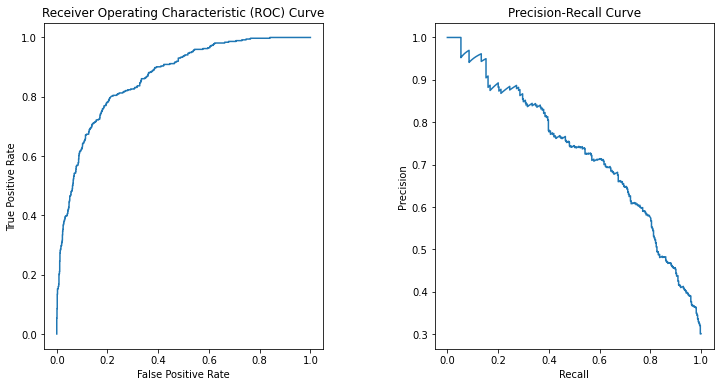

ROC AUC: 0.8662842766253733
PR: 0.7268587036829243
Accuracy: 0.7768301350390903
              precision    recall  f1-score   support

           0       0.92      0.77      0.83      1033
           1       0.56      0.80      0.66       374

    accuracy                           0.78      1407
   macro avg       0.74      0.79      0.75      1407
weighted avg       0.82      0.78      0.79      1407



In [230]:
evaluate_model(catboost_model_2, X_test_encoded, y_test)

In [231]:
catboost_model_2 = CatBoostClassifier(random_state=123, iterations=100,
                                       learning_rate=0.01, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False, depth=3, l2_leaf_reg=0.5)
# Fit the CatBoost model
catboost_model_2.fit(X_upsampled, y_upsampled)

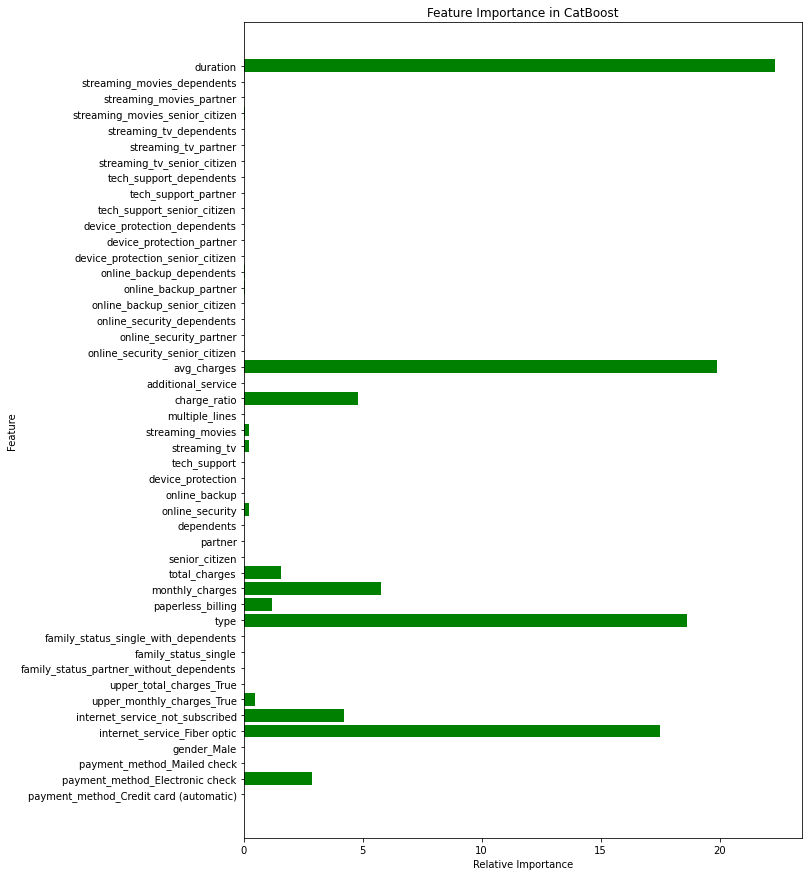

In [232]:
# Obtain the feature importance values
importance = catboost_model_2.get_feature_importance()

# Get the feature names
features = X_upsampled.columns

# Create a horizontal bar plot
plt.figure(figsize=(10, 15))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

### Feature Select and Upsampling

Best Model: <catboost.core.CatBoostClassifier object at 0x7f70740993a0>
Best Parameters: {'border_count': 32, 'depth': 5, 'iterations': 200, 'l2_leaf_reg': 0.5, 'learning_rate': 0.1, 'random_strength': 0.1}


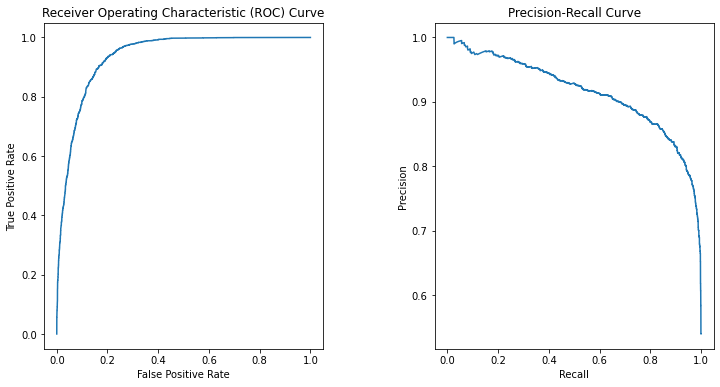

ROC AUC: 0.936224896929949
PR: 0.9155776818428298
Accuracy: 0.863514719000892
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4130
           1       0.82      0.91      0.86      3717

    accuracy                           0.86      7847
   macro avg       0.87      0.87      0.86      7847
weighted avg       0.87      0.86      0.86      7847



In [233]:
# Define the CatBoost classifier
catboost_model_3 = CatBoostClassifier(random_state=12345, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {'learning_rate': [0.01, 0.05, 0.1], 'iterations' : [100, 200],
    'depth': [3, 4, 5], 'l2_leaf_reg': [0.5, 1, 5],
              'border_count': [32, 128], 'random_strength': [0.1, 0.5, 1]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model_3, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
catboost_model_3 = clf.fit(X_train_select_upsampled, y_upsampled)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model_3, X_train_select_upsampled, y_upsampled)

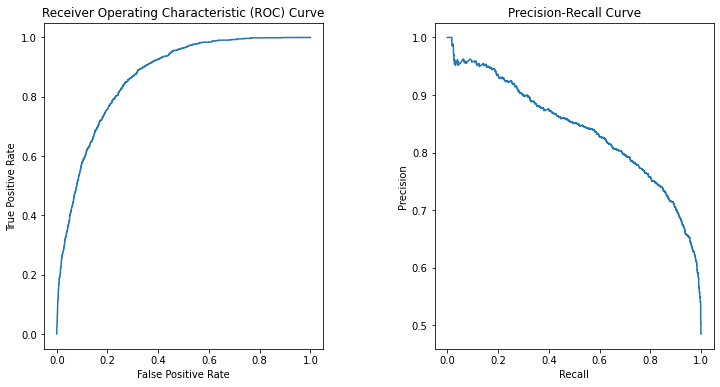

ROC AUC: 0.8680264291870151
PR: 0.8392081222786943
Accuracy: 0.7831018223524914
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      4130
           1       0.75      0.82      0.78      3717

    accuracy                           0.78      7847
   macro avg       0.78      0.79      0.78      7847
weighted avg       0.79      0.78      0.78      7847



In [235]:
catboost_model_3 = CatBoostClassifier(random_state=12345,
                                       eval_metric='AUC',
                                       loss_function='Logloss', verbose=False,
                                      border_count= 256, depth=4, iterations= 100, l2_leaf_reg=1,
                                      learning_rate= 0.06, random_strength= 1)
# Fit the CatBoost model
catboost_model_3.fit(X_train_select_upsampled, y_upsampled)
evaluate_model(catboost_model_3, X_train_select_upsampled, y_upsampled)

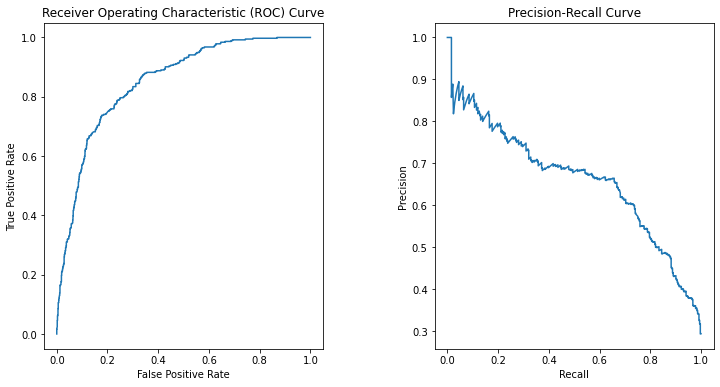

ROC AUC: 0.8502311423557367
PR: 0.6615133252749229
Accuracy: 0.7562189054726368
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.80      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [236]:
evaluate_model(catboost_model_3, X_test_select_upsampled, y_test)

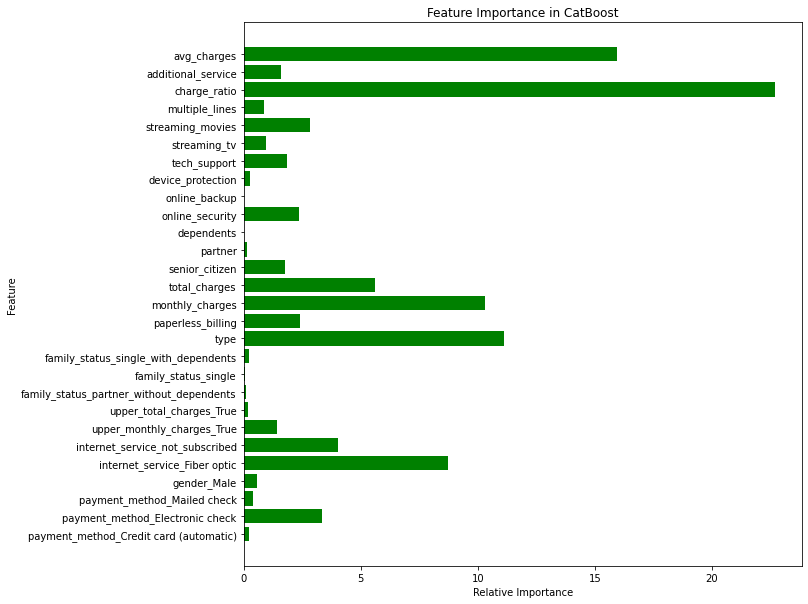

In [237]:
# Obtain the feature importance values
importance = catboost_model_3.get_feature_importance()

# Get the feature names
features = X_train_select_upsampled.columns

# Create a horizontal bar plot
plt.figure(figsize=(10, 10))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

### Downsampling

Best Model: <catboost.core.CatBoostClassifier object at 0x7f70740b0160>
Best Parameters: {'border_count': 128, 'depth': 3, 'iterations': 200, 'l2_leaf_reg': 0.5, 'learning_rate': 0.1, 'random_strength': 0.1}


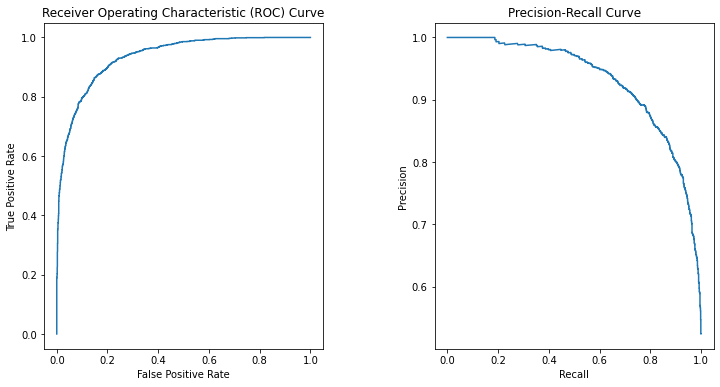

ROC AUC: 0.9348669758114043
PR: 0.930716540655833
Accuracy: 0.8570975918884665
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1661
           1       0.84      0.86      0.85      1495

    accuracy                           0.86      3156
   macro avg       0.86      0.86      0.86      3156
weighted avg       0.86      0.86      0.86      3156



In [238]:
# Define the CatBoost classifier
catboost_model_4 = CatBoostClassifier(random_state=12345, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {'learning_rate': [0.01, 0.05, 0.1], 'iterations' : [100, 200],
    'depth': [3, 4, 5], 'l2_leaf_reg': [0.5, 1, 5],
              'border_count': [32, 128], 'random_strength': [0.1, 0.5, 1]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model_4, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
catboost_model_4 = clf.fit(X_downsampled, y_downsampled)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model_4, X_downsampled, y_downsampled)

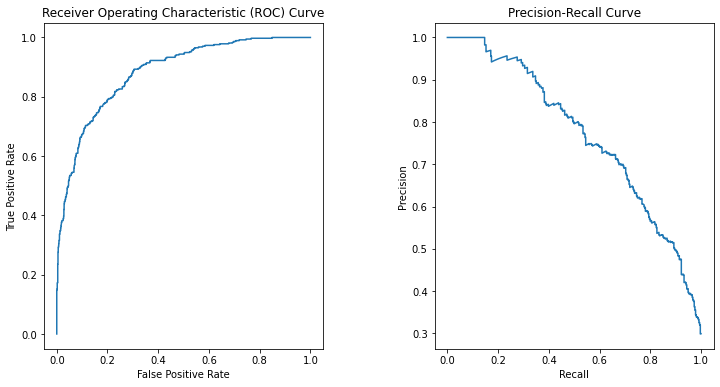

ROC AUC: 0.8829702698645242
PR: 0.769696147719166
Accuracy: 0.7938877043354655
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1033
           1       0.58      0.79      0.67       374

    accuracy                           0.79      1407
   macro avg       0.75      0.79      0.76      1407
weighted avg       0.83      0.79      0.80      1407



In [239]:
evaluate_model(catboost_model_4, X_test_encoded, y_test)

In [240]:
catboost_model_4 = CatBoostClassifier(random_state=12345,
                                       eval_metric='AUC',
                                       loss_function='Logloss', verbose=False,
                                      border_count= 128, depth= 4, iterations= 500, l2_leaf_reg= 0.5,
                                      learning_rate= 0.1, random_strength= 0.1)
# Fit the CatBoost model
catboost_model_4.fit(X_downsampled, y_downsampled)

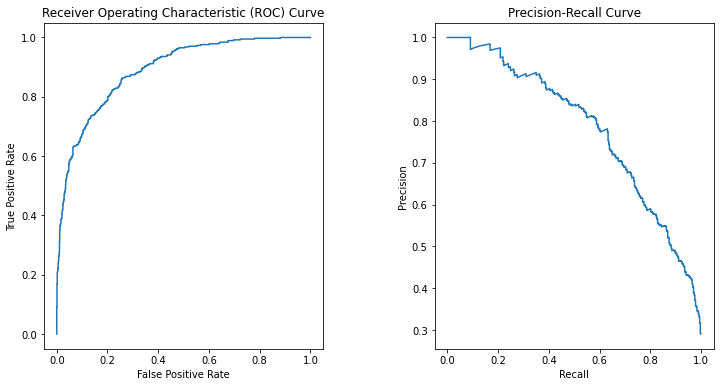

ROC AUC: 0.8901336121881649
PR: 0.7811330733157008
Accuracy: 0.8073916133617626
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1033
           1       0.61      0.77      0.68       374

    accuracy                           0.81      1407
   macro avg       0.76      0.80      0.77      1407
weighted avg       0.83      0.81      0.81      1407



In [241]:
evaluate_model(catboost_model_4, X_test_encoded, y_test)

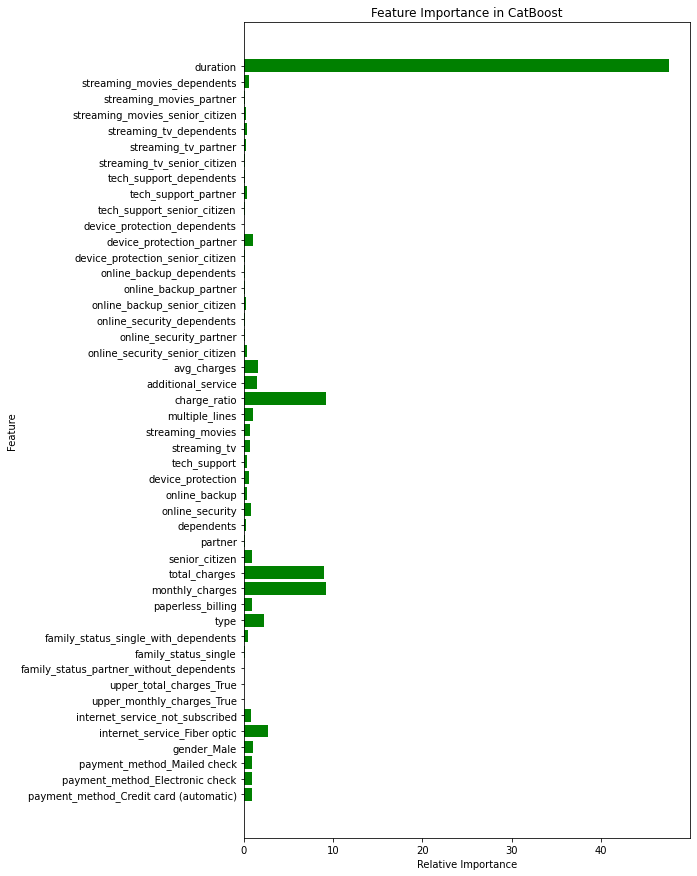

In [242]:
#Obtain the feature importance values
importance = catboost_model_4.get_feature_importance()

# Get the feature names
features = X_downsampled.columns

# Create a horizontal bar plot
plt.figure(figsize=(8, 15))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

### Feature Select and Downsampling

Best Model: <catboost.core.CatBoostClassifier object at 0x7f707419e7c0>
Best Parameters: {'border_count': 128, 'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05, 'random_strength': 1}


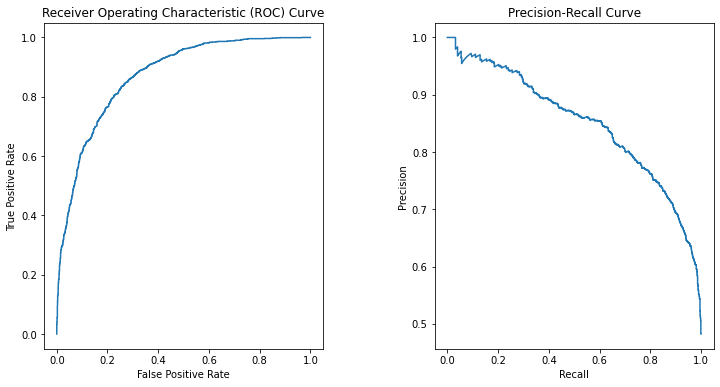

ROC AUC: 0.8711263110629651
PR: 0.8501652133537042
Accuracy: 0.7867553865652726
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1661
           1       0.76      0.81      0.78      1495

    accuracy                           0.79      3156
   macro avg       0.79      0.79      0.79      3156
weighted avg       0.79      0.79      0.79      3156



In [243]:
# Define the CatBoost classifier
catboost_model_5 = CatBoostClassifier(random_state=12345, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {'learning_rate': [0.01, 0.05, 0.1], 'iterations' : [100, 200],
    'depth': [3, 4, 5], 'l2_leaf_reg': [0.5, 1, 5],
              'border_count': [32, 128], 'random_strength': [0.1, 0.5, 1]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model_5, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
catboost_model_5 = clf.fit(X_train_select_downsampled, y_downsampled)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model_5, X_train_select_downsampled, y_downsampled)

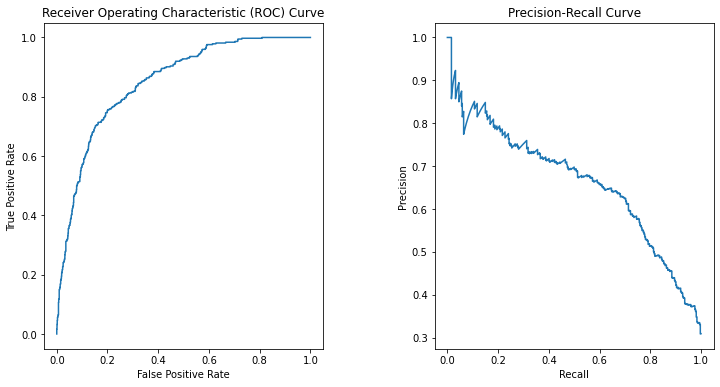

ROC AUC: 0.8491453168436256
PR: 0.6628431339021598
Accuracy: 0.7562189054726368
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.78      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



In [244]:
evaluate_model(catboost_model_5, X_test_select_downsampled, y_test)

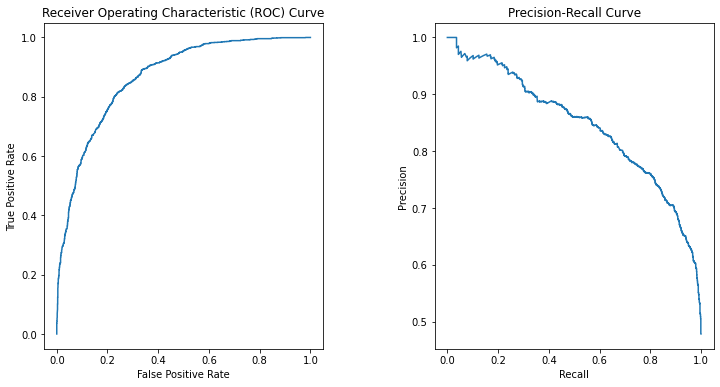

ROC AUC: 0.8661742231278655
PR: 0.8457340535563908
Accuracy: 0.7848542458808618
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1661
           1       0.76      0.81      0.78      1495

    accuracy                           0.78      3156
   macro avg       0.79      0.79      0.78      3156
weighted avg       0.79      0.78      0.78      3156



In [245]:
catboost_model_5 = CatBoostClassifier(random_state=12345,
                                       eval_metric='AUC',
                                       loss_function='Logloss', verbose=False,
                                      border_count= 128, depth=3, iterations= 100, l2_leaf_reg=1,
                                      learning_rate= 0.05, random_strength= 0.1)
# Fit the CatBoost model
catboost_model_5.fit(X_train_select_downsampled, y_downsampled)
evaluate_model(catboost_model_5, X_train_select_downsampled, y_downsampled)

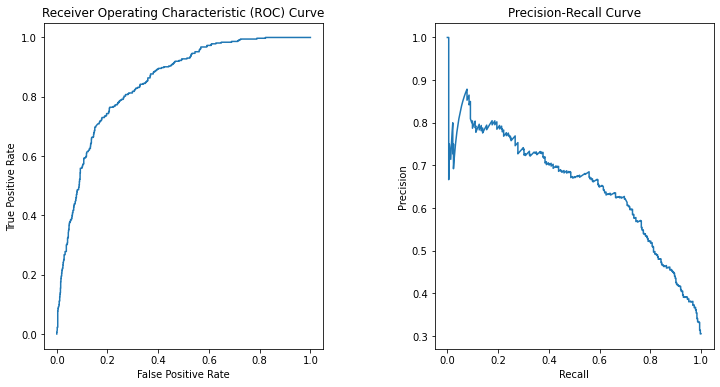

ROC AUC: 0.8482083231955108
PR: 0.6514456707315066
Accuracy: 0.759772565742715
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [246]:
evaluate_model(catboost_model_5, X_test_select_downsampled, y_test)

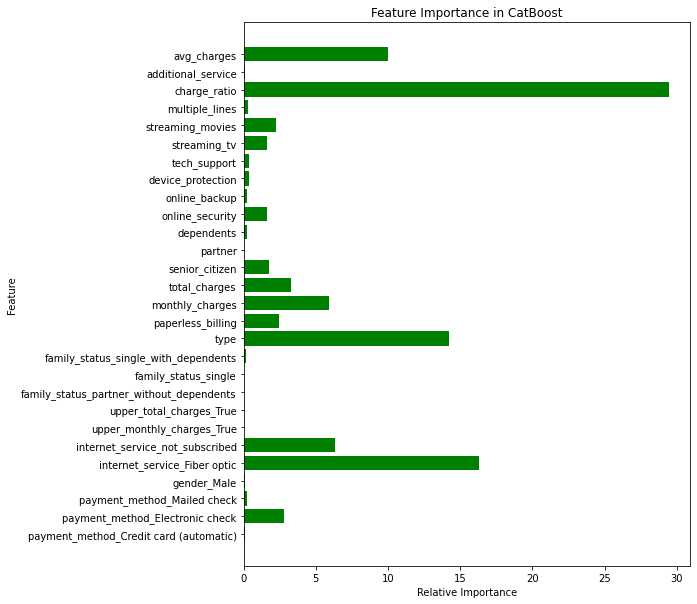

In [247]:
# Obtain the feature importance values
importance = catboost_model_5.get_feature_importance()

# Get the feature names
features = X_train_select_downsampled.columns

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

### Hybrid

Best Model: <catboost.core.CatBoostClassifier object at 0x7f707358d310>
Best Parameters: {'border_count': 128, 'depth': 5, 'iterations': 200, 'l2_leaf_reg': 0.5, 'learning_rate': 0.1, 'random_strength': 0.1}


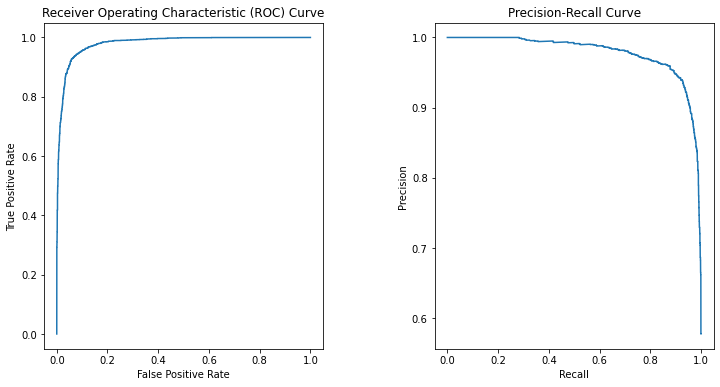

ROC AUC: 0.9800877741577891
PR: 0.978454925045109
Accuracy: 0.9307327202610501
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3438
           1       0.92      0.95      0.93      3304

    accuracy                           0.93      6742
   macro avg       0.93      0.93      0.93      6742
weighted avg       0.93      0.93      0.93      6742



In [248]:
# Define the CatBoost classifier
catboost_model_6 = CatBoostClassifier(random_state=12345, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {'learning_rate': [0.01, 0.05, 0.1], 'iterations' : [100, 200],
    'depth': [3, 4, 5], 'l2_leaf_reg': [0.5, 1, 5],
              'border_count': [32, 128], 'random_strength': [0.1, 0.5, 1]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model_6, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
catboost_model_6 = clf.fit(X_hybrid, y_hybrid)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model_6, X_hybrid, y_hybrid)

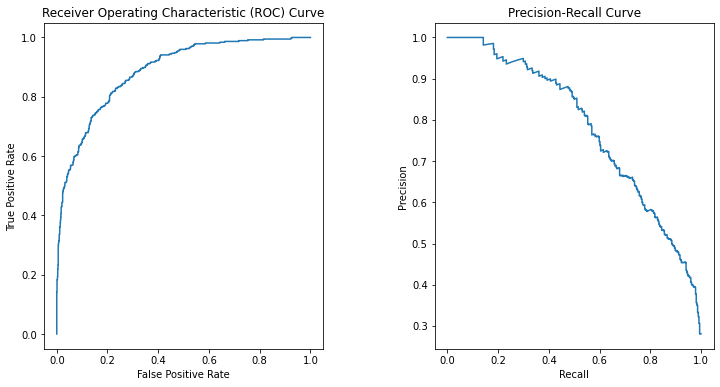

ROC AUC: 0.8866923606545495
PR: 0.7804754023413452
Accuracy: 0.8102345415778252
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1033
           1       0.62      0.76      0.68       374

    accuracy                           0.81      1407
   macro avg       0.76      0.79      0.77      1407
weighted avg       0.83      0.81      0.82      1407



In [251]:
evaluate_model(catboost_model_6, X_test_encoded, y_test)

In [252]:
catboost_model_6 = CatBoostClassifier(random_state=12345,
                                       eval_metric='AUC',
                                       loss_function='Logloss', verbose=False,
                                      border_count= 128, depth= 5, iterations= 500, l2_leaf_reg= 0.5,
                                      learning_rate= 0.01, random_strength= 1)
# Fit the CatBoost model
catboost_model_6.fit(X_hybrid, y_hybrid)

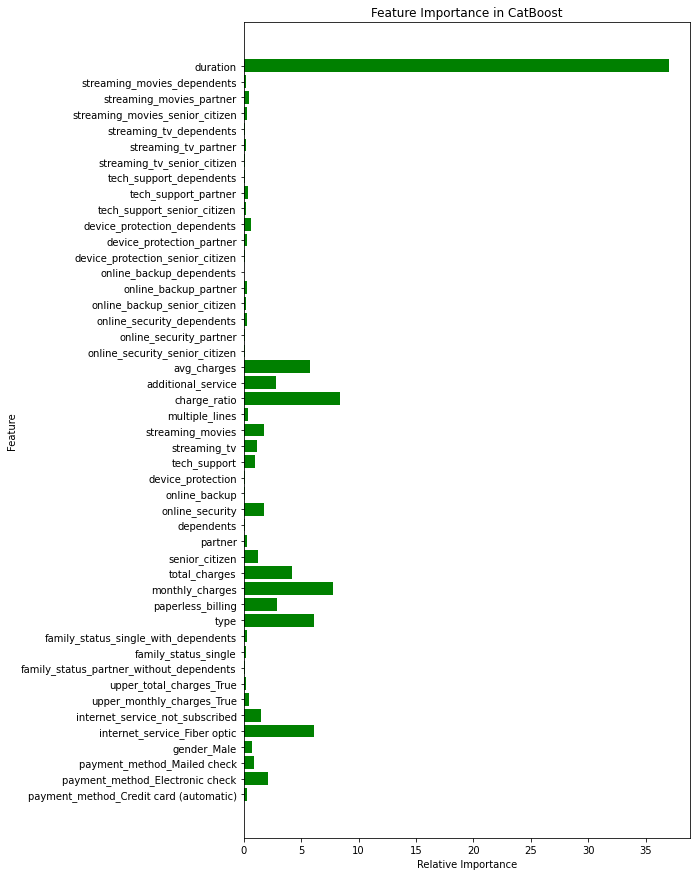

In [253]:
# Obtain the feature importance values
importance = catboost_model_6.get_feature_importance()

# Get the feature names
features = X_hybrid.columns

# Create a horizontal bar plot
plt.figure(figsize=(8, 15))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

### Feature Select and Hybrid - BEST

In [ ]:
# Define the CatBoost classifier
catboost_model_7 = CatBoostClassifier(random_state=12345, eval_metric='AUC',
                                       loss_function='Logloss', verbose=False)

# Define the parameter grid for grid search
param_grid = {'learning_rate': [0.01, 0.05, 0.1], 'iterations' : [100, 200],
    'depth': [3, 4, 5], 'l2_leaf_reg': [0.5, 1, 5],
              'border_count': [32, 128], 'random_strength': [0.1, 0.5, 1]
}

# Define the custom scoring function based on precision-recall trade-off
def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Create the scorer using the custom scoring function
scorer = make_scorer(precision_recall_auc, greater_is_better=True)

# Perform grid search with precision-recall trade-off evaluation
clf = GridSearchCV(estimator=catboost_model_7, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
catboost_model_7 = clf.fit(X_train_select_hybrid, y_hybrid)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

print('Best Model:', best_model)
print('Best Parameters:', best_params)
evaluate_model(catboost_model_7, X_train_select_hybrid, y_hybrid)

In [ ]:
evaluate_model(catboost_model_7, X_test_select_hybrid, y_test)

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- error kenapa ya ini ?
    

</div>

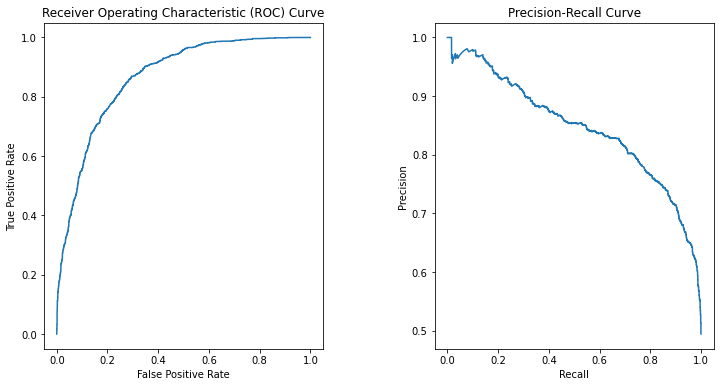

ROC AUC: 0.8647855051151705
PR: 0.8463445230142072
Accuracy: 0.7822604568377336
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      3438
           1       0.76      0.82      0.79      3304

    accuracy                           0.78      6742
   macro avg       0.78      0.78      0.78      6742
weighted avg       0.78      0.78      0.78      6742



In [254]:
catboost_model_7 = CatBoostClassifier(random_state=12345,
                                       eval_metric='AUC',
                                       loss_function='Logloss', verbose=False,
                                      border_count= 128, depth=3, iterations= 100, l2_leaf_reg=1,
                                      learning_rate= 0.06, random_strength= 1)
# Fit the CatBoost model
catboost_model_7.fit(X_train_select_hybrid, y_hybrid)
evaluate_model(catboost_model_7, X_train_select_hybrid, y_hybrid)

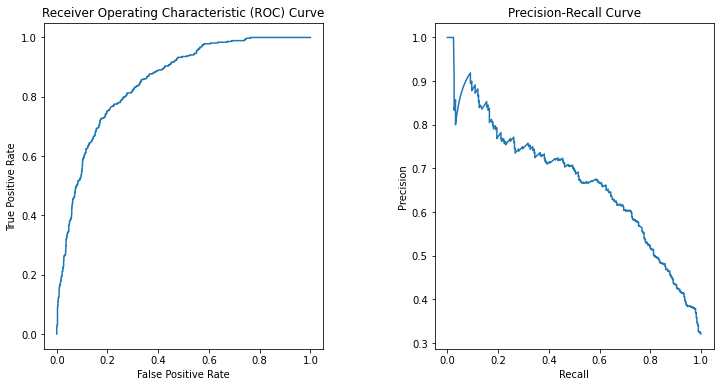

ROC AUC: 0.8518579393387206
PR: 0.6698327075714311
Accuracy: 0.7533759772565742
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407



In [255]:
evaluate_model(catboost_model_7, X_test_select_hybrid, y_test)

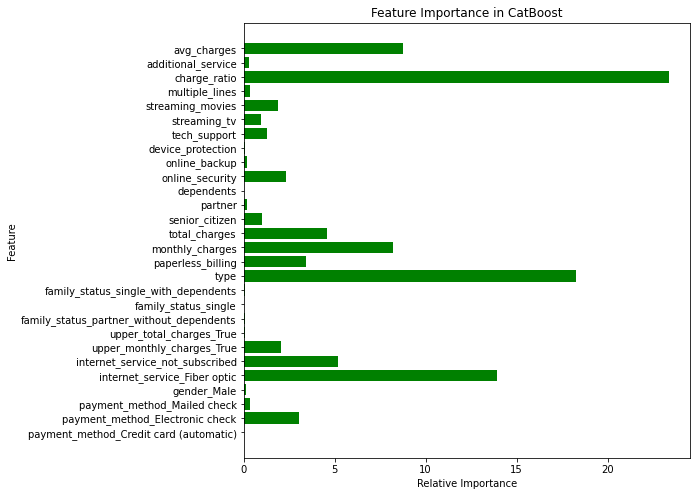

In [256]:
# Obtain the feature importance values
importance = catboost_model_7.get_feature_importance()

# Get the feature names
features = X_train_select_hybrid.columns

# Create a horizontal bar plot
plt.figure(figsize=(8, 8))
plt.barh(features, importance, color='green')
plt.title('Feature Importance in CatBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- belum ada kesimpulan terkait project 2 modeling ya

</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Model Interpretation

The best model built in this project is one that uses Catboost Classifier. Hybrid sampling method was important to handle the imbalanced data where class 1 (Churn) was the minority.

The ROC-AUC score is 85.18, PR-AUC score is 66.98, and accuracy score is 75.33.

Recall of class 1 (Churn) is 80, and precision is 52.

The exploratory data analysis (EDA) and statistical analysis helped in finding the most relevant variables to churn, that is: **type of contract**, **internet service pacakge subscribed**, and **monthly charges**. It also led to decision on what additional features needed to be engineered. That in turn helped to add relevant variables even more, that is ratio of total charges to monthly charges, and average of monthly charges per type of subscription. 

Non-existing data of customers in internet dataset and phone service dataset were very significant. When they first were treated as random missing values, no models could perform well enough. But when they were seen as customers not subscribing to particular services, models improved significantly.

Many additional, enginereed features were built, but some were dropped eventually. A variable 'duration' that is the period length of customer churn was built and it did make the model prediction 99% correct. But it caused a data leakage, hence was  dropped from final model.

Catboost Classifier has proved to be resilient to the existence of irrelevant features. But removing them did improve performance of the model.

In conclusion, the model chosen is enough to predict churned customers of Interconnect where the recall rate enables the company to anticipate, and the precision is good enough to prevent from wasting too much valuable resources.

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Dwi! Sebagian besar kamu telah menyelesaikan project ini dengan baik namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah. Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!.
    
Keep going Dwi, you are doing very well!
    

</div>

<div class="alert alert-block alert-success">

# General comments #2
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Dwi! Revisi sudah sesuai ya!
    

</div>

<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Dwi !

Perkenalkan saya Code Reviewers, disini saya akan mereview tugas Dwi ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Dwi dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Project Report

The project was started by defining work plans. In conclusion to this project, I will line up findings and recommendations based on analysis to the data and the model itself.

The work plan was:

1. Project Overview

2. Data Understanding and Data Preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature Engineering

5. Model Selection

6. Model Training

7. Model Evaluation

8. Model Interpretation

All the plans are executed as planned.


The dataset comprised profile of cutomers, internet data and phone services they subscribe too.

Several interesting findings came out as a result of the exploratory data analysis and model analysis done, i.e. people with partners and dependents are less likely to churn.

Missing data analysis must be given special attention. Understanding them wrong led to handling them wrong. That in turns obstructing with model's performance.

Encoding the categorical data also must be done with prudence. Some categorical data are just nominal data, but some are actually ordinal. When I encode them correctly based on their nature, it helps with machine learning.

That said, good domain knowledge is the most pertaining factors to the thought process of filling in missing data, encoding categorical data, and othe feature engineering like engineering new, additional features.

The best model built in this project is one that uses Catboost Classifier. Hybrid sampling method was important to handle the imbalanced data where class 1 (Churn) was the minority.

The ROC-AUC score is 85.18, PR-AUC score is 66.98, and accuracy score is 75.33.

Recall of class 1 (Churn) is 80, and precision is 52.

Overall, the model chosen is enough to predict churned customers of Interconnect where the recall rate enables the company to anticipate, and the precision is good enough to prevent from wasting too much valuable resources.

I have found that the three most determining factors of churn are:

1. Type of contract: as customers are locked with contract that is longer term than 1 month term, the likelihood of churn decreases.
2. Internet service pacakge subscribed: as customers subscribe to internet service, the likelihood of churn decreases. And those who choose DSL over Fiber optic are more likely to continue their subscription.
3. Monthly charges: as customers pay more on monthly basis, their likelihood to to churn incresease.
4. Young people with no partners and dependents are more likely to churn.
5. Although more churns happened after first month of service instead of within it, the likelihood of churns is higher in the early months rather than later. The longer they have stayed (total cumulative charge to monthly charge), the most likely they will keep being customers.


Based on those findings, my recommendations to Interconnect in anticipating churn would be:

1. Offer contract-based package in more interesting monthly cost for those who subscribe to monthly package.

2. Offer package with internet services, even the data volume is low for also lower price. Having the internet service readily available for daily needs is more enticing to customers.

3. More focus of retention is to be given to young people with no partners and dependents. This might be achieved through marketing tools or creating pacakage that specifically appealing to those young people.

4. Also create packages that focus on retaining customers in the early phase of their subscription.

5. At the end of the day a service that is reliable and a brand that cutomers are proud to be associated with are the ultimate factor that defining their loyalty.

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Dwi!
    

</div>